In [ ]:
import pandas as pd

df = pd.read_csv("campaign_responses.csv")

print(df.info())

print(df.describe())

# Check for missing values
print(df.isnull().sum())

# print(df.select_dtypes)

# Explore unique values in categorical columns
for column in df.select_dtypes(include=['object']).columns:
  print(f"Unique values in {column} : {df[column].unique()}")

# Select only numerical columns before calculating correlations
numerical_df = df.select_dtypes(include=['number'])
print(numerical_df.corr())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     56 non-null     int64 
 1   age             56 non-null     int64 
 2   gender          56 non-null     object
 3   annual_income   56 non-null     int64 
 4   credit_score    56 non-null     int64 
 5   employed        56 non-null     object
 6   marital_status  56 non-null     object
 7   no_of_children  56 non-null     int64 
 8   responded       56 non-null     object
dtypes: int64(5), object(4)
memory usage: 4.1+ KB
None
       customer_id        age  annual_income  credit_score  no_of_children
count    56.000000  56.000000      56.000000     56.000000       56.000000
mean     28.500000  36.214286   69017.857143    719.107143        1.285714
std      16.309506   7.088311   22784.756524     60.340753        1.186504
min       1.000000  25.000000   35000.000000    600.000000 

In [ ]:
import pandas as pd
import numpy as np


def detect_outliers_iqr(data):
  """Detects outliers using the Interquartile Range (IQR) method."""
  Q1 = np.percentile(data, 25)
  Q3 = np.percentile(data, 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = [x for x in data if x < lower_bound or x > upper_bound]
  return outliers


# Select only numerical columns for outlier detection
numerical_df = df.select_dtypes(include=['number'])

# Iterate through each numerical column and detect outliers
for column in numerical_df.columns:
  outliers = detect_outliers_iqr(numerical_df[column])
  if outliers:
    print(f"Outliers detected in {column}: {outliers}")


# Why we're doing this:
# 1. Understanding Data Quality: Missing data can indicate problems with data collection, errors in recording, or simply the absence of information.
# 2. Handling Missing Data:  Before performing analysis or building models, missing values must be addressed.
#    We can choose to remove rows or columns with missing data, impute (fill in) missing values, or use models that can handle missing data.
# 3. Impact on Analysis: Missing data can introduce bias in statistical analyses if not handled properly.
#    For example, if certain demographics are more likely to have missing data, it can skew insights about those demographics.

# Example of handling missing values (you might want to choose a different approach depending on your dataset and goals):
# Fill missing values with the mean of the column
# df.fillna(df.mean(), inplace=True)

# Or fill with a specific value
# df.fillna(0, inplace=True)





In [ ]:
# Identify missing data
missing_data = df.isnull().sum()

# Print the number of missing values for each column
print("Missing data:\n", missing_data)



Missing data:
 customer_id       0
age               0
gender            0
annual_income     0
credit_score      0
employed          0
marital_status    0
no_of_children    0
responded         0
dtype: int64


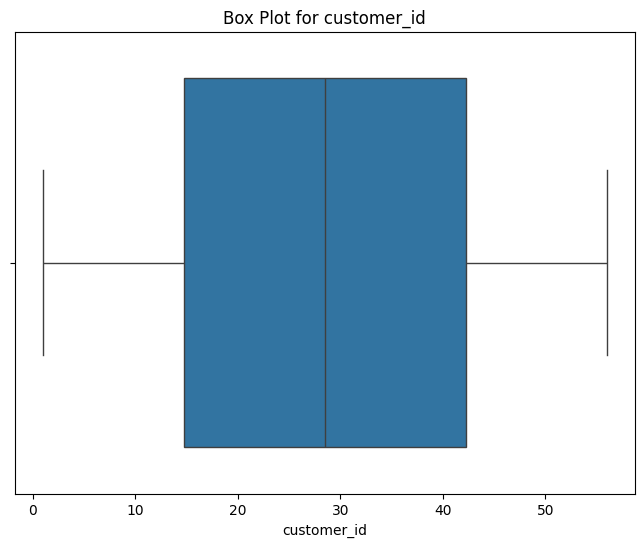

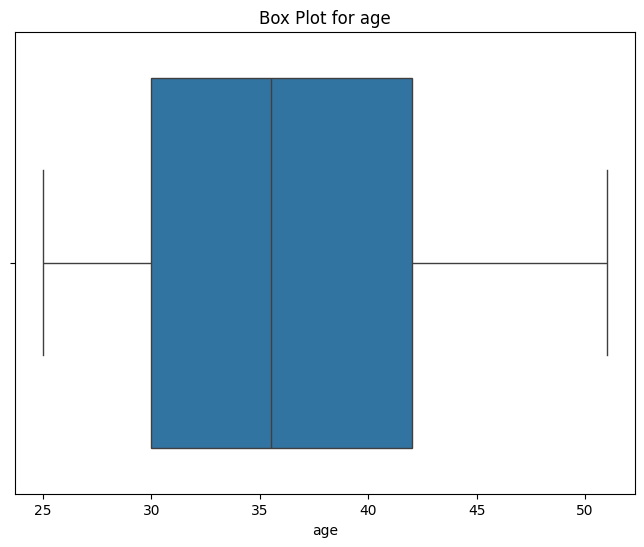

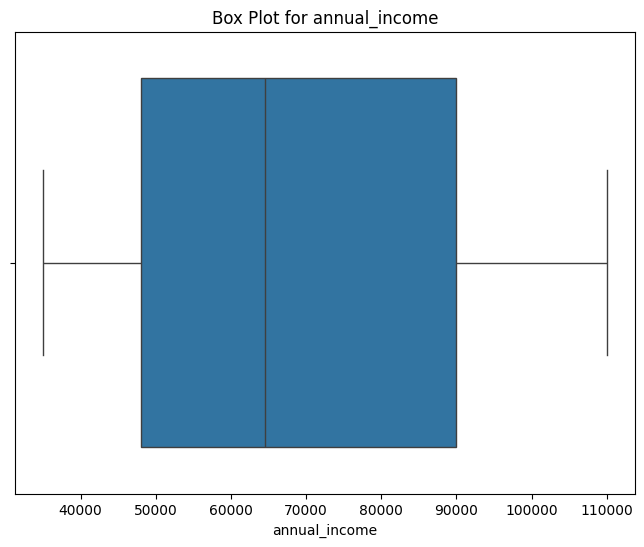

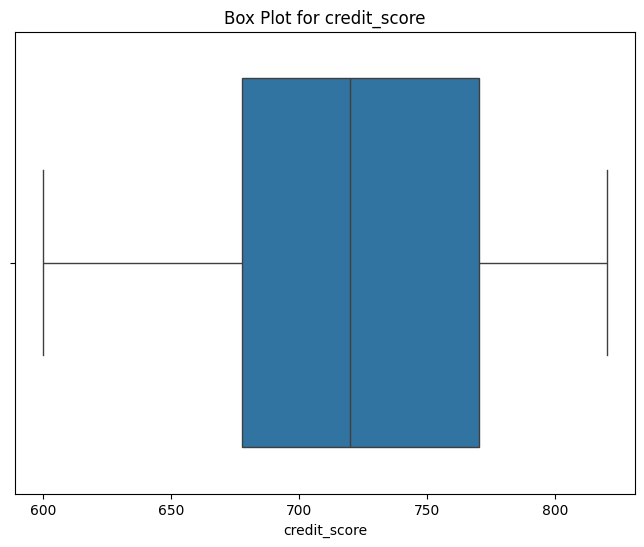

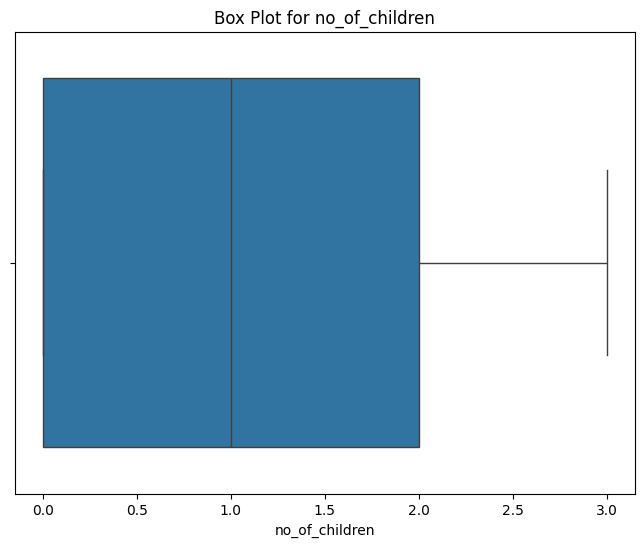

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for box plot visualization
numerical_df = df.select_dtypes(include=['number'])

# Create box plots for each numerical column
for column in numerical_df.columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=numerical_df[column])
  plt.title(f"Box Plot for {column}")
  plt.show()

Univariate analysis focuses on analyzing one variable (feature) at a time
# Understanding Data Distribution:
Univariate analysis helps visualize the distribution of numerical features through histograms and descriptive statistics (mean, median, standard deviation, etc.). This understanding helps identify potential outliers, skewness, and the overall range of values.


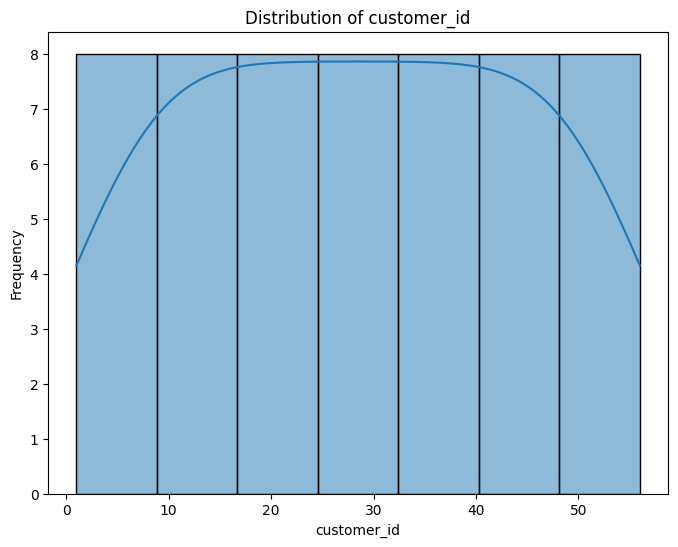

Descriptive statistics for customer_id:
count    56.000000
mean     28.500000
std      16.309506
min       1.000000
25%      14.750000
50%      28.500000
75%      42.250000
max      56.000000
Name: customer_id, dtype: float64



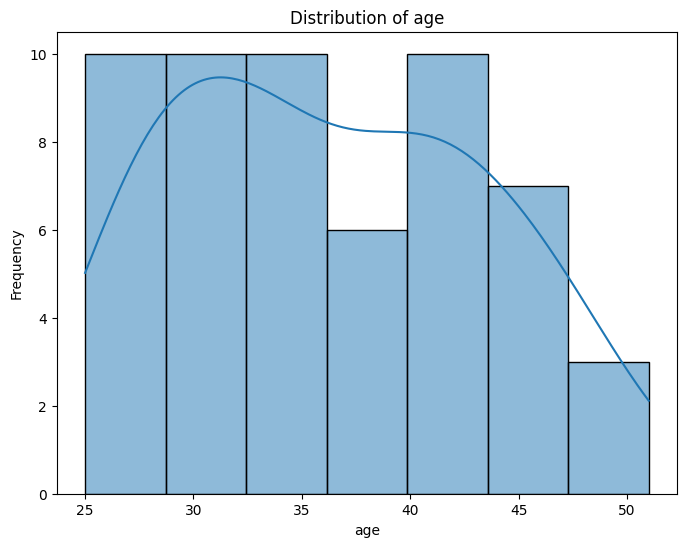

Descriptive statistics for age:
count    56.000000
mean     36.214286
std       7.088311
min      25.000000
25%      30.000000
50%      35.500000
75%      42.000000
max      51.000000
Name: age, dtype: float64



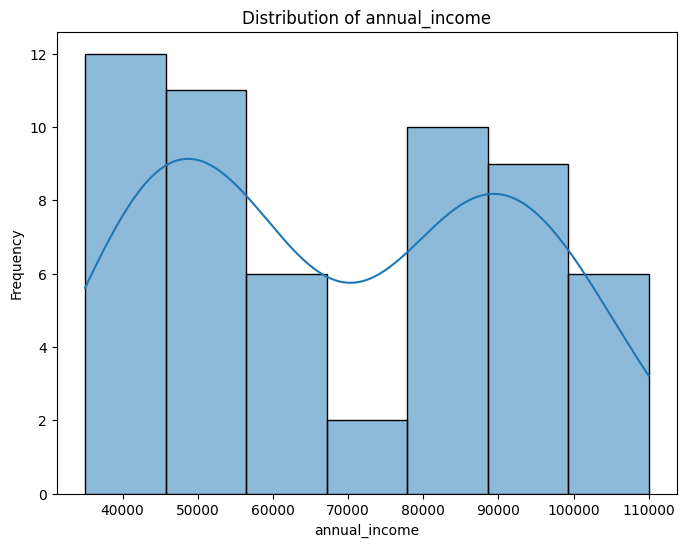

Descriptive statistics for annual_income:
count        56.000000
mean      69017.857143
std       22784.756524
min       35000.000000
25%       48000.000000
50%       64500.000000
75%       90000.000000
max      110000.000000
Name: annual_income, dtype: float64



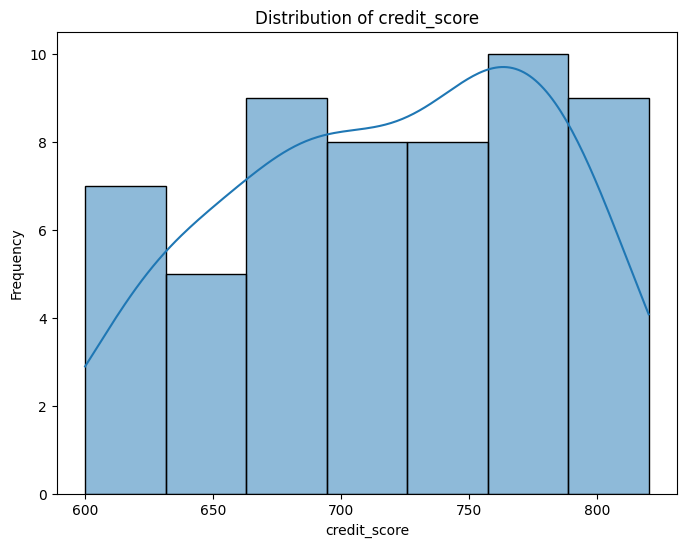

Descriptive statistics for credit_score:
count     56.000000
mean     719.107143
std       60.340753
min      600.000000
25%      677.500000
50%      720.000000
75%      770.000000
max      820.000000
Name: credit_score, dtype: float64



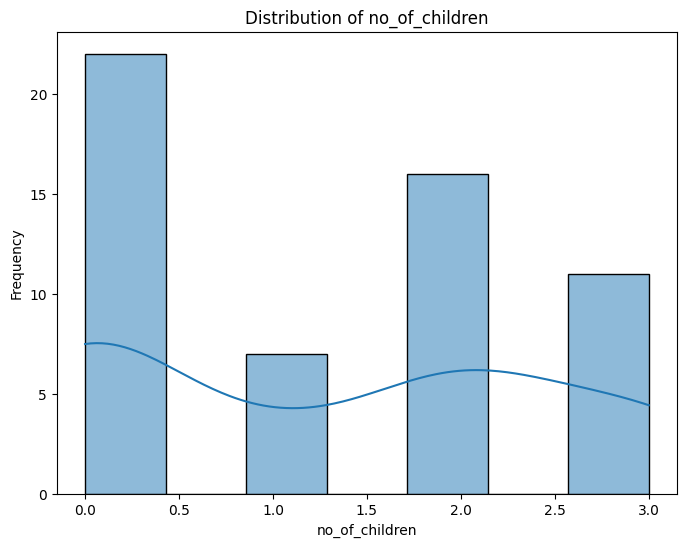

Descriptive statistics for no_of_children:
count    56.000000
mean      1.285714
std       1.186504
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: no_of_children, dtype: float64



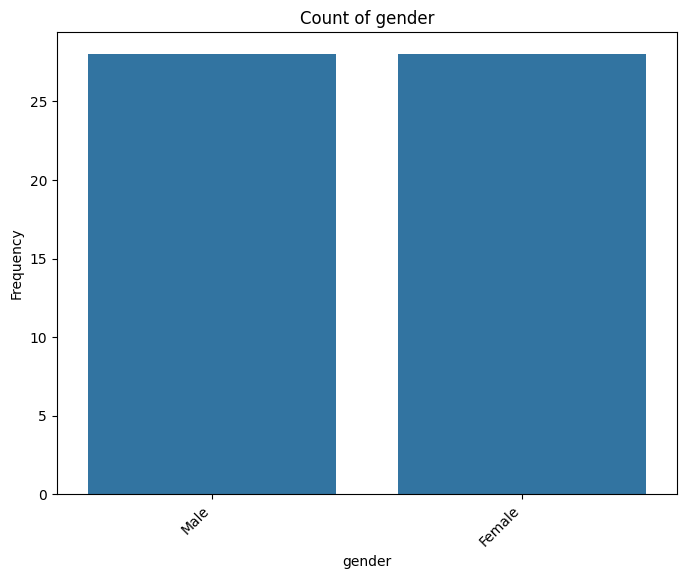

Value counts for gender:
gender
Male      28
Female    28
Name: count, dtype: int64



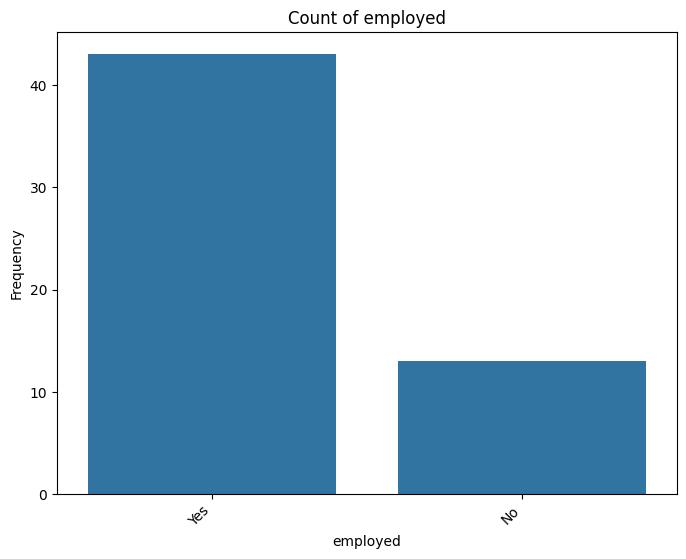

Value counts for employed:
employed
Yes    43
No     13
Name: count, dtype: int64



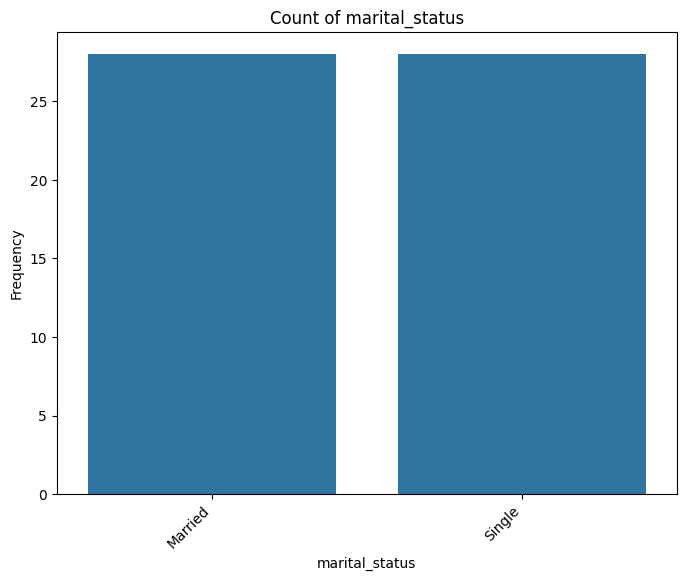

Value counts for marital_status:
marital_status
Married    28
Single     28
Name: count, dtype: int64



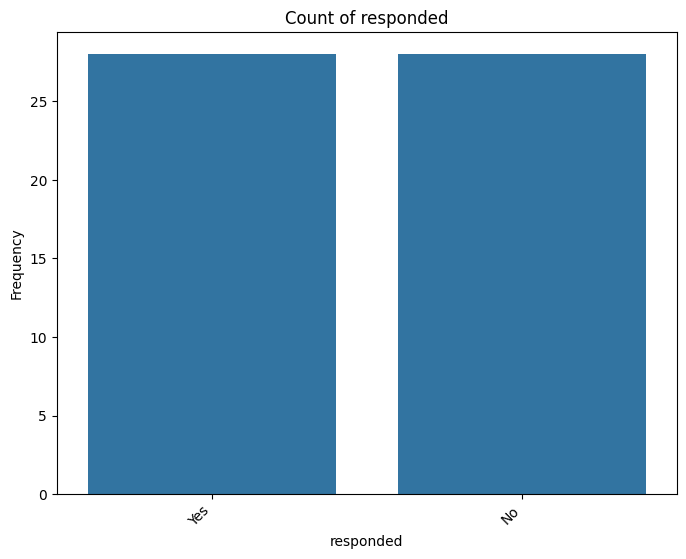

Value counts for responded:
responded
Yes    28
No     28
Name: count, dtype: int64



In [ ]:

# Univariate Analysis for Numerical Features

for column in numerical_df.columns:
  plt.figure(figsize=(8, 6))  # Adjust figure size as needed
  sns.histplot(df[column], kde=True)  # Histogram with KDE
  plt.title(f"Distribution of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()

  # Calculate descriptive statistics
  print(f"Descriptive statistics for {column}:\n{df[column].describe()}\n")

# Univariate Analysis for Categorical Features

for column in df.select_dtypes(include=['object']).columns:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=df[column])
  plt.title(f"Count of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
  plt.show()

  # Print value counts for each category
  print(f"Value counts for {column}:\n{df[column].value_counts()}\n")

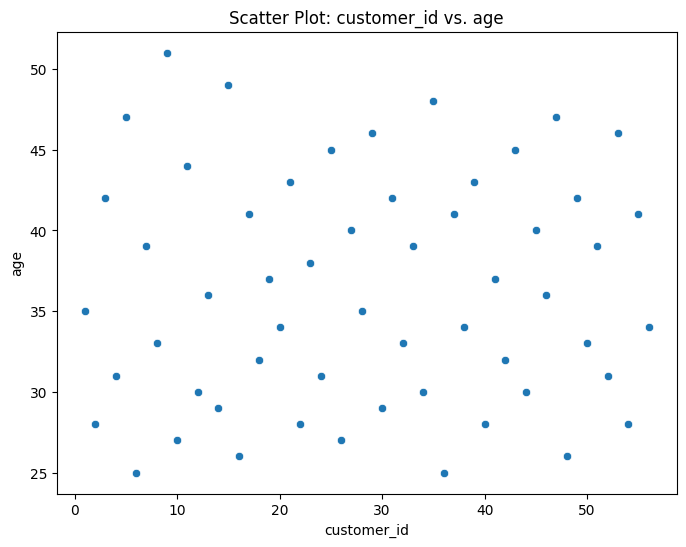

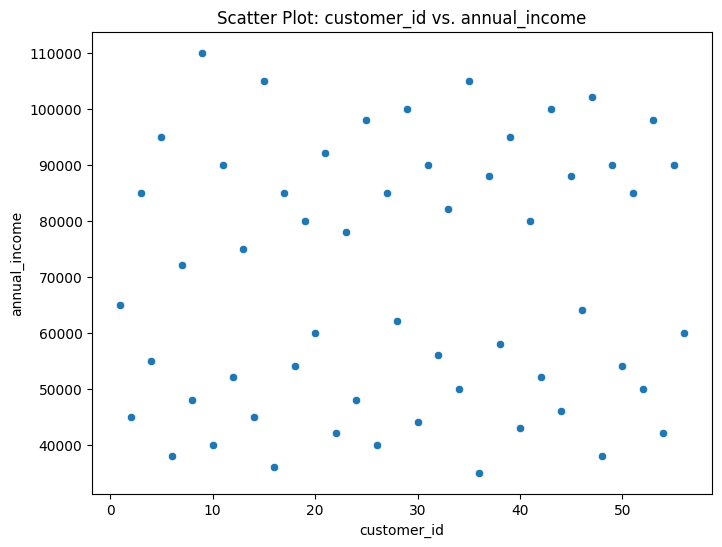

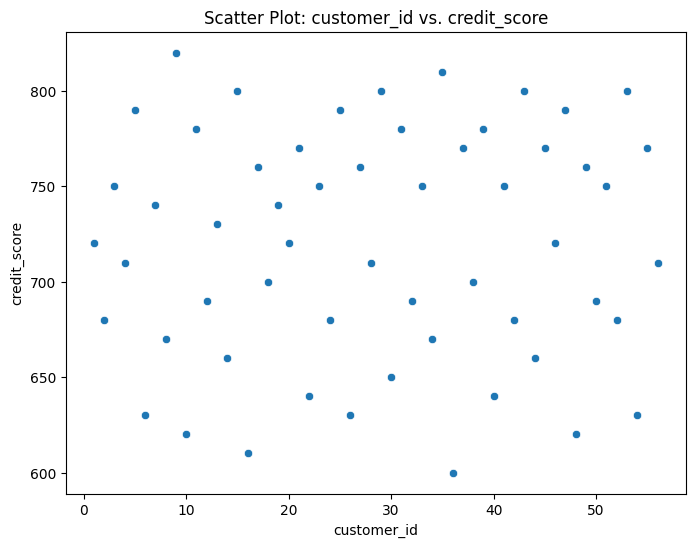

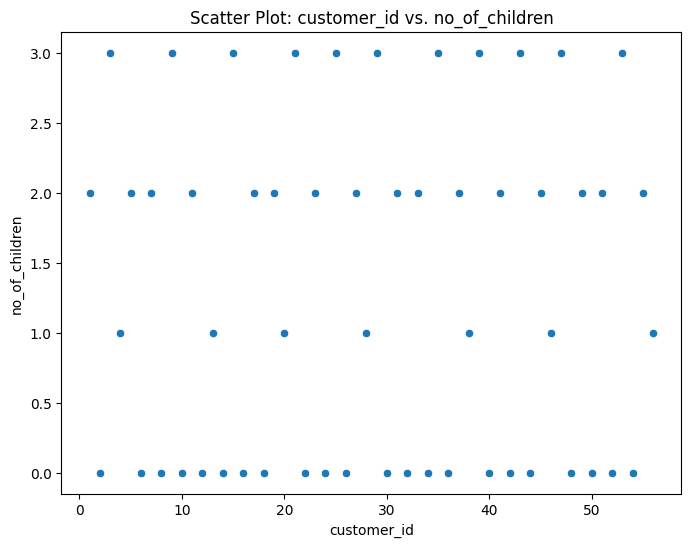

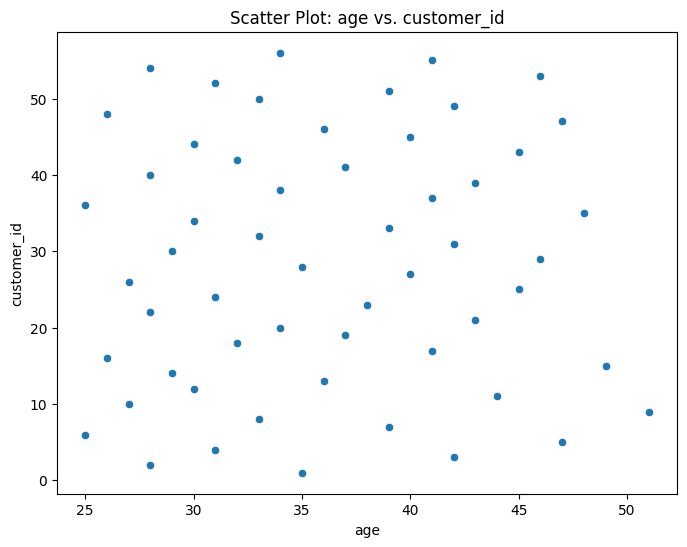

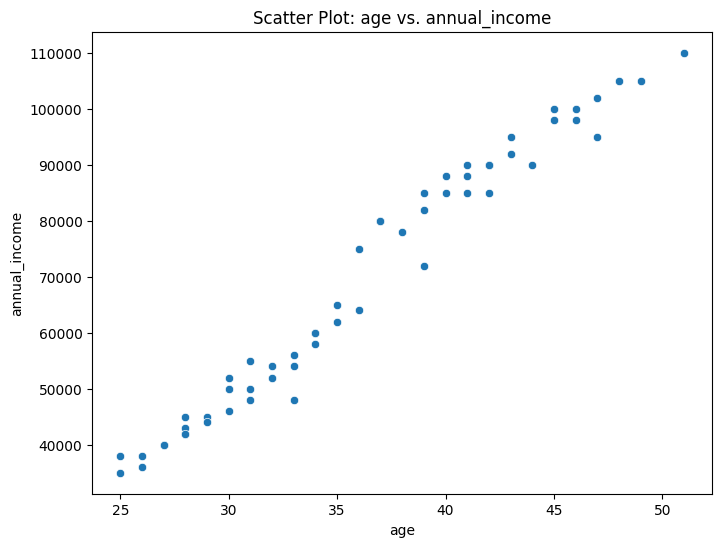

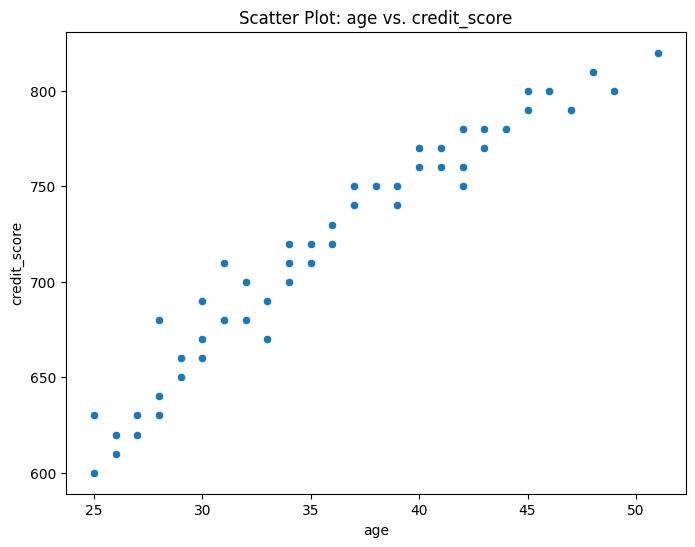

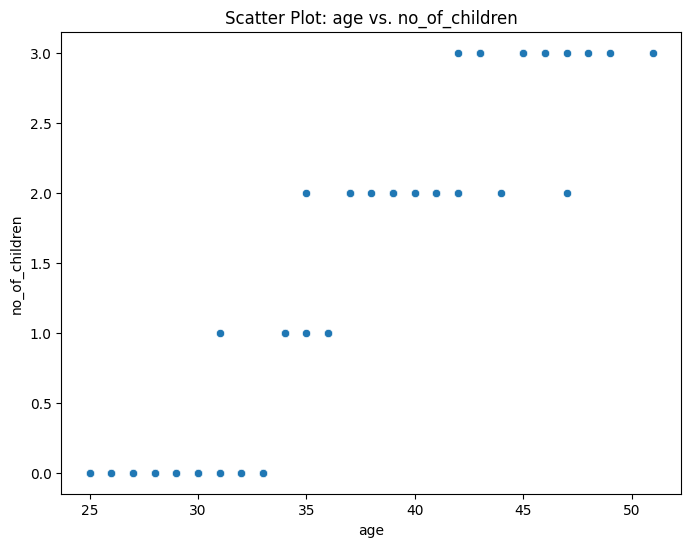

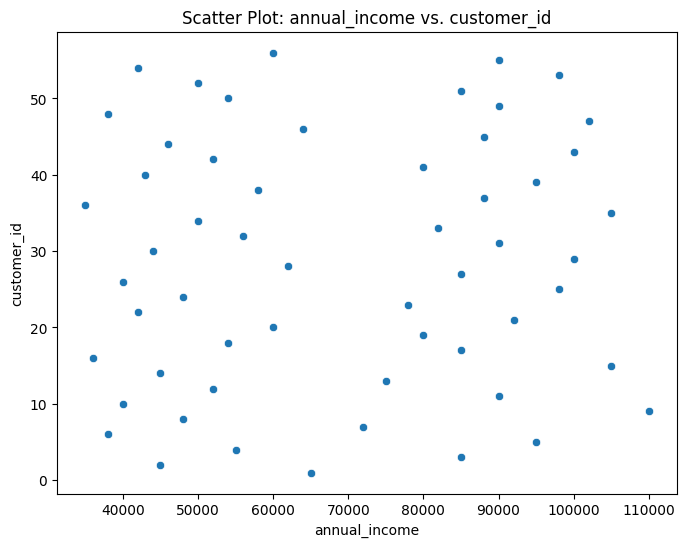

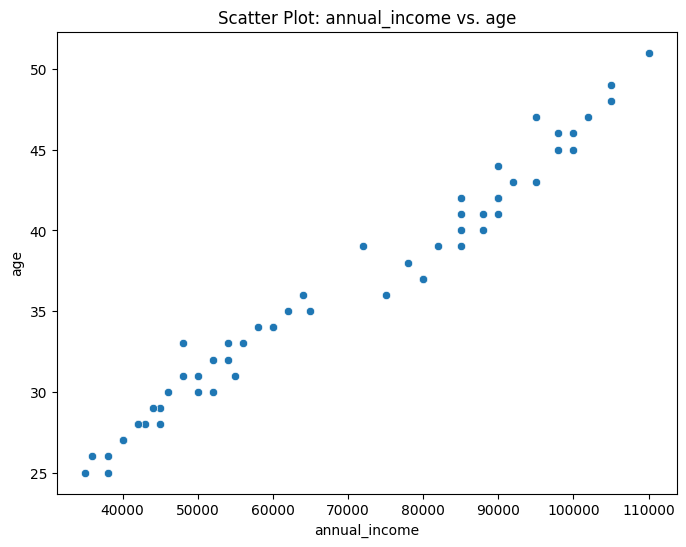

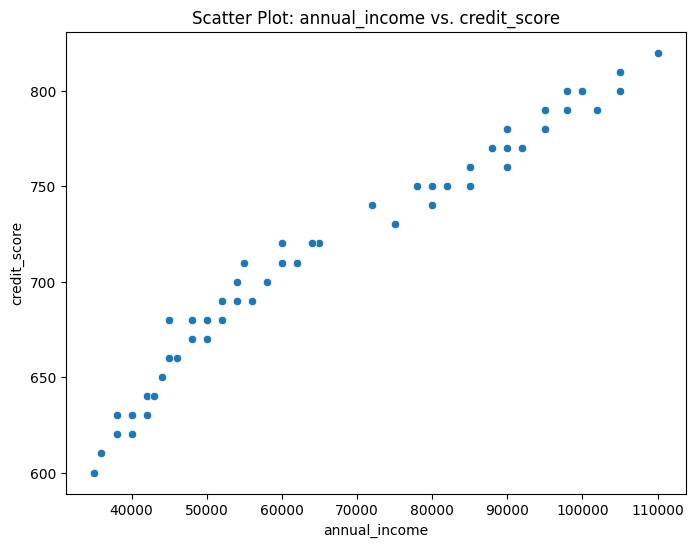

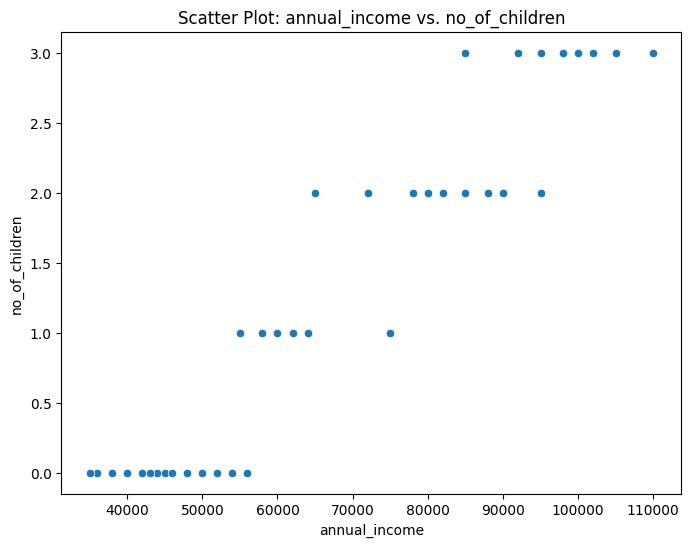

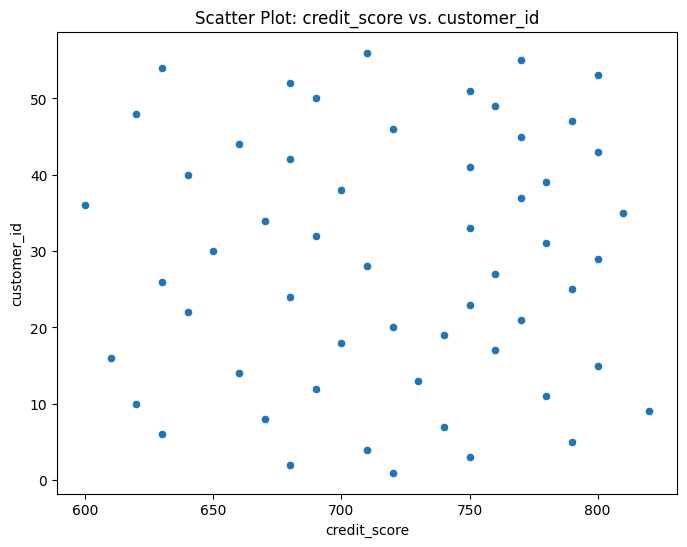

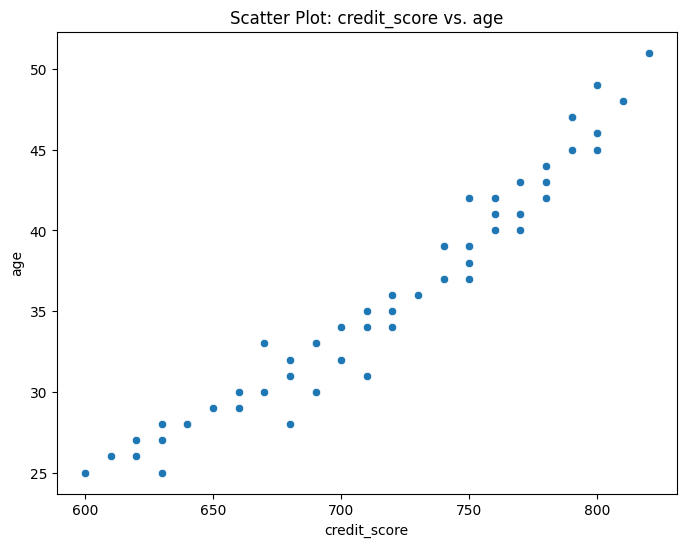

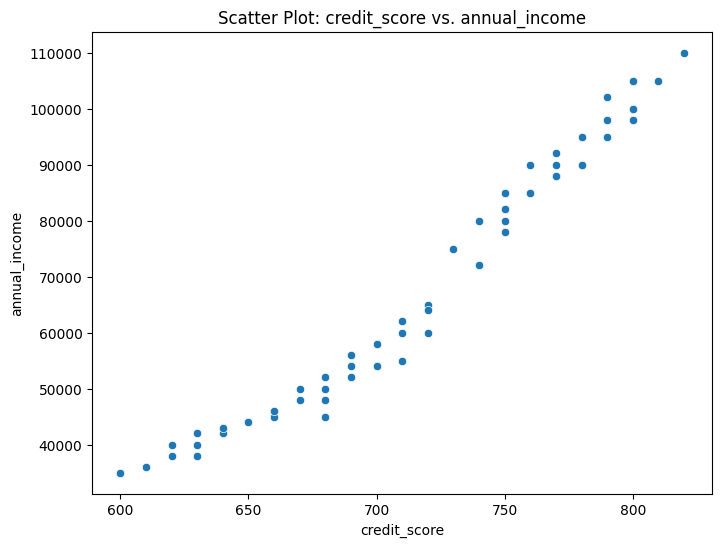

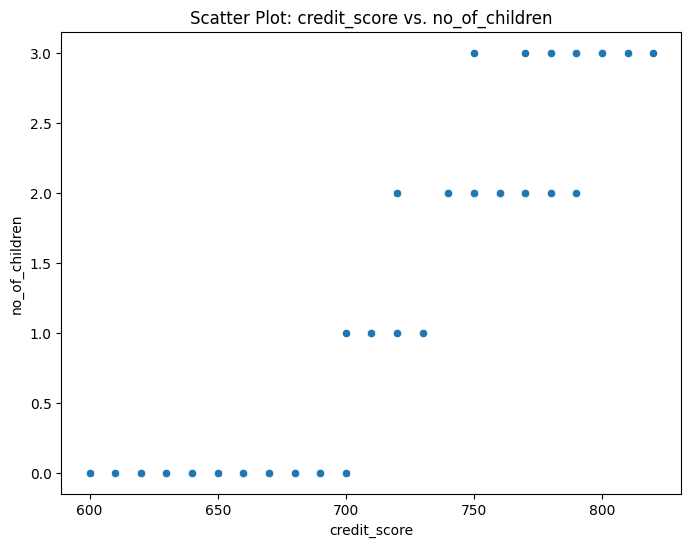

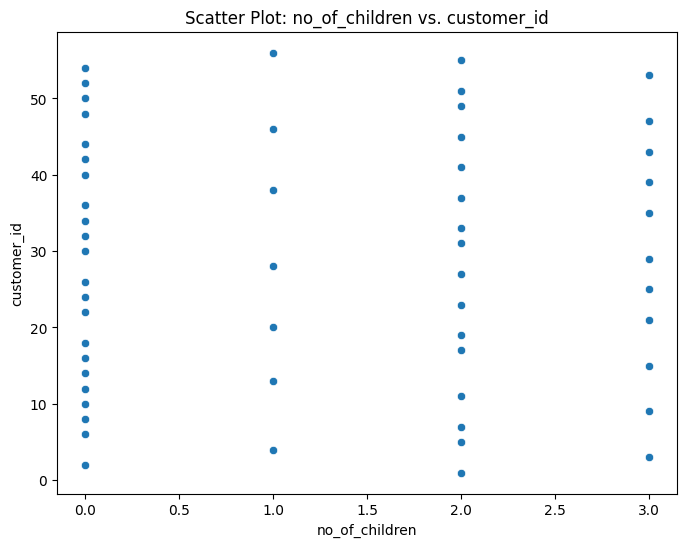

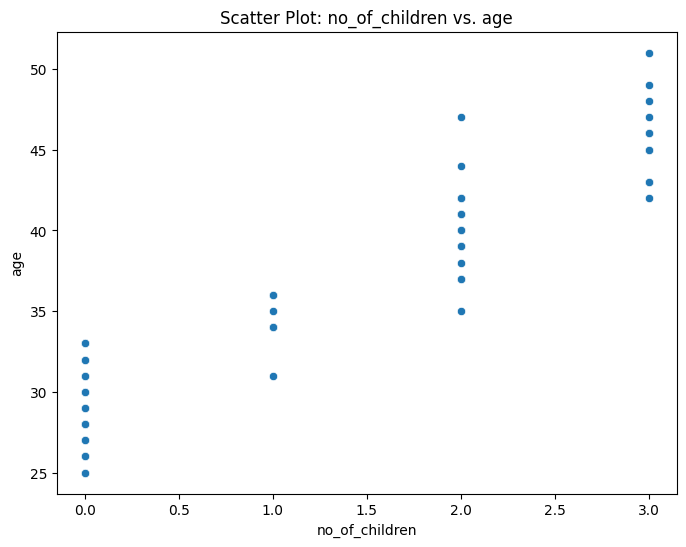

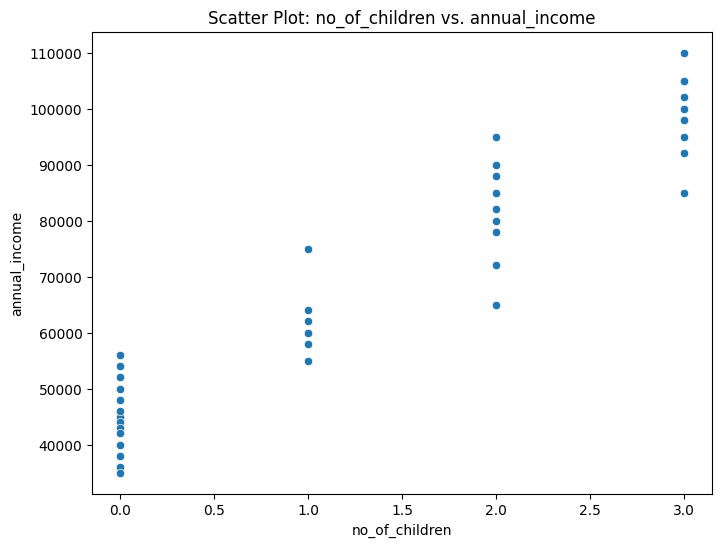

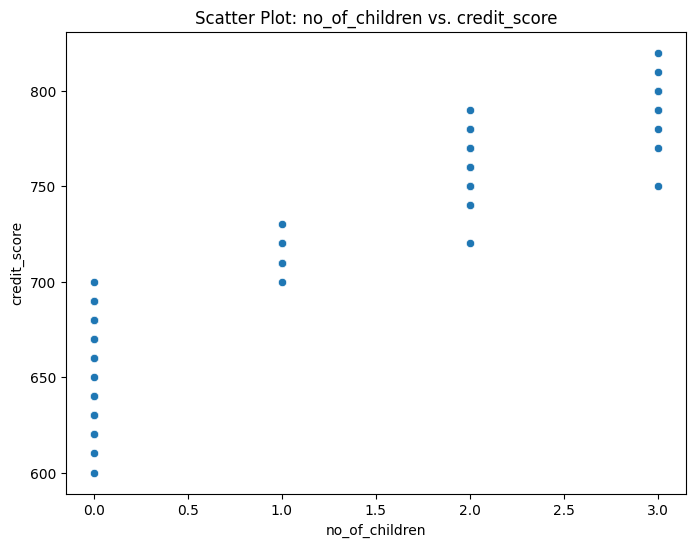

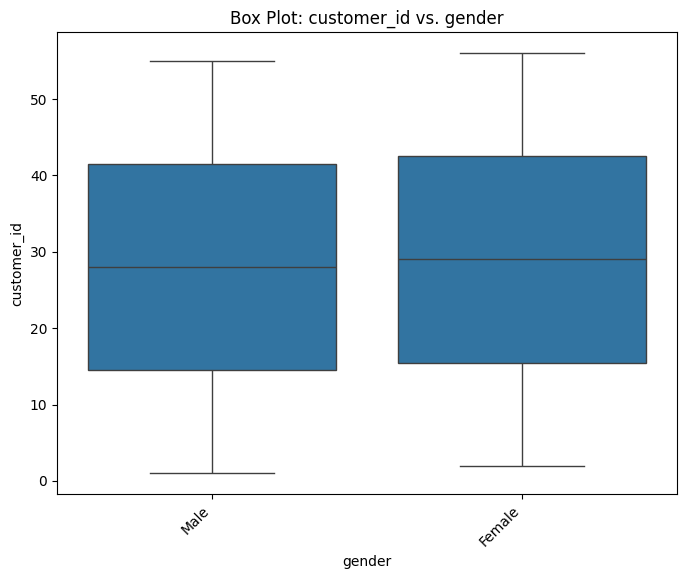

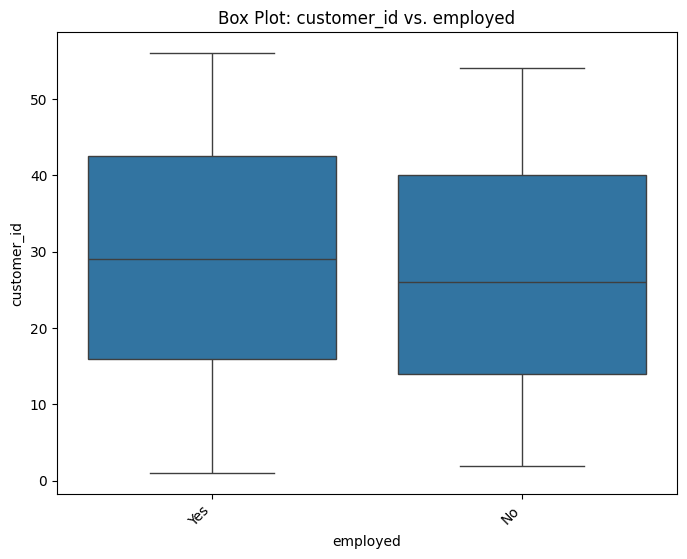

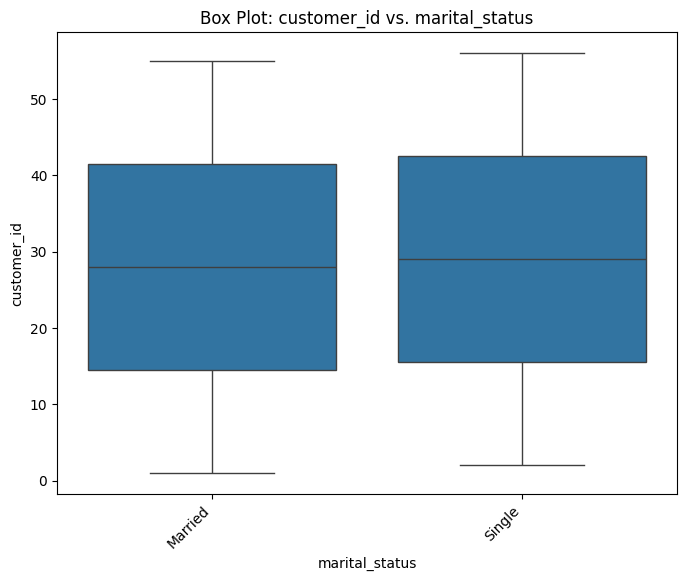

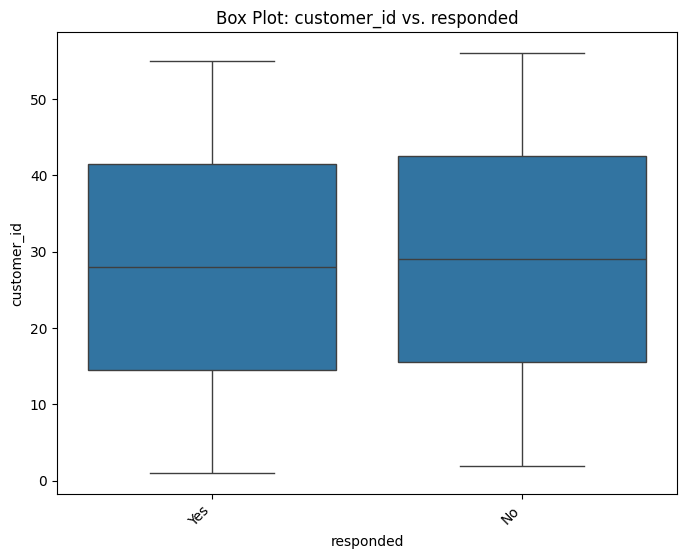

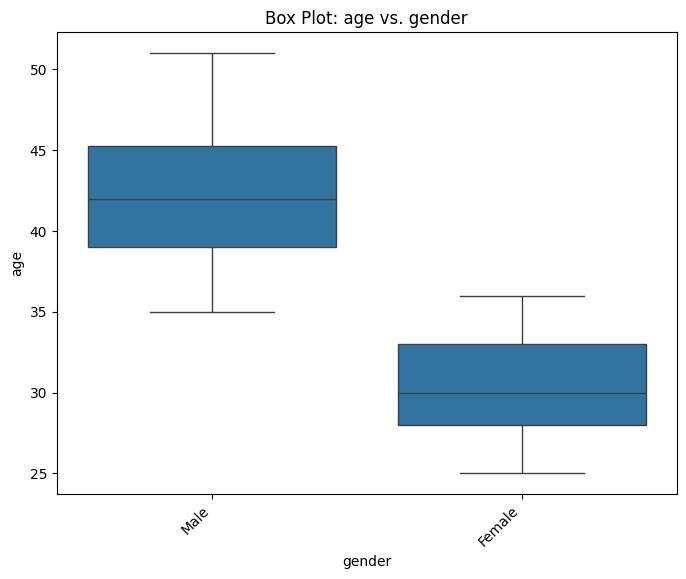

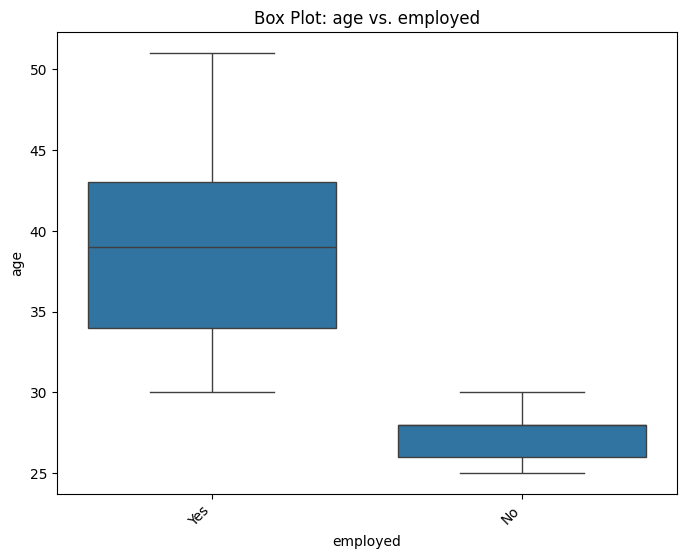

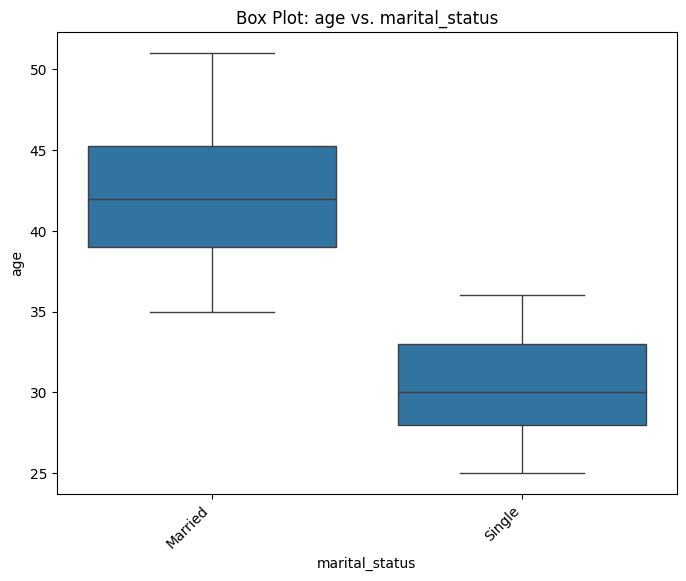

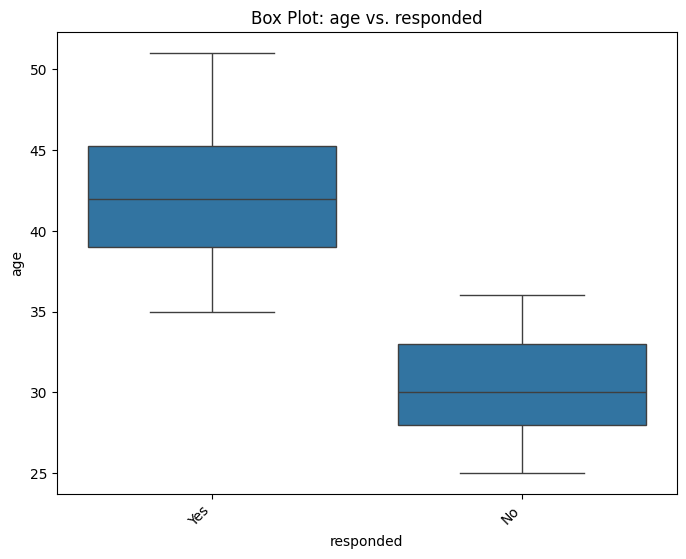

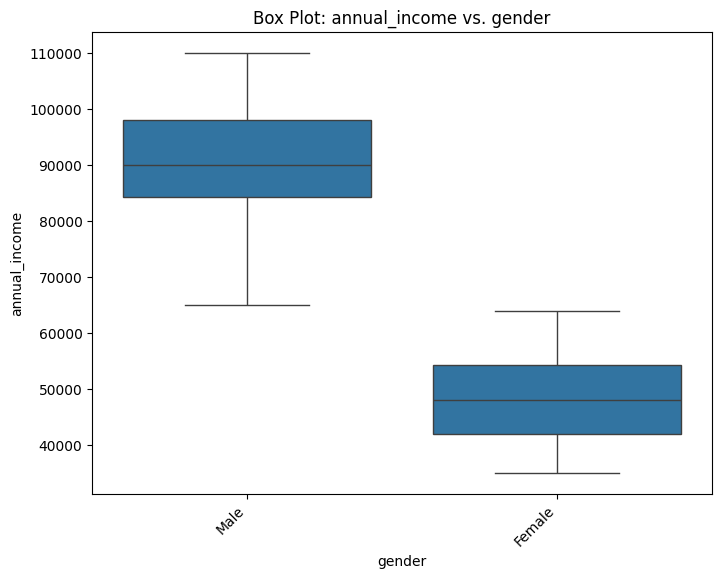

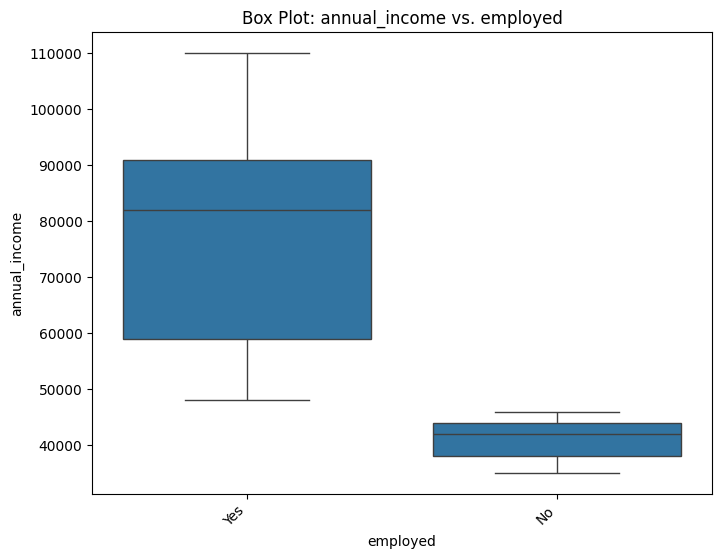

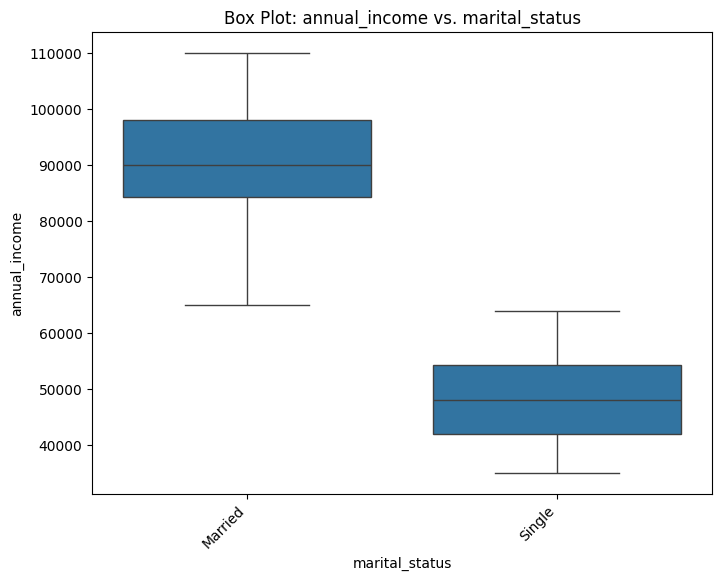

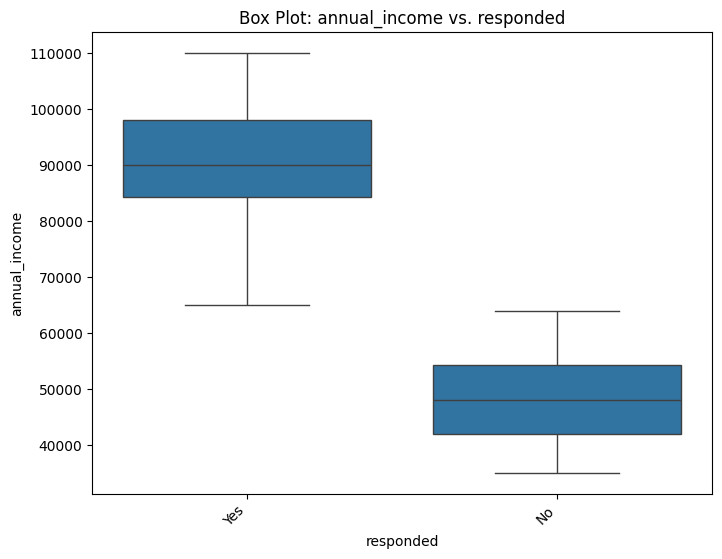

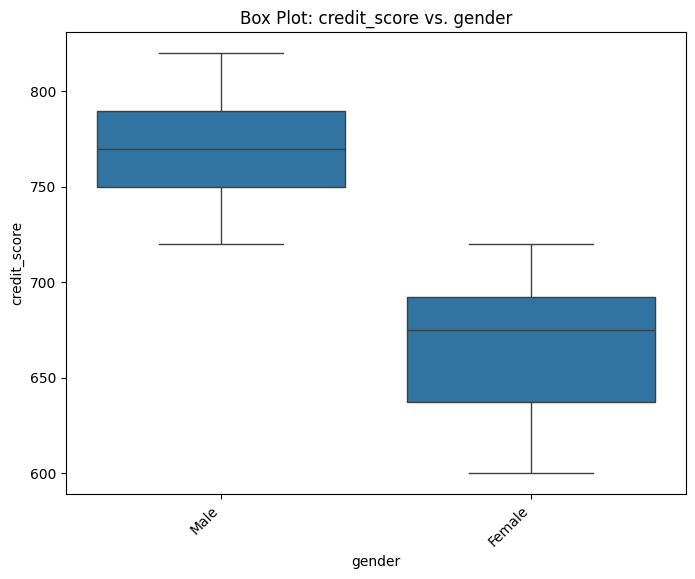

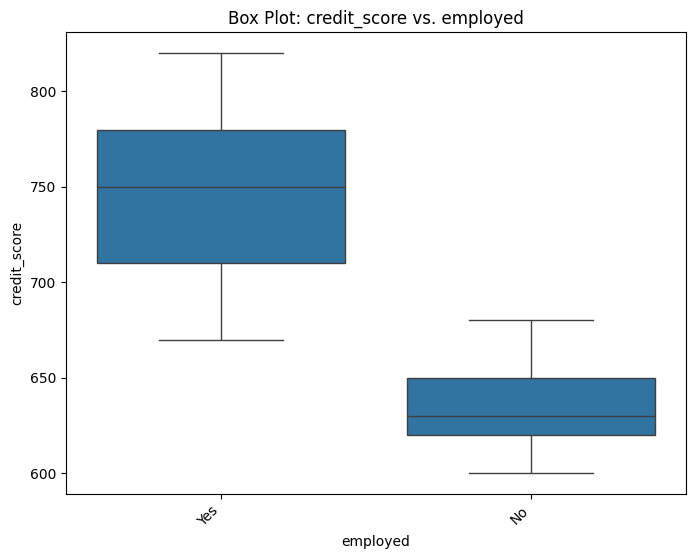

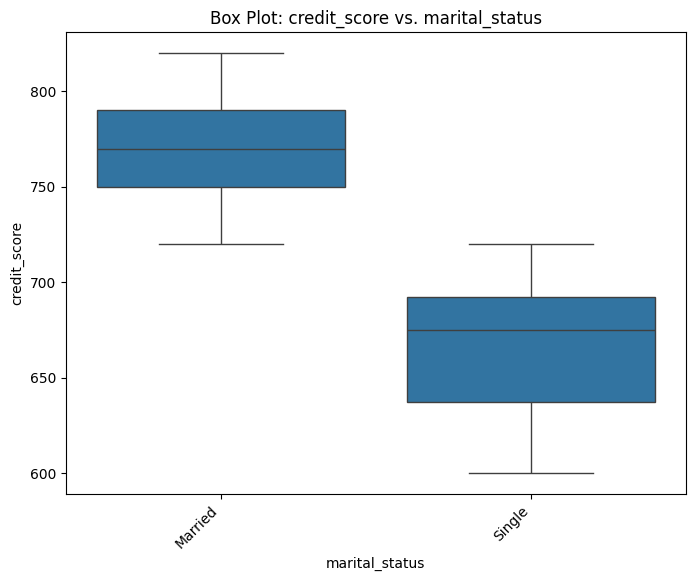

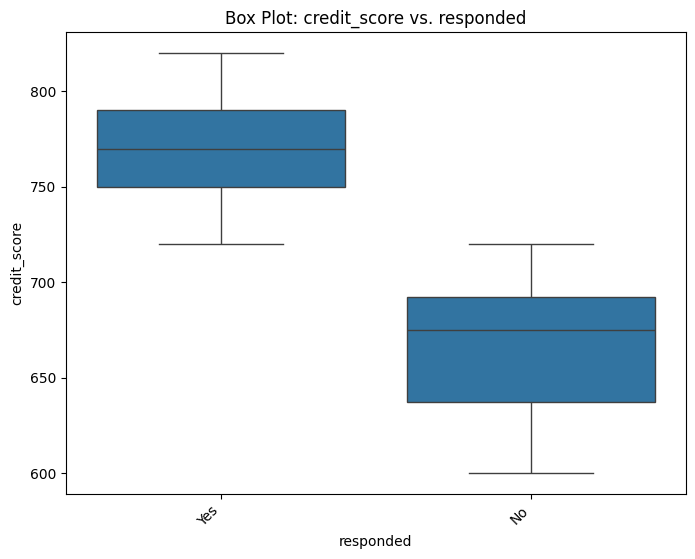

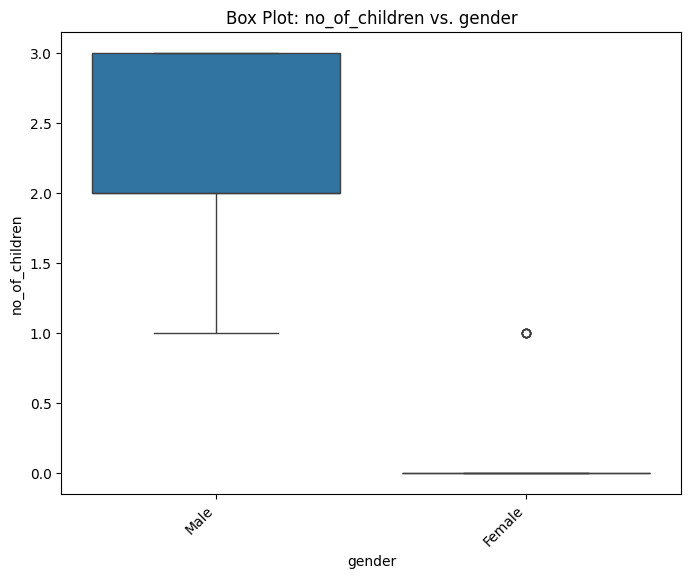

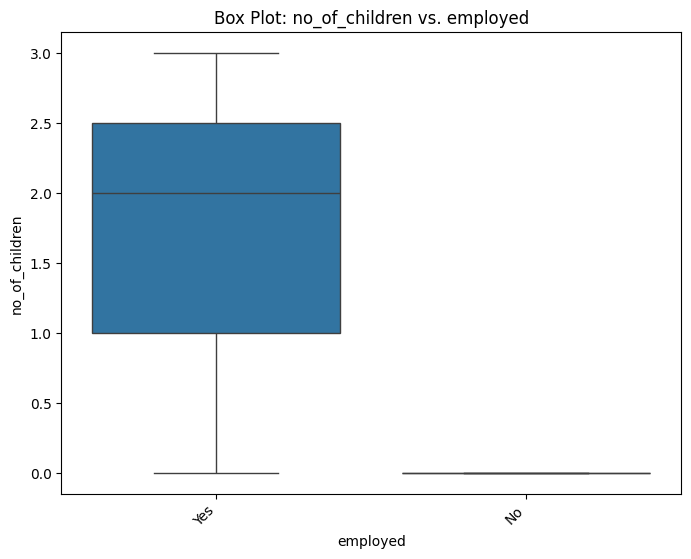

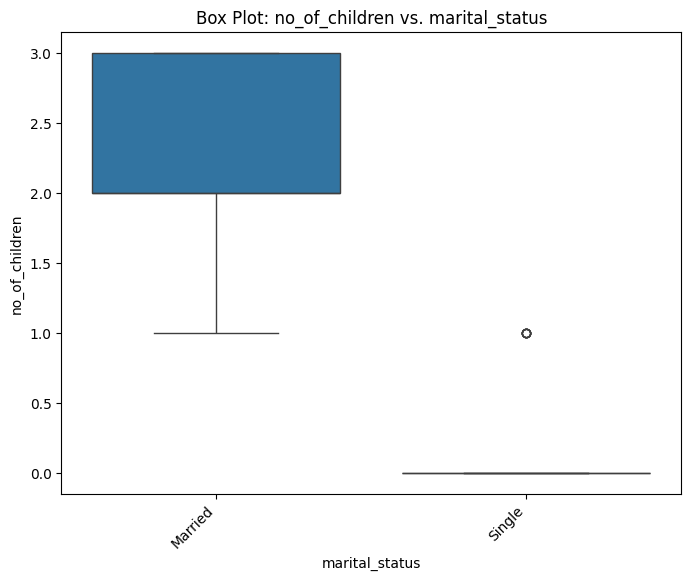

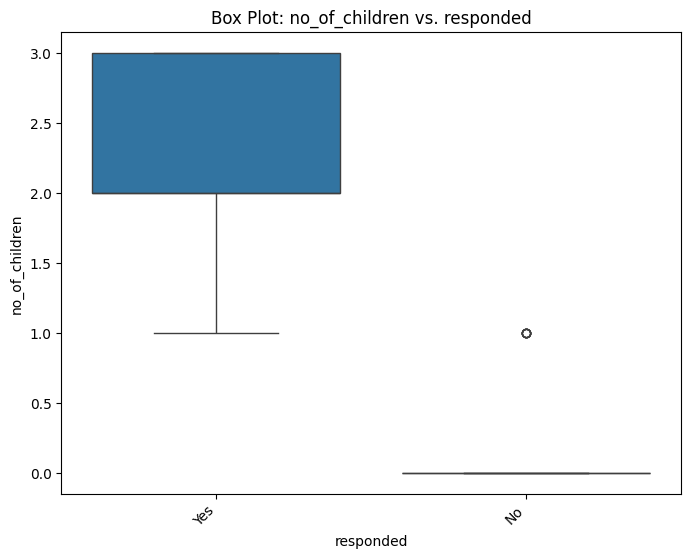

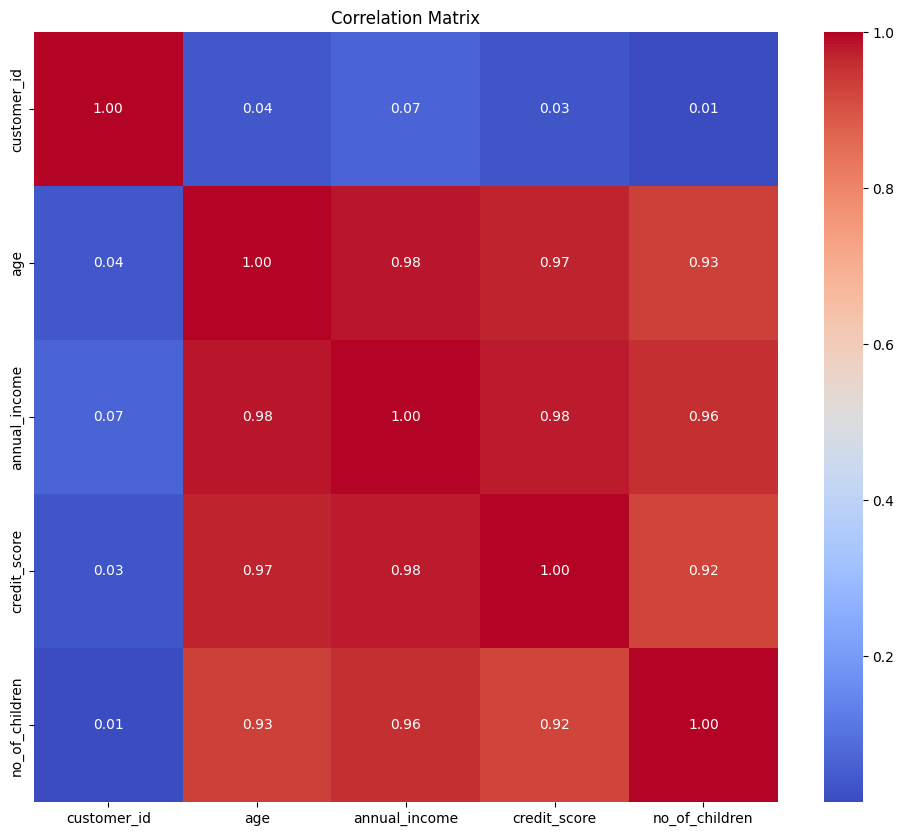

Chi-square test for gender vs. employed:
Chi-square statistic: 14.425760286225401
P-value: 0.00014579427353621712
--------------------
Chi-square test for gender vs. marital_status:
Chi-square statistic: 52.07142857142857
P-value: 5.351799658568329e-13
--------------------
Chi-square test for gender vs. responded:
Chi-square statistic: 52.07142857142857
P-value: 5.351799658568329e-13
--------------------
Chi-square test for employed vs. gender:
Chi-square statistic: 14.425760286225401
P-value: 0.00014579427353621712
--------------------
Chi-square test for employed vs. marital_status:
Chi-square statistic: 14.425760286225401
P-value: 0.00014579427353621712
--------------------
Chi-square test for employed vs. responded:
Chi-square statistic: 14.425760286225401
P-value: 0.00014579427353621712
--------------------
Chi-square test for marital_status vs. gender:
Chi-square statistic: 52.07142857142857
P-value: 5.351799658568329e-13
--------------------
Chi-square test for marital_status vs

In [ ]:

# Bivariate Analysis: Exploring Relationships Between Variables

# Scatter plots for numerical vs. numerical
for column1 in numerical_df.columns:
  for column2 in numerical_df.columns:
    if column1 != column2:
      plt.figure(figsize=(8, 6))
      sns.scatterplot(x=df[column1], y=df[column2])
      plt.title(f"Scatter Plot: {column1} vs. {column2}")
      plt.xlabel(column1)
      plt.ylabel(column2)
      plt.show()


# Box plots for numerical vs. categorical
for numerical_column in numerical_df.columns:
  for categorical_column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[categorical_column], y=df[numerical_column])
    plt.title(f"Box Plot: {numerical_column} vs. {categorical_column}")
    plt.xlabel(categorical_column)
    plt.ylabel(numerical_column)
    plt.xticks(rotation=45, ha='right')
    plt.show()


# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Chi-square test for categorical vs. categorical
from scipy.stats import chi2_contingency

for column1 in df.select_dtypes(include=['object']).columns:
  for column2 in df.select_dtypes(include=['object']).columns:
    if column1 != column2:
      contingency_table = pd.crosstab(df[column1], df[column2])
      chi2, p, _, _ = chi2_contingency(contingency_table)
      print(f"Chi-square test for {column1} vs. {column2}:")
      print(f"Chi-square statistic: {chi2}")
      print(f"P-value: {p}")
      print("-" * 20)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     56 non-null     int64 
 1   age             56 non-null     int64 
 2   gender          56 non-null     object
 3   annual_income   56 non-null     int64 
 4   credit_score    56 non-null     int64 
 5   employed        56 non-null     object
 6   marital_status  56 non-null     object
 7   no_of_children  56 non-null     int64 
 8   responded       56 non-null     object
dtypes: int64(5), object(4)
memory usage: 4.1+ KB
None
       customer_id        age  annual_income  credit_score  no_of_children
count    56.000000  56.000000      56.000000     56.000000       56.000000
mean     28.500000  36.214286   69017.857143    719.107143        1.285714
std      16.309506   7.088311   22784.756524     60.340753        1.186504
min       1.000000  25.000000   35000.000000    600.000000 

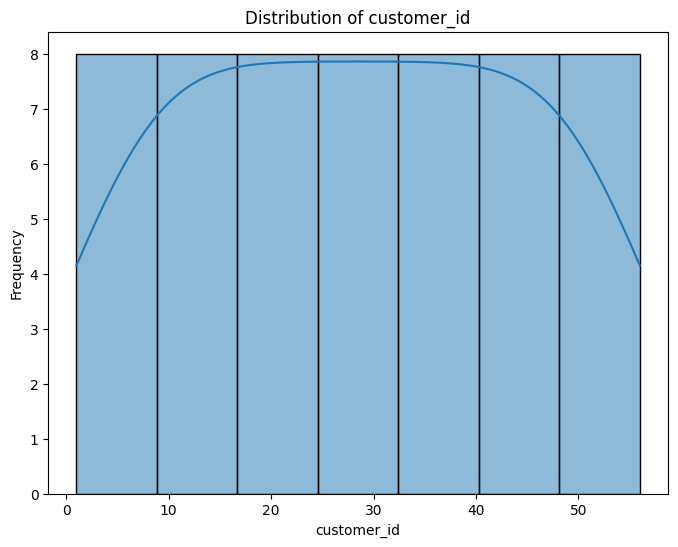

Descriptive statistics for customer_id:
count    56.000000
mean     28.500000
std      16.309506
min       1.000000
25%      14.750000
50%      28.500000
75%      42.250000
max      56.000000
Name: customer_id, dtype: float64



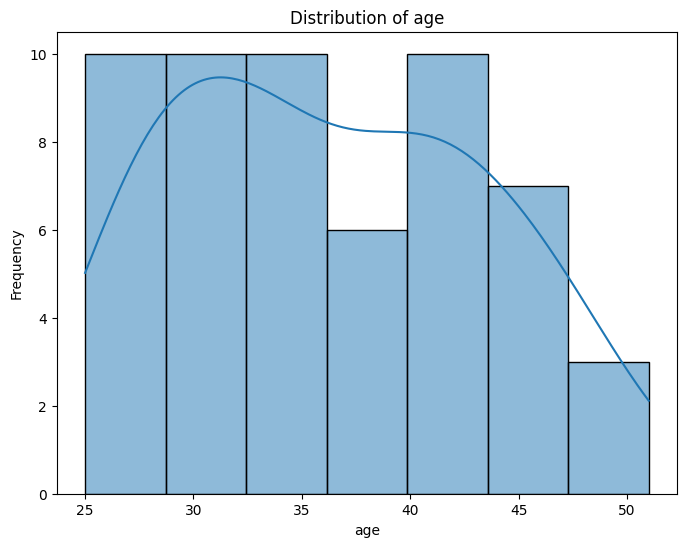

Descriptive statistics for age:
count    56.000000
mean     36.214286
std       7.088311
min      25.000000
25%      30.000000
50%      35.500000
75%      42.000000
max      51.000000
Name: age, dtype: float64



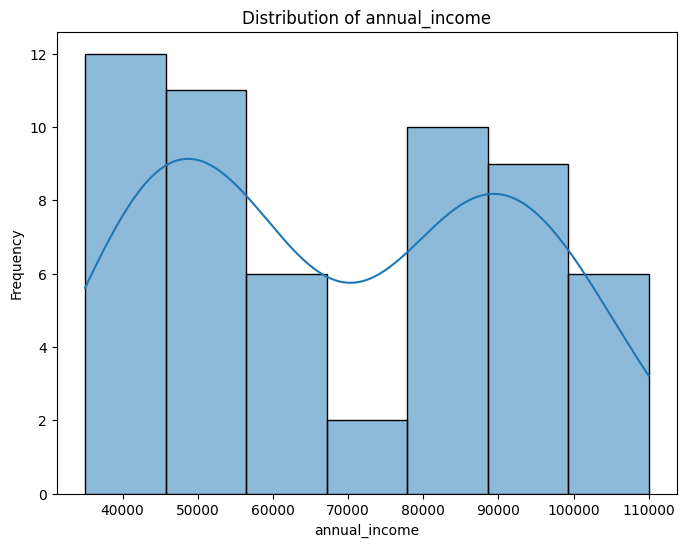

Descriptive statistics for annual_income:
count        56.000000
mean      69017.857143
std       22784.756524
min       35000.000000
25%       48000.000000
50%       64500.000000
75%       90000.000000
max      110000.000000
Name: annual_income, dtype: float64



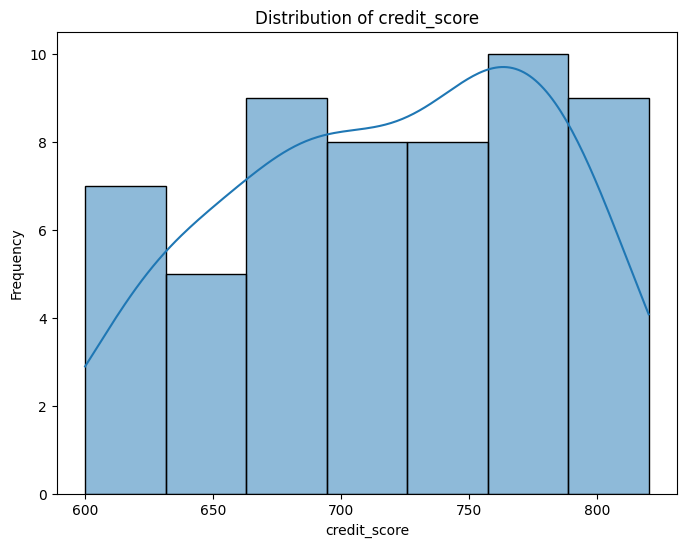

Descriptive statistics for credit_score:
count     56.000000
mean     719.107143
std       60.340753
min      600.000000
25%      677.500000
50%      720.000000
75%      770.000000
max      820.000000
Name: credit_score, dtype: float64



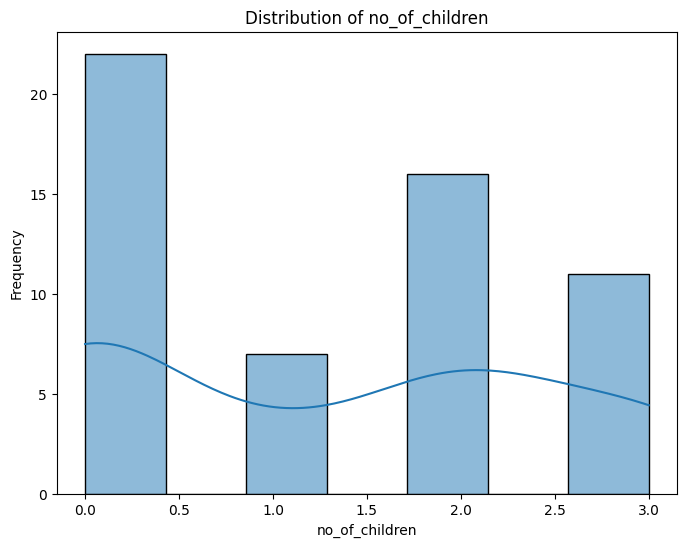

Descriptive statistics for no_of_children:
count    56.000000
mean      1.285714
std       1.186504
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: no_of_children, dtype: float64



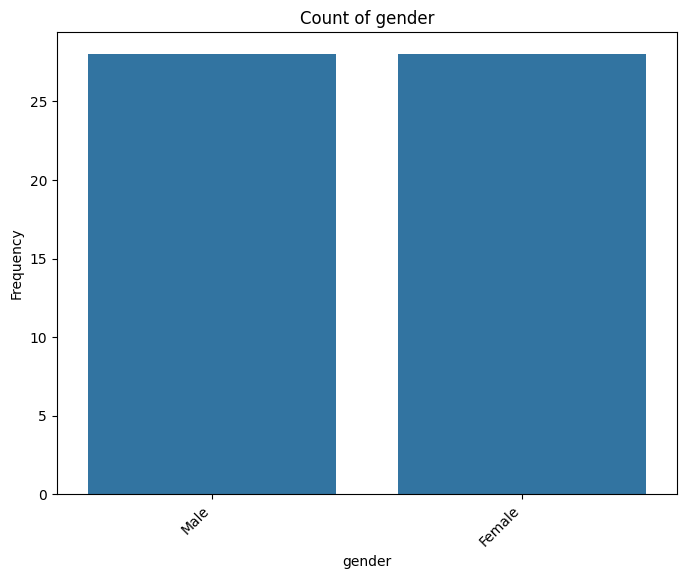

Value counts for gender:
gender
Male      28
Female    28
Name: count, dtype: int64



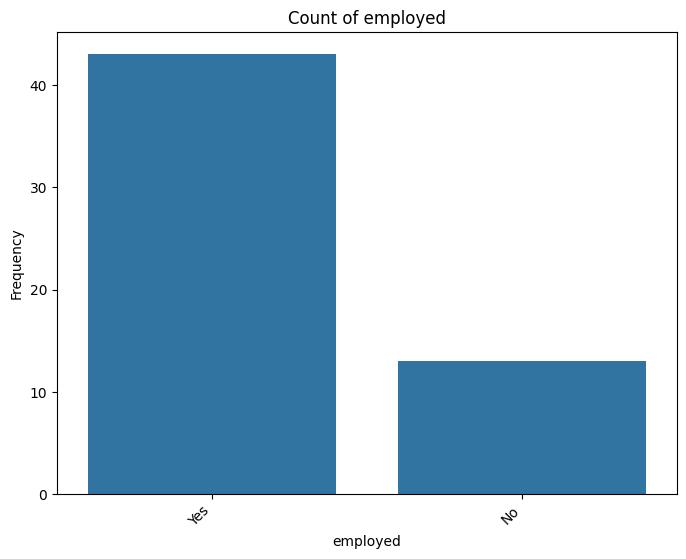

Value counts for employed:
employed
Yes    43
No     13
Name: count, dtype: int64



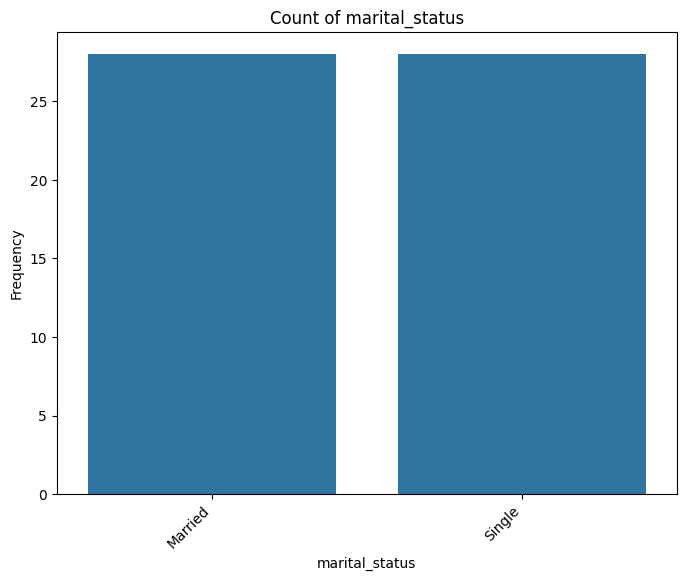

Value counts for marital_status:
marital_status
Married    28
Single     28
Name: count, dtype: int64



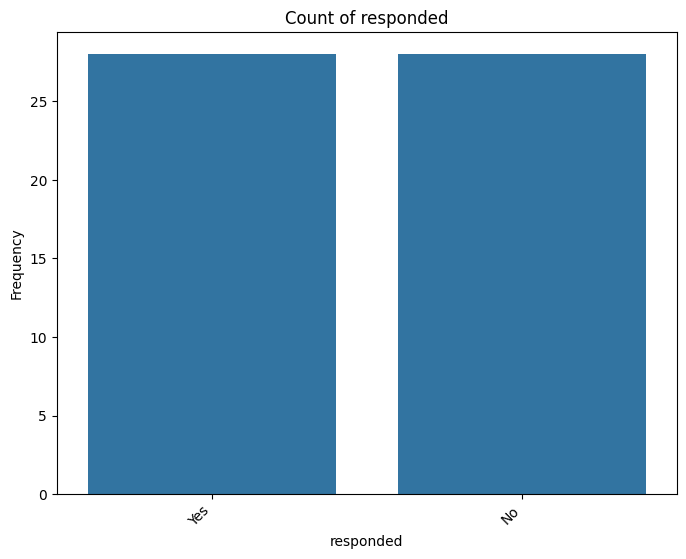

Value counts for responded:
responded
Yes    28
No     28
Name: count, dtype: int64



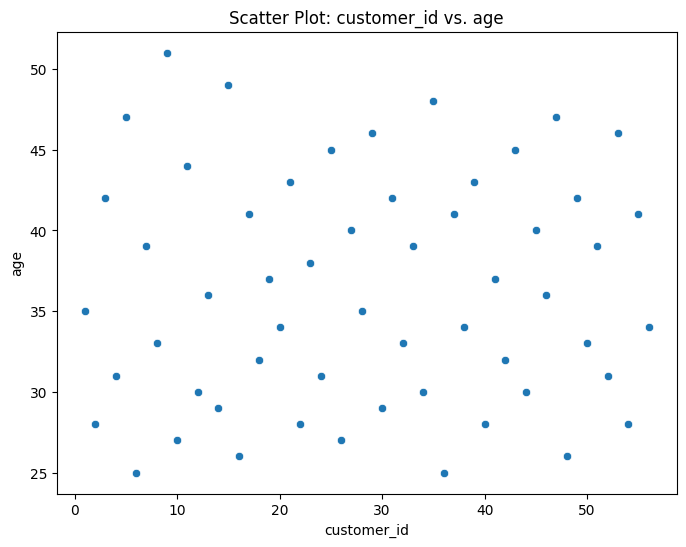

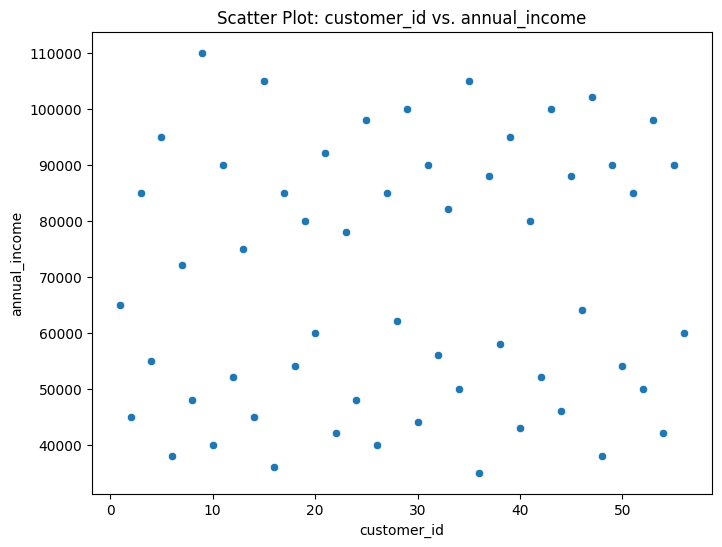

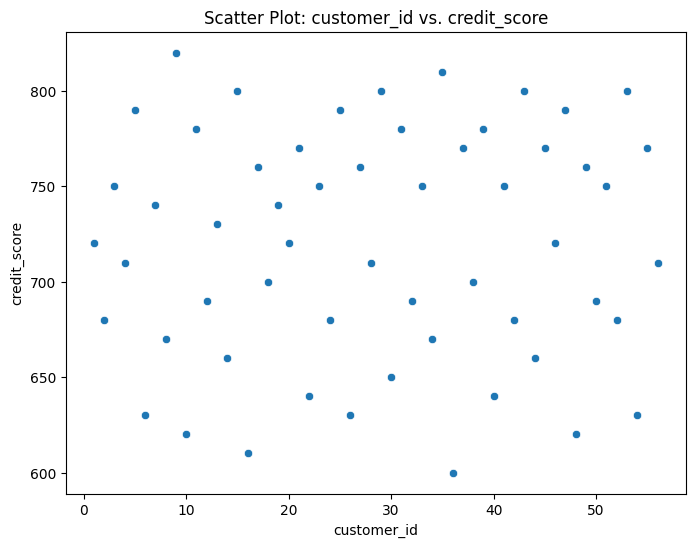

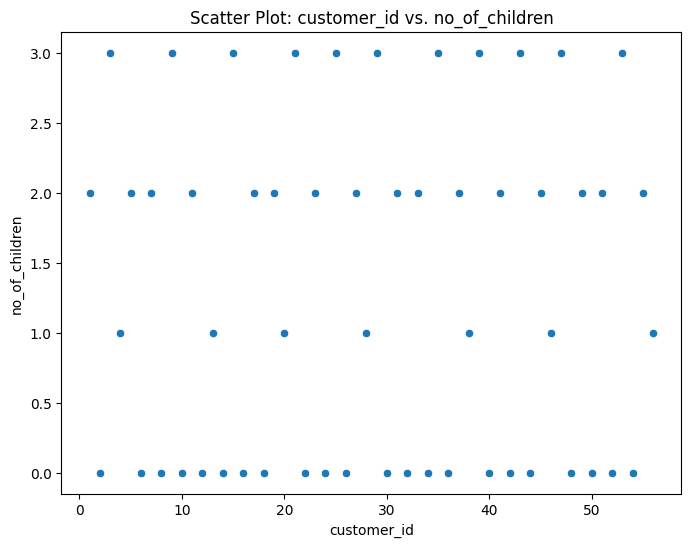

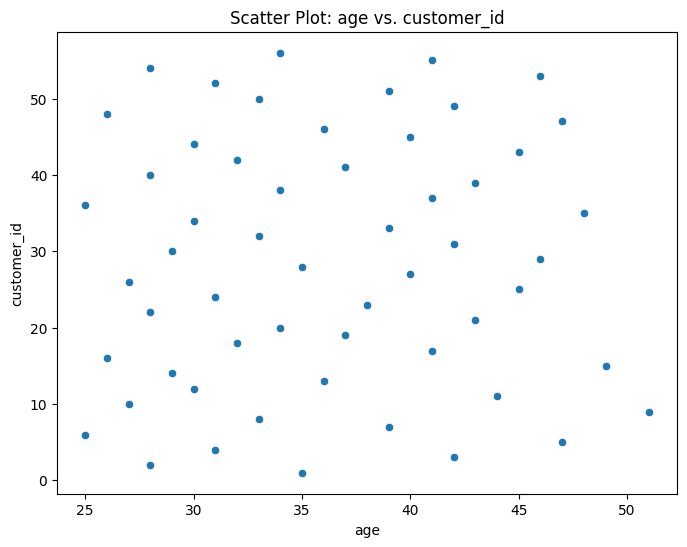

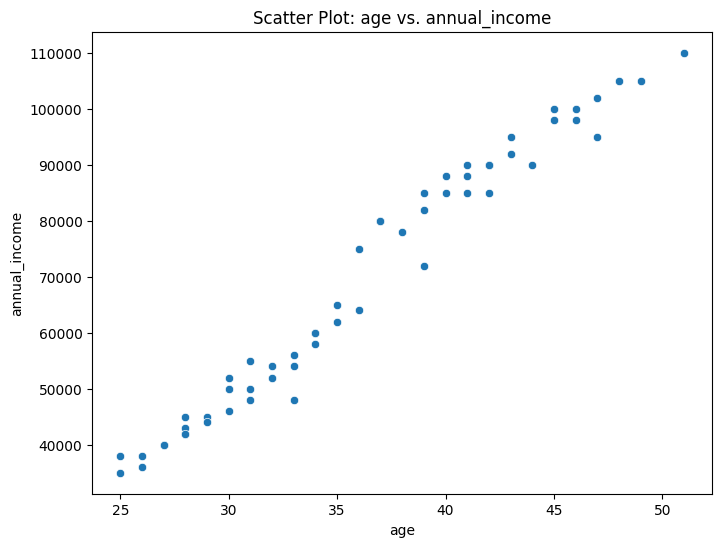

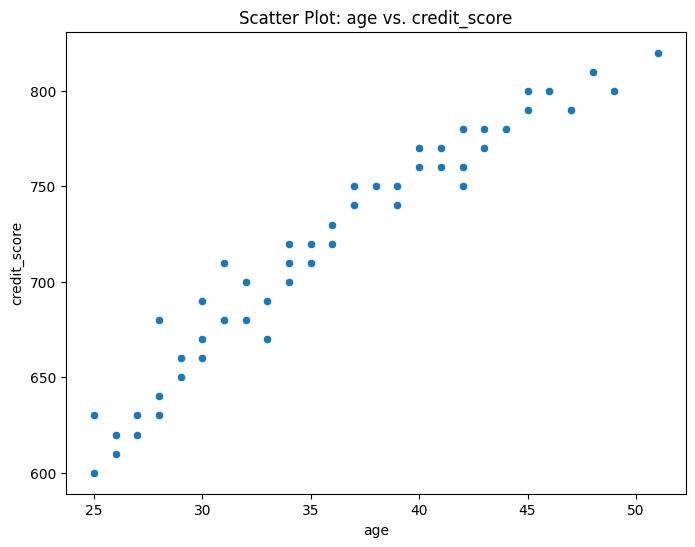

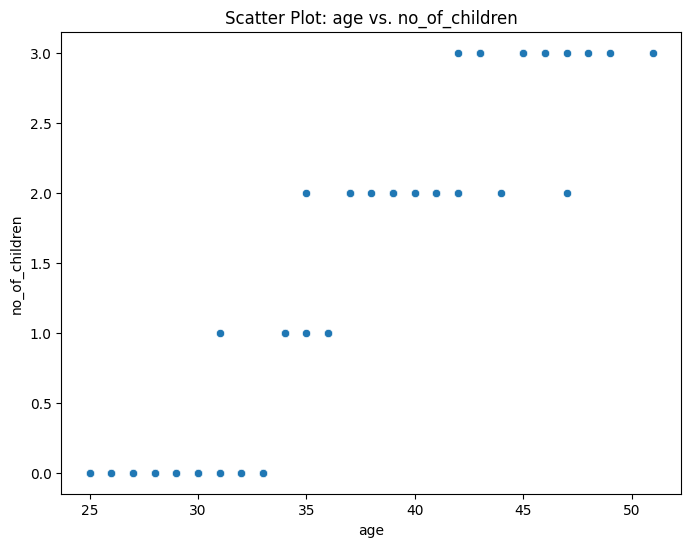

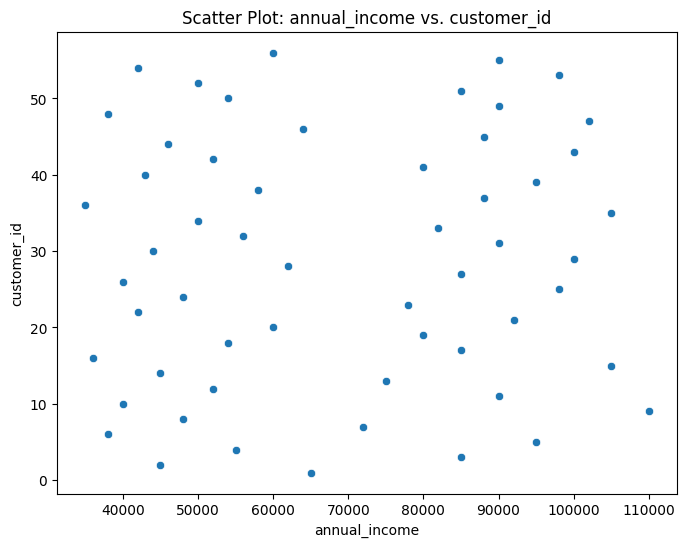

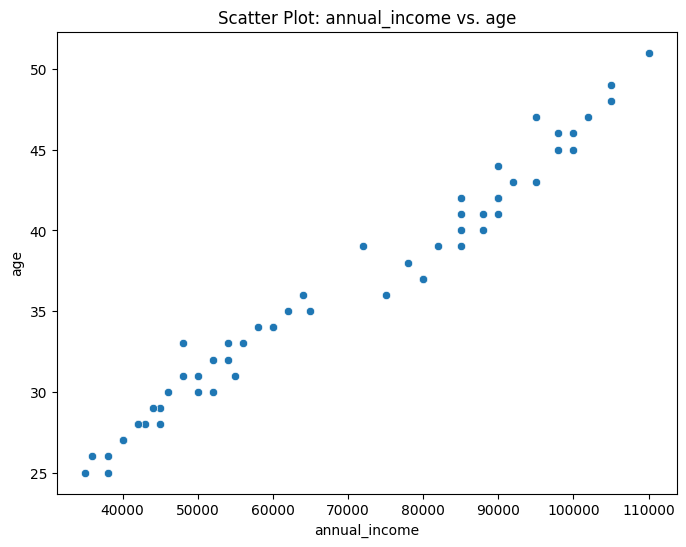

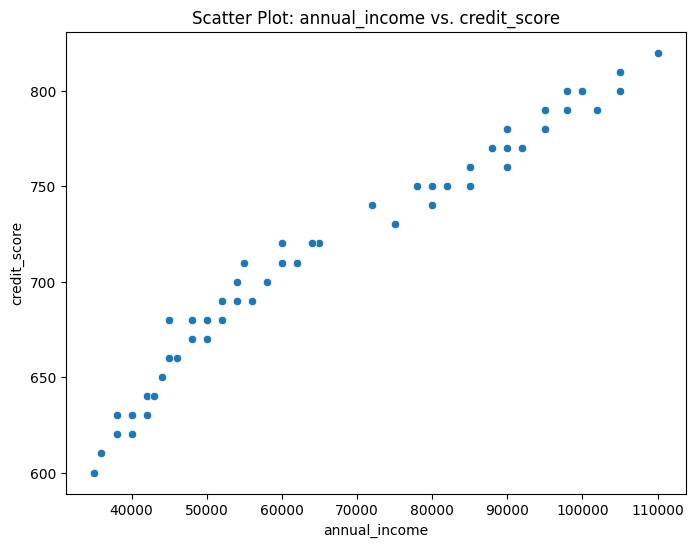

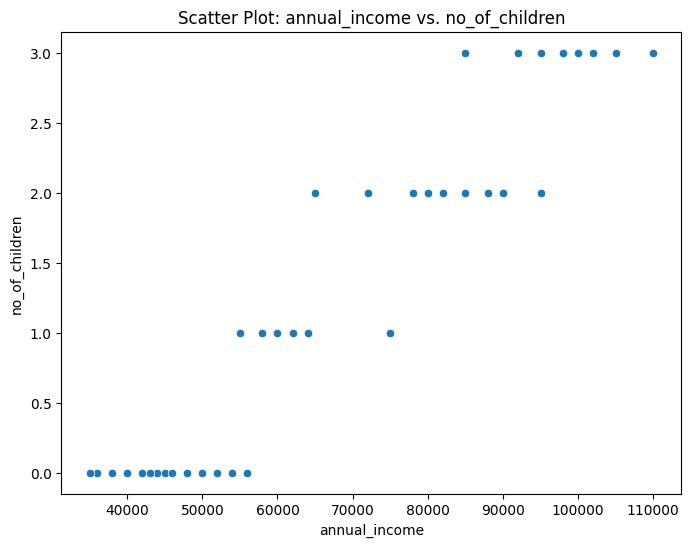

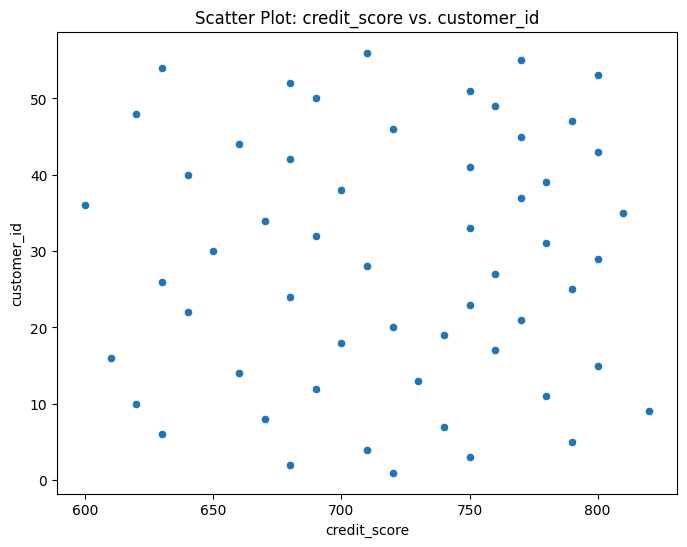

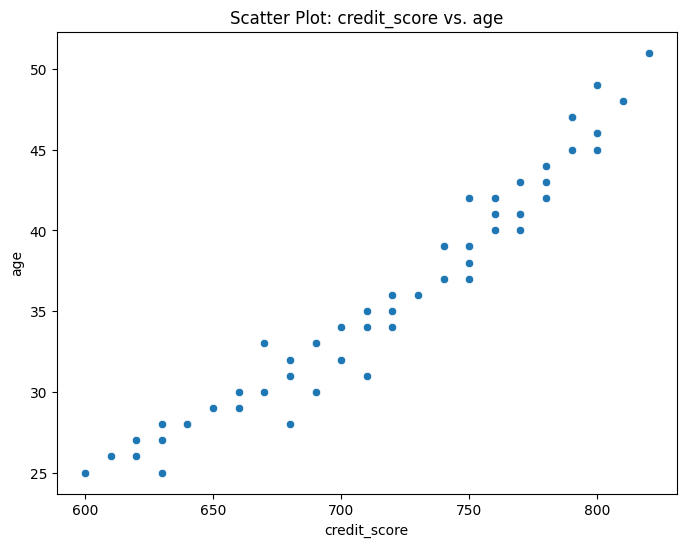

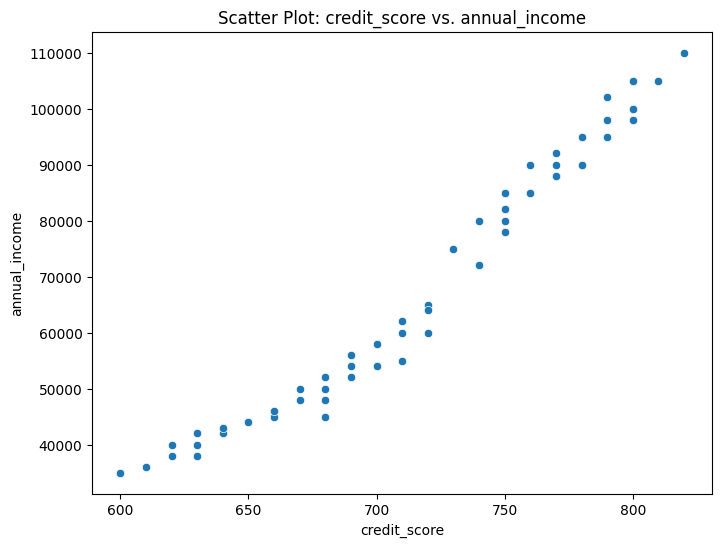

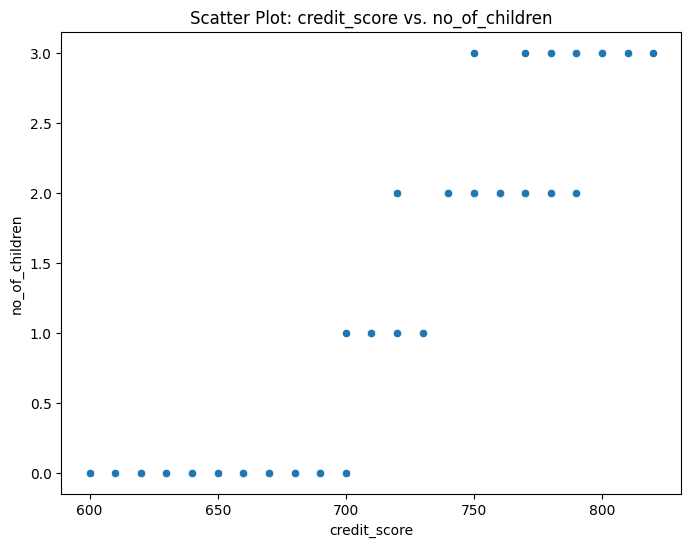

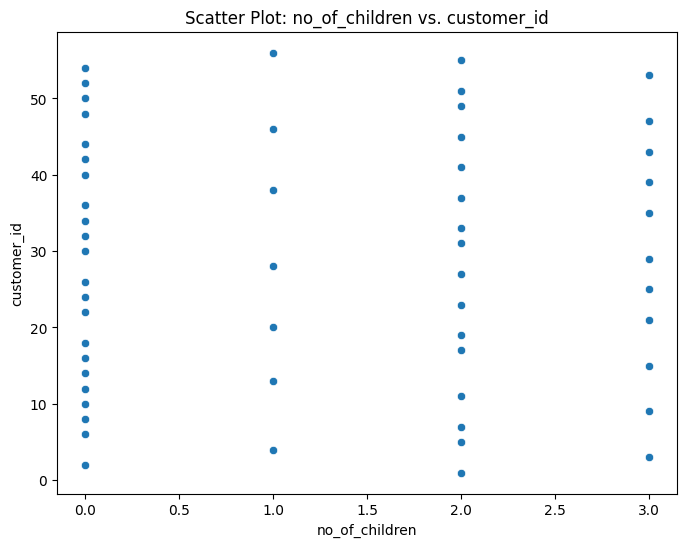

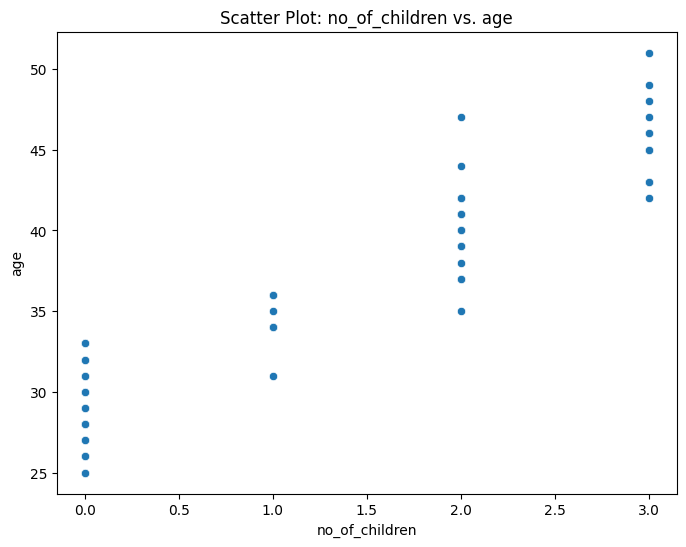

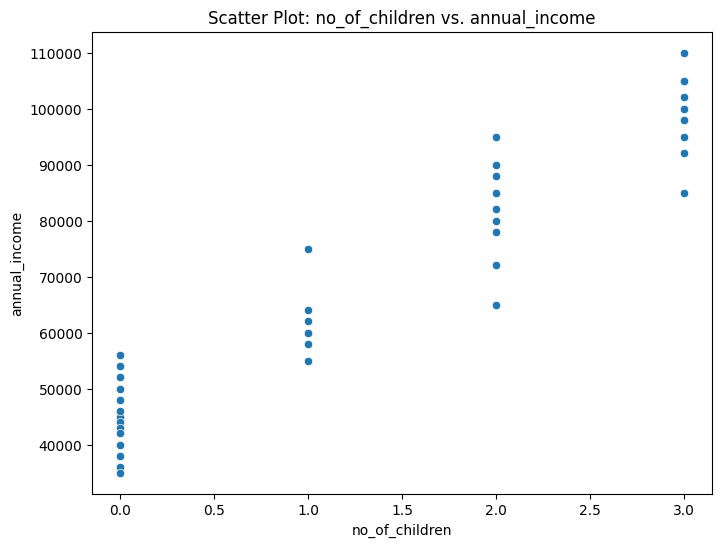

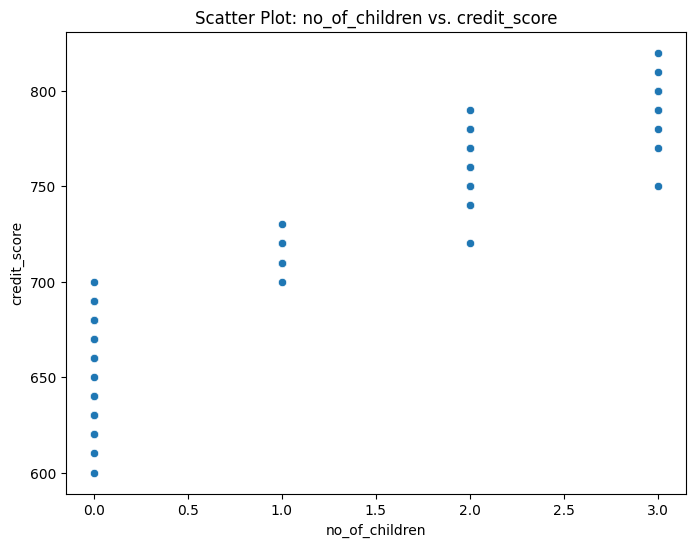

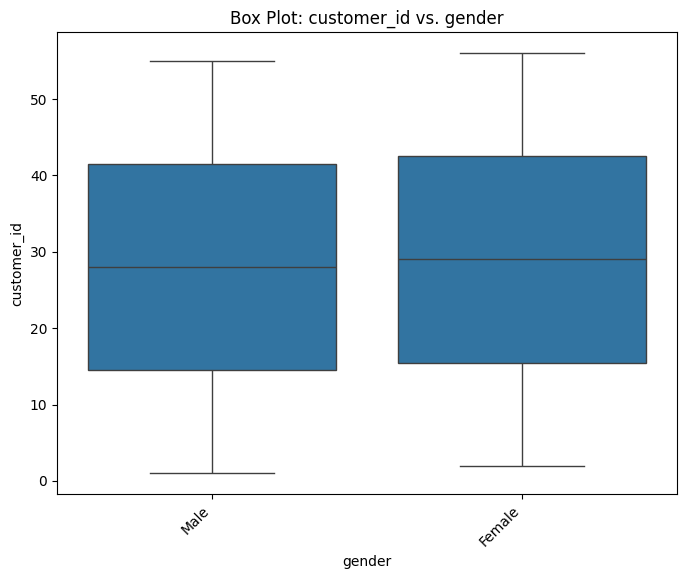

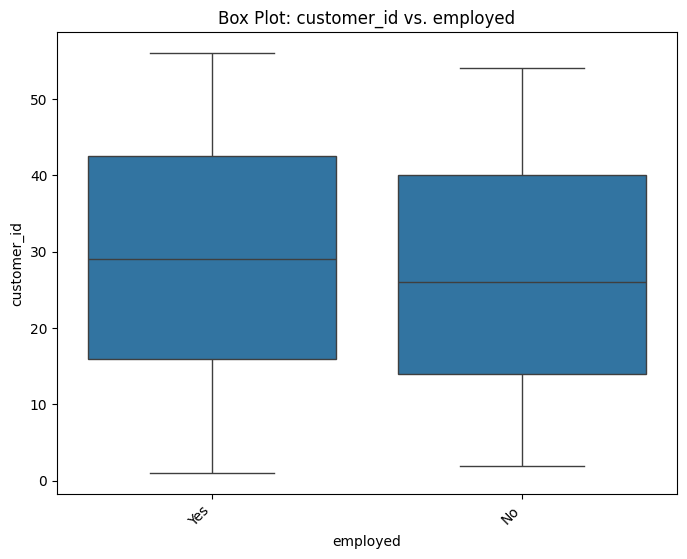

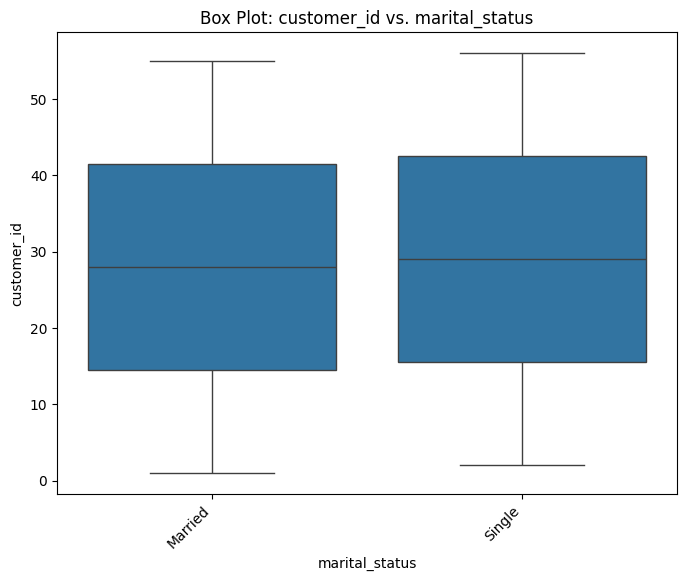

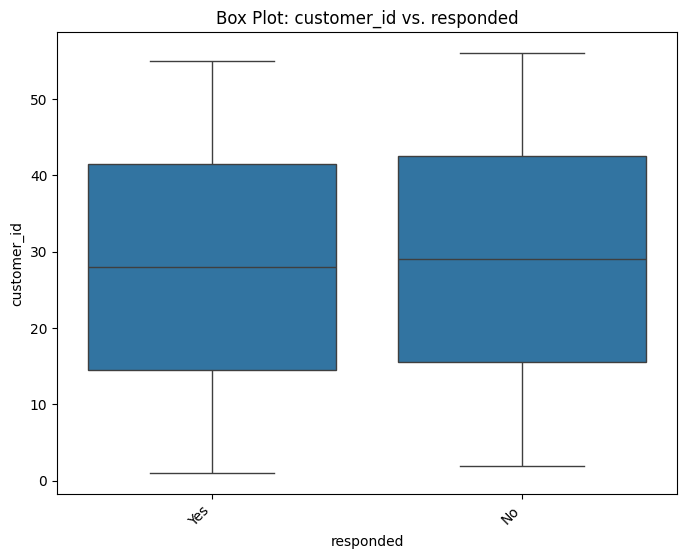

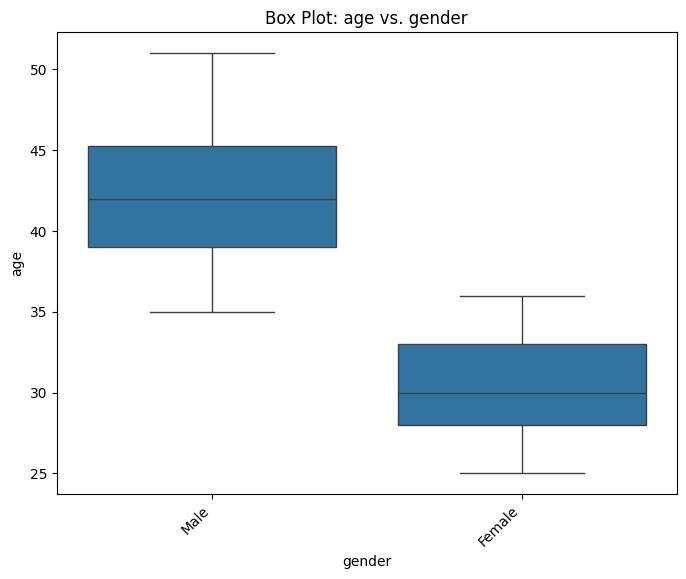

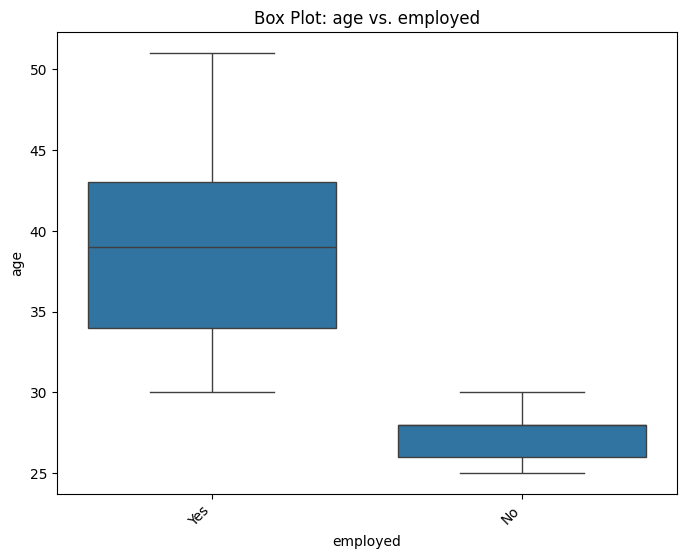

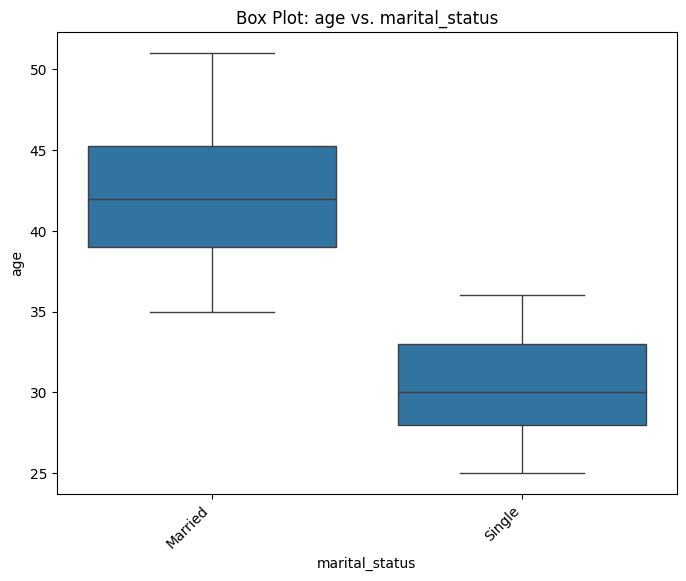

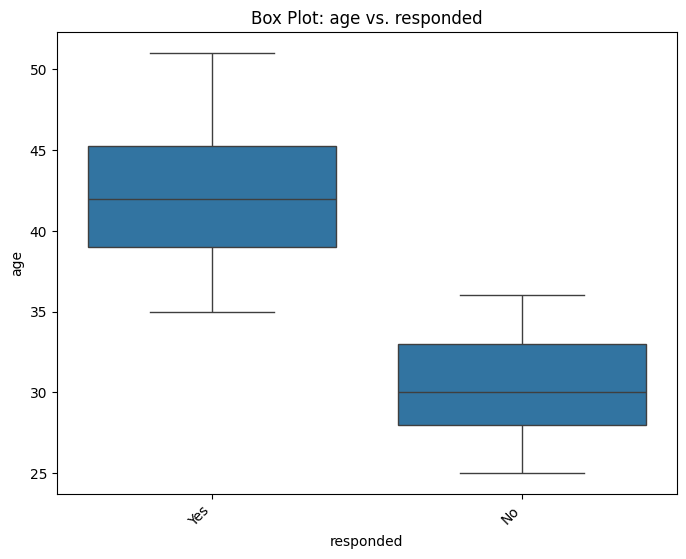

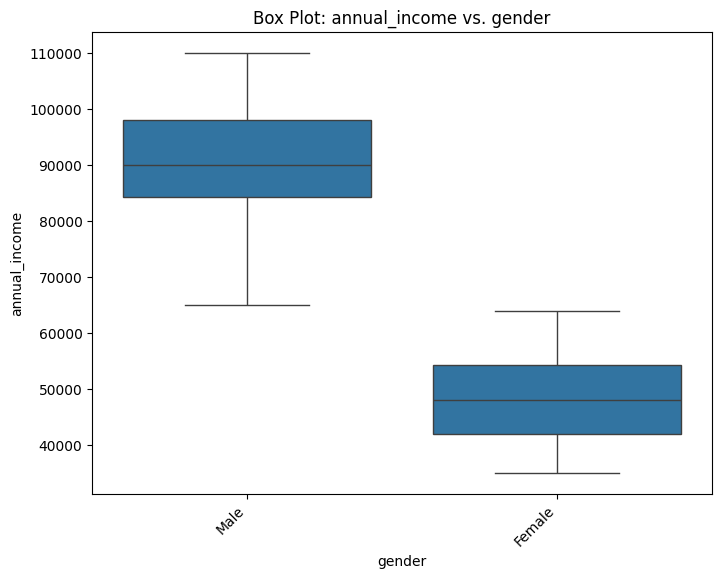

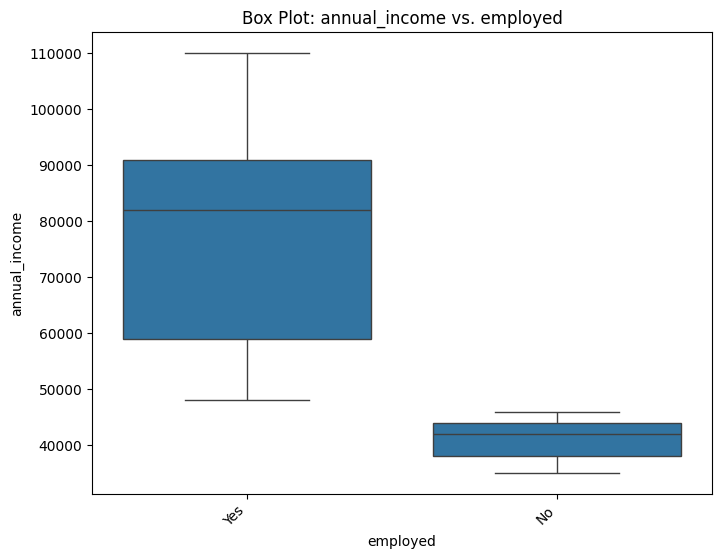

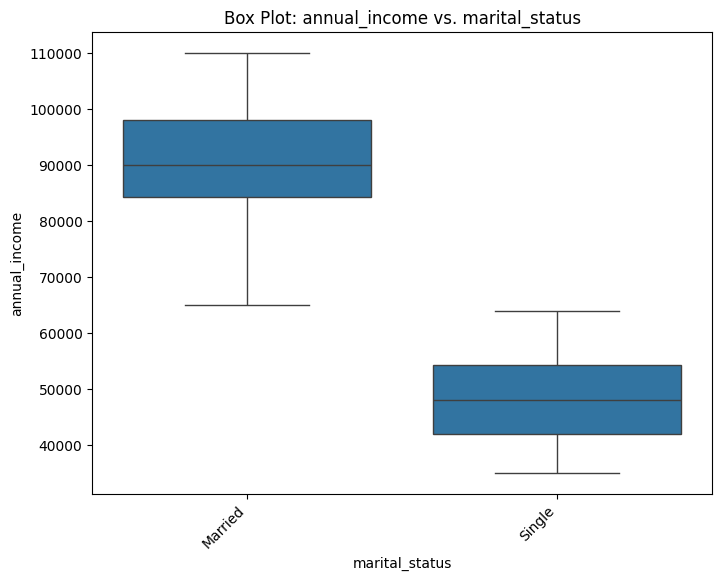

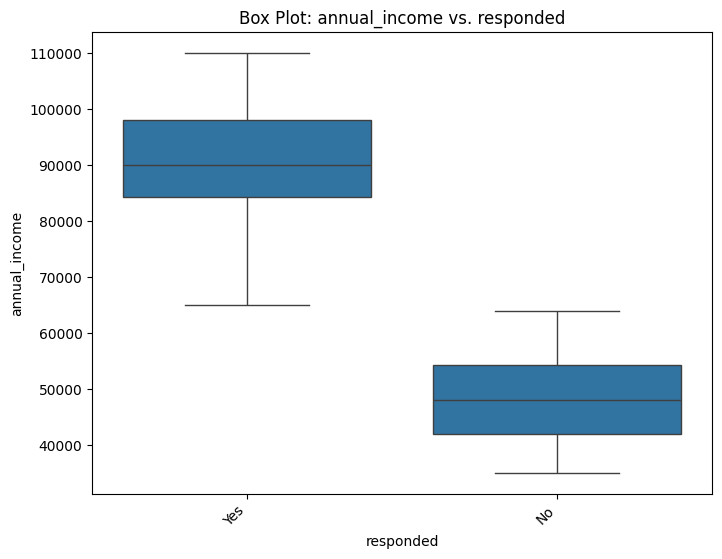

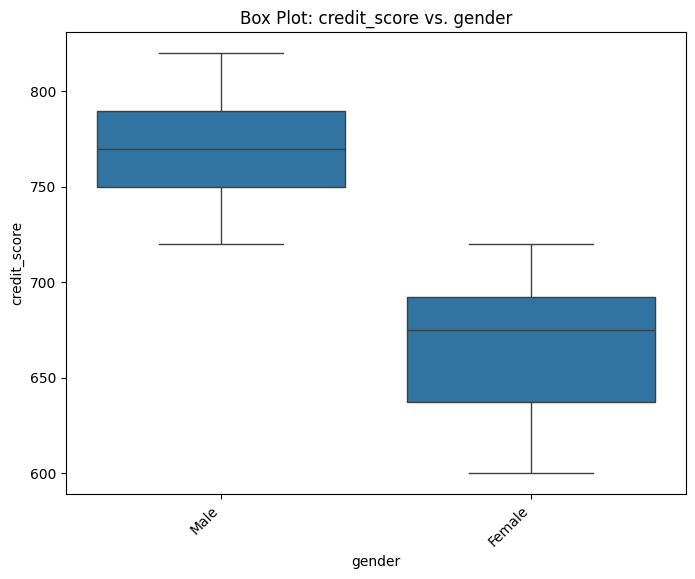

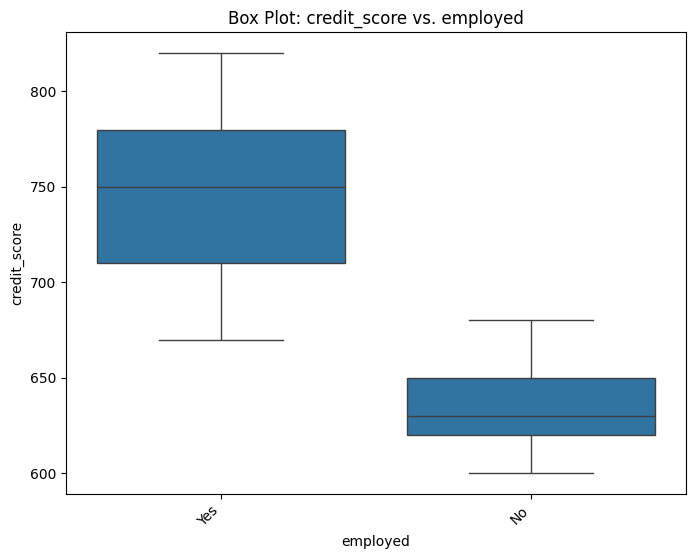

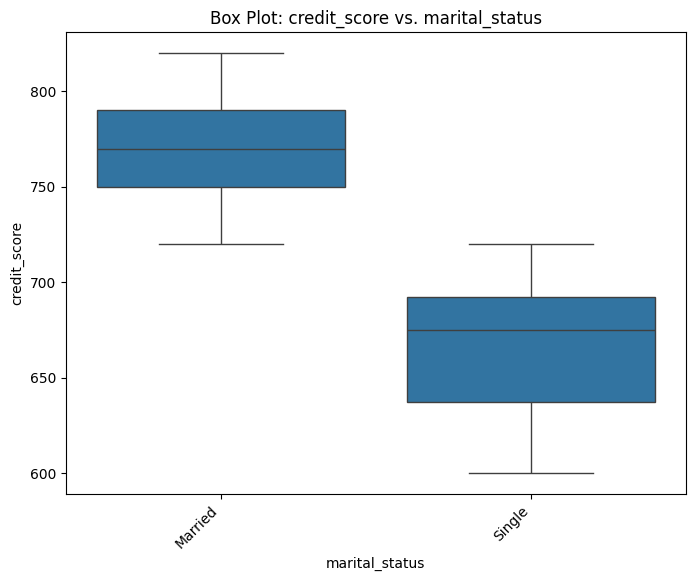

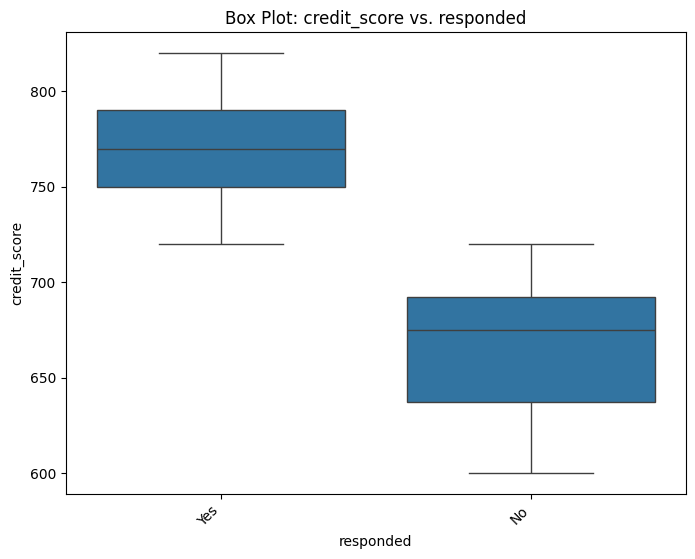

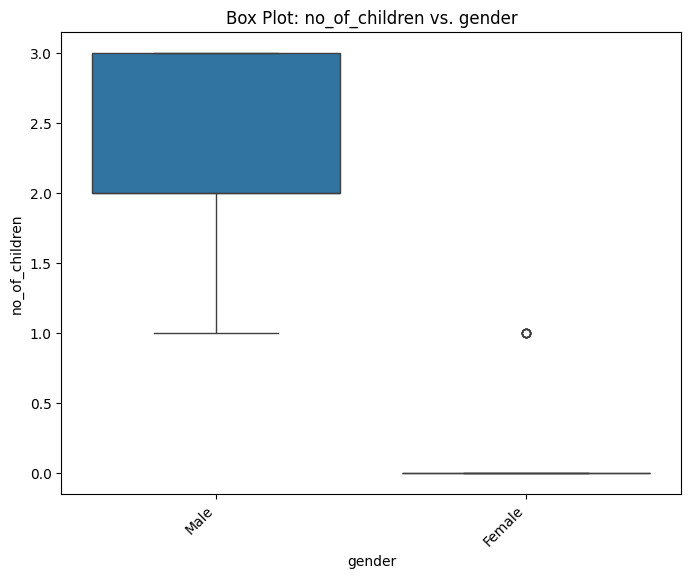

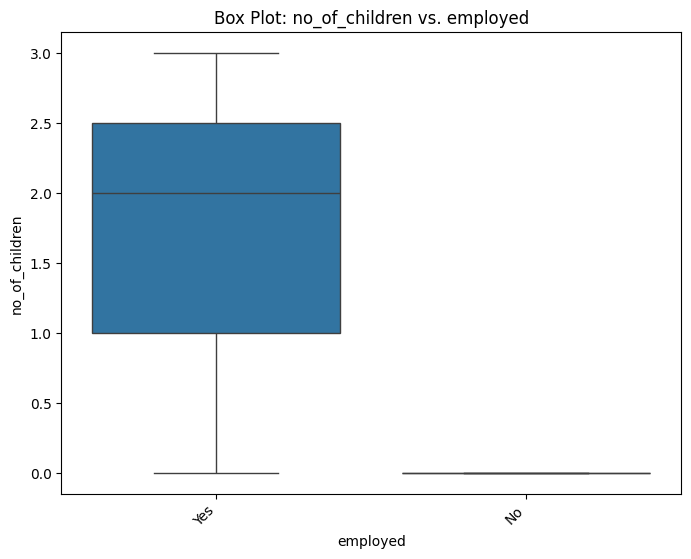

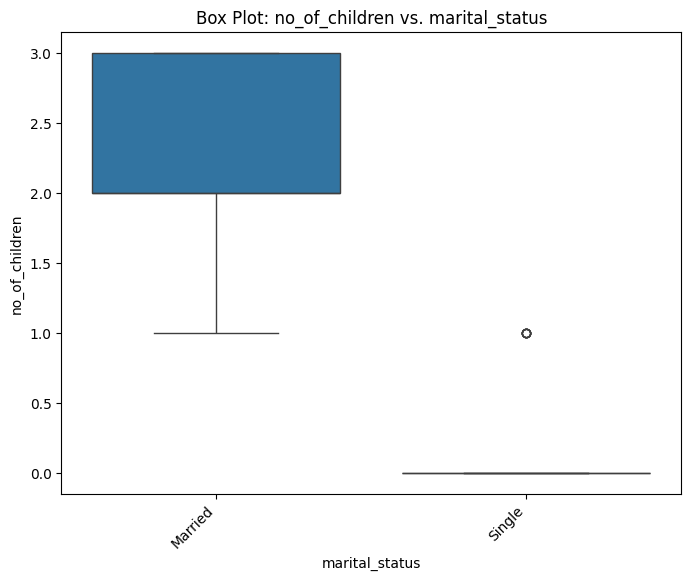

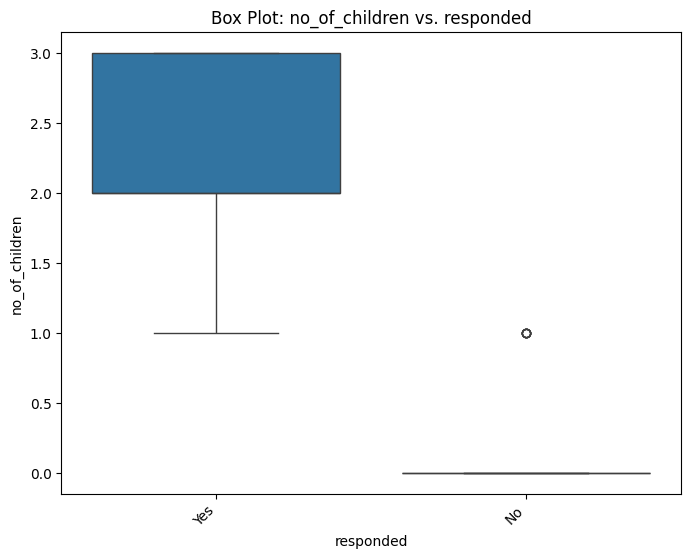

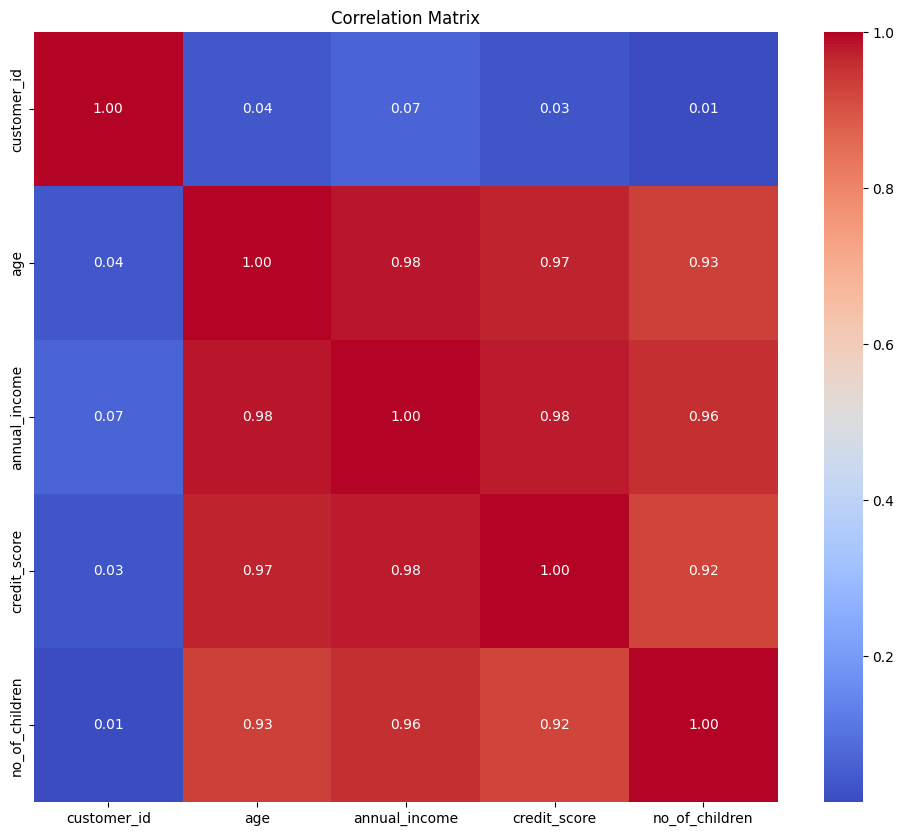

Chi-square test for gender vs. employed:
Chi-square statistic: 14.425760286225401
P-value: 0.00014579427353621712
--------------------
Chi-square test for gender vs. marital_status:
Chi-square statistic: 52.07142857142857
P-value: 5.351799658568329e-13
--------------------
Chi-square test for gender vs. responded:
Chi-square statistic: 52.07142857142857
P-value: 5.351799658568329e-13
--------------------
Chi-square test for employed vs. gender:
Chi-square statistic: 14.425760286225401
P-value: 0.00014579427353621712
--------------------
Chi-square test for employed vs. marital_status:
Chi-square statistic: 14.425760286225401
P-value: 0.00014579427353621712
--------------------
Chi-square test for employed vs. responded:
Chi-square statistic: 14.425760286225401
P-value: 0.00014579427353621712
--------------------
Chi-square test for marital_status vs. gender:
Chi-square statistic: 52.07142857142857
P-value: 5.351799658568329e-13
--------------------
Chi-square test for marital_status vs

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Assuming your CSV file is named "campaign_responses.csv"
df = pd.read_csv("campaign_responses.csv")

# Exploratory Data Analysis (EDA)

# 1. Data Overview:
print(df.info())  # Check data types and missing values
print(df.describe())  # Summary statistics for numerical columns

# 2. Handling Missing Values
missing_data = df.isnull().sum()
print("Missing data:\n", missing_data)

# Example of handling missing values (choose a suitable approach based on your data):
# df.fillna(df.mean(), inplace=True)  # Fill with mean
# df.fillna(0, inplace=True)  # Fill with 0

# 3. Outlier Detection
def detect_outliers_iqr(data):
  """Detects outliers using the Interquartile Range (IQR) method."""
  Q1 = np.percentile(data, 25)
  Q3 = np.percentile(data, 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = [x for x in data if x < lower_bound or x > upper_bound]
  return outliers

numerical_df = df.select_dtypes(include=['number'])
for column in numerical_df.columns:
  outliers = detect_outliers_iqr(numerical_df[column])
  if outliers:
    print(f"Outliers detected in {column}: {outliers}")

# 4. Univariate Analysis
# a) Numerical Features
for column in numerical_df.columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(df[column], kde=True)
  plt.title(f"Distribution of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()
  print(f"Descriptive statistics for {column}:\n{df[column].describe()}\n")

# b) Categorical Features
for column in df.select_dtypes(include=['object']).columns:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=df[column])
  plt.title(f"Count of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.xticks(rotation=45, ha='right')
  plt.show()
  print(f"Value counts for {column}:\n{df[column].value_counts()}\n")

# 5. Bivariate Analysis: Exploring Relationships

# a) Numerical vs. Numerical: Scatter plots
for column1 in numerical_df.columns:
  for column2 in numerical_df.columns:
    if column1 != column2:
      plt.figure(figsize=(8, 6))
      sns.scatterplot(x=df[column1], y=df[column2])
      plt.title(f"Scatter Plot: {column1} vs. {column2}")
      plt.xlabel(column1)
      plt.ylabel(column2)
      plt.show()

# b) Numerical vs. Categorical: Box plots
for numerical_column in numerical_df.columns:
  for categorical_column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[categorical_column], y=df[numerical_column])
    plt.title(f"Box Plot: {numerical_column} vs. {categorical_column}")
    plt.xlabel(categorical_column)
    plt.ylabel(numerical_column)
    plt.xticks(rotation=45, ha='right')
    plt.show()


# c) Correlation Matrix
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# d) Categorical vs. Categorical: Chi-square test
for column1 in df.select_dtypes(include=['object']).columns:
  for column2 in df.select_dtypes(include=['object']).columns:
    if column1 != column2:
      contingency_table = pd.crosstab(df[column1], df[column2])
      chi2, p, _, _ = chi2_contingency(contingency_table)
      print(f"Chi-square test for {column1} vs. {column2}:")
      print(f"Chi-square statistic: {chi2}")
      print(f"P-value: {p}")
      print("-" * 20)

1. Exploratory Data Analysis (EDA)

 We do this to gain a general understanding of t
 data's structure, patterns, and potential issues.
It helps us identify areas for further investigation and choose appropriate analysis techniques.

2. Outlier Detection

 We identify outliers because they can distort statistical results and affect model performance.
Outlier detection allows us to decide how to handle these unusual data points (e.g., removal, transformation).

3. Missing Data Analysis

 We analyze missing data because it can introduce bias and reduce the accuracy of our analysis.
Understanding the extent and pattern of missing data helps us choose appropriate imputation strategies.

4. Visualizing Outliers (Box Plots or Statistical Techniques)

 Visualizations like box plots help us see the distribution of data and identify potential outliers.
Statistical techniques provide a quantitative way to detect outliers based on thresholds (e.g., IQR method).

5. Univariate, Bivariate, and Multivariate Analysis

 Univariate analysis explores individual variables to understand their distributions and characteristics.

 Bivariate analysis investigates relationships between pairs of variables,

 while multivariate analysis examines relationships among multiple variables.
These analyses help uncover patterns, correlations, and dependencies within the data, guiding further investigation and decision-making.




**1. Data Inspection and Summary:**

* `df.info()`:  Provides information about the data types of each column and the number of non-null values. This helps understand the structure of your dataset and identify potential issues like missing values or incorrect data types.
* `df.describe()`: Shows descriptive statistics (like mean, standard deviation, quartiles) for numerical columns. This gives a quick overview of the distribution of numerical data, helps identify outliers, and provides a sense of the data's range.
* `df.isnull().sum()`: Counts the number of missing values in each column. This is crucial to understand the extent of missing data and make informed decisions about how to handle it.

**2. Exploring Categorical Columns:**

* `df[column].unique()`: Identifies the unique values within each categorical column. This helps understand the different categories present and potential issues with data consistency or spelling variations.

**3. Correlation Analysis:**

* `numerical_df.corr()`: Calculates the correlation matrix for numerical columns. Correlation measures the strength and direction of the linear relationship between two variables. Understanding correlations can help you identify potential predictor variables for a target variable or discover relationships between features.

**4. Outlier Detection:**

* `detect_outliers_iqr()`: Uses the interquartile range (IQR) method to detect outliers in numerical columns. Outliers can skew statistical analysis and machine learning models. Identifying and handling them properly is important for accurate analysis.

**5. Missing Value Handling (explained in the code comments):**

* Identifying and handling missing values is a critical step in data preprocessing.  Missing values can distort results, and choosing the correct approach (removing rows/columns, imputation) depends on the specific dataset and the goals of your analysis.

**6. Univariate Analysis:**

* **Histograms:** Visualize the distribution of individual numerical features. This allows you to see if the data is normally distributed, skewed, or has multiple peaks.
* **Descriptive Statistics:** Provide information about the central tendency (mean, median), dispersion (standard deviation, range), and overall shape of the distribution. This aids in detecting outliers, skewness, and gaining a deeper understanding of the variable's behavior.
* **Countplots for Categorical Features:** Show the frequency distribution of each category within categorical features. This helps analyze the proportion of each category and identify potential imbalances or dominant categories.


**7. Bivariate Analysis:**

* **Scatter Plots (Numerical vs. Numerical):**  Explore relationships between pairs of numerical features. This can reveal potential linear or non-linear associations and indicate the strength of the relationship.
* **Box Plots (Numerical vs. Categorical):** Compare the distributions of a numerical feature across different categories of a categorical feature. This can reveal how the numerical feature changes or varies depending on the categorical grouping.
* **Correlation Matrix and Heatmap:**  Visualize the correlation coefficients for all pairs of numerical features. This highlights which features have the strongest positive or negative relationships, providing valuable insight into potential dependencies between variables.
* **Chi-Square Test (Categorical vs. Categorical):** Tests the independence of two categorical features. This helps determine if there's a statistically significant relationship between the categories of two variables.

**In essence, the code walks through a standard EDA process:**

1. **Data Inspection:** Understanding the structure and content of the data.
2. **Missing Value Handling:** Identifying and addressing issues with missing data.
3. **Outlier Detection:** Identifying unusual data points.
4. **Univariate Analysis:** Examining the distribution of individual features.
5. **Bivariate Analysis:** Exploring relationships between pairs of features.

The goal of this EDA is to develop a deeper understanding of the dataset, reveal potential patterns, identify relevant features, and ultimately prepare the data for further analysis, modeling, or decision-making.


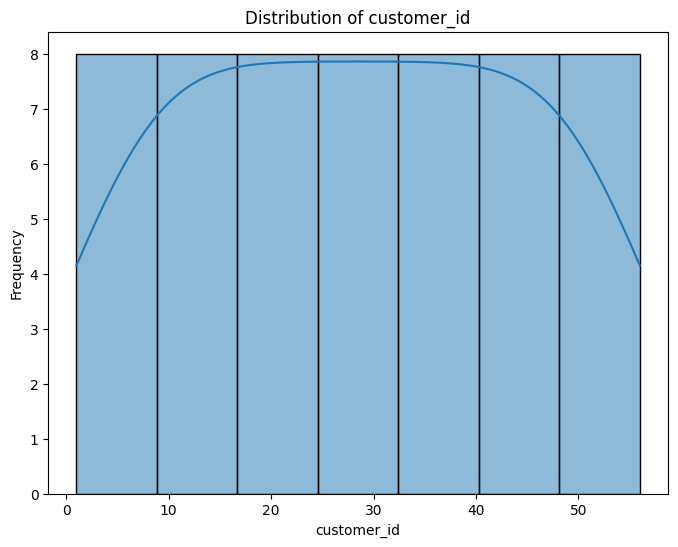

Descriptive statistics for customer_id:
count    56.000000
mean     28.500000
std      16.309506
min       1.000000
25%      14.750000
50%      28.500000
75%      42.250000
max      56.000000
Name: customer_id, dtype: float64



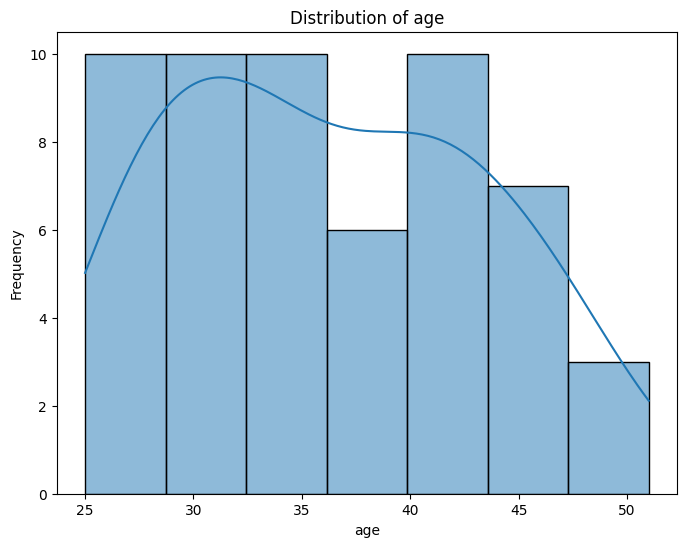

Descriptive statistics for age:
count    56.000000
mean     36.214286
std       7.088311
min      25.000000
25%      30.000000
50%      35.500000
75%      42.000000
max      51.000000
Name: age, dtype: float64



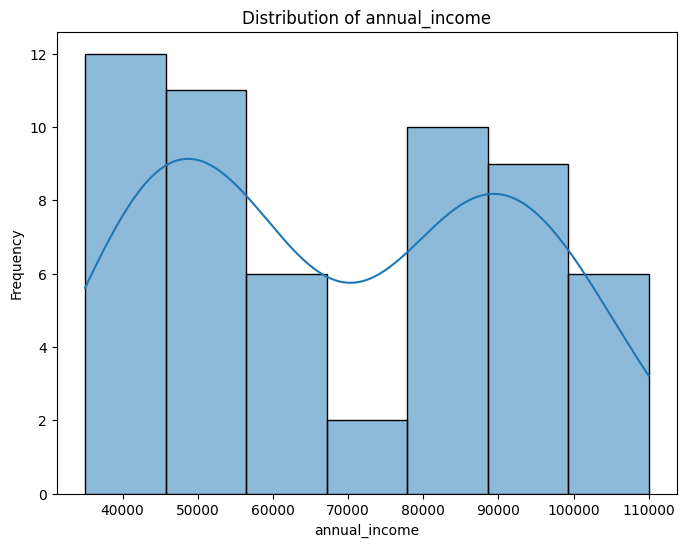

Descriptive statistics for annual_income:
count        56.000000
mean      69017.857143
std       22784.756524
min       35000.000000
25%       48000.000000
50%       64500.000000
75%       90000.000000
max      110000.000000
Name: annual_income, dtype: float64



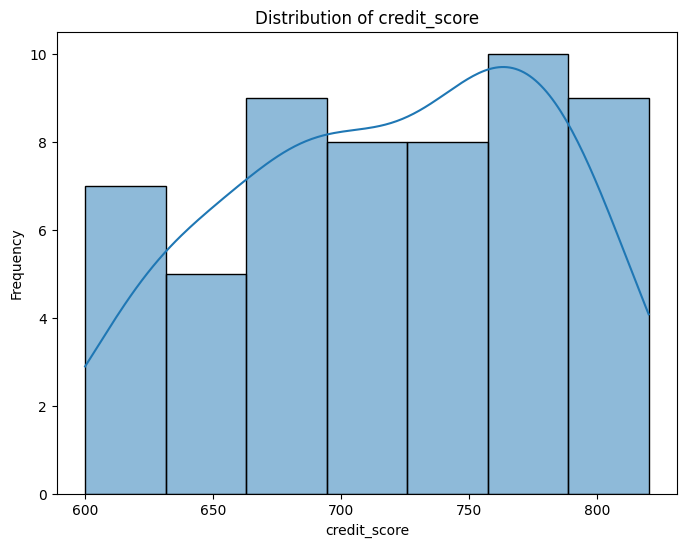

Descriptive statistics for credit_score:
count     56.000000
mean     719.107143
std       60.340753
min      600.000000
25%      677.500000
50%      720.000000
75%      770.000000
max      820.000000
Name: credit_score, dtype: float64



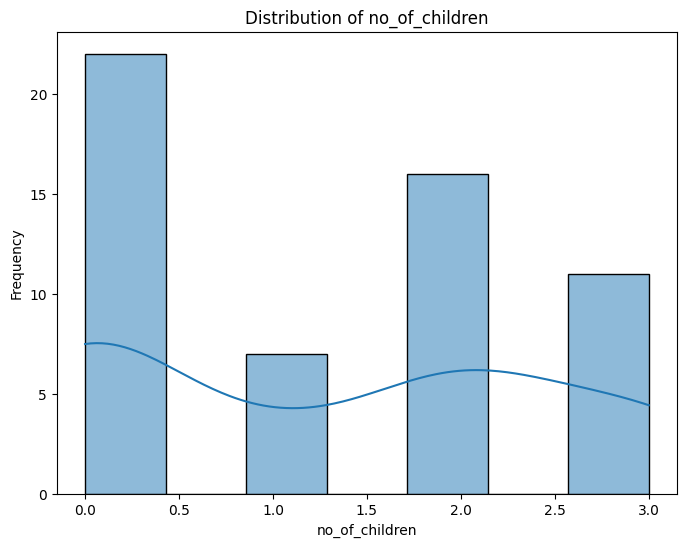

Descriptive statistics for no_of_children:
count    56.000000
mean      1.285714
std       1.186504
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: no_of_children, dtype: float64



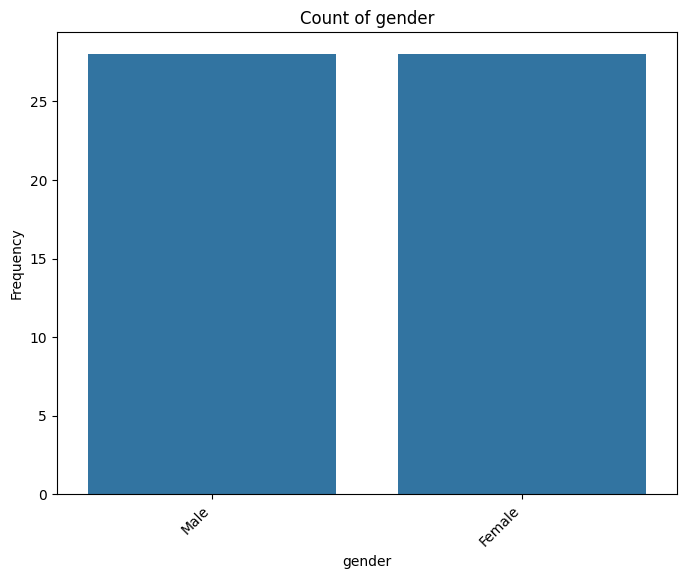

Value counts for gender:
gender
Male      28
Female    28
Name: count, dtype: int64



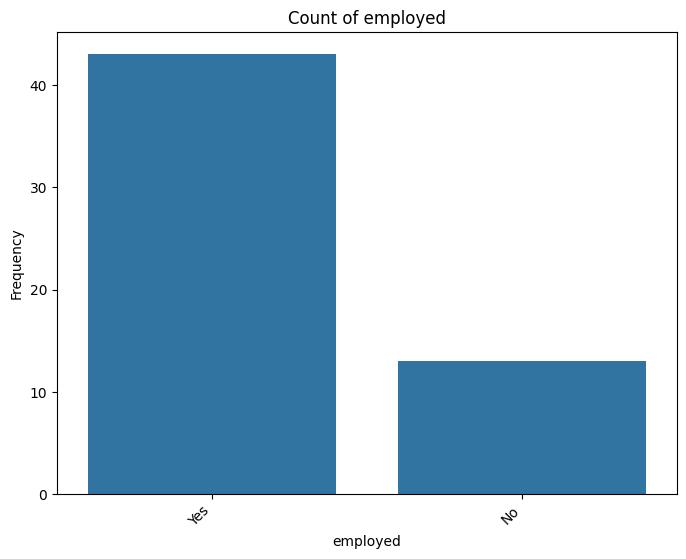

Value counts for employed:
employed
Yes    43
No     13
Name: count, dtype: int64



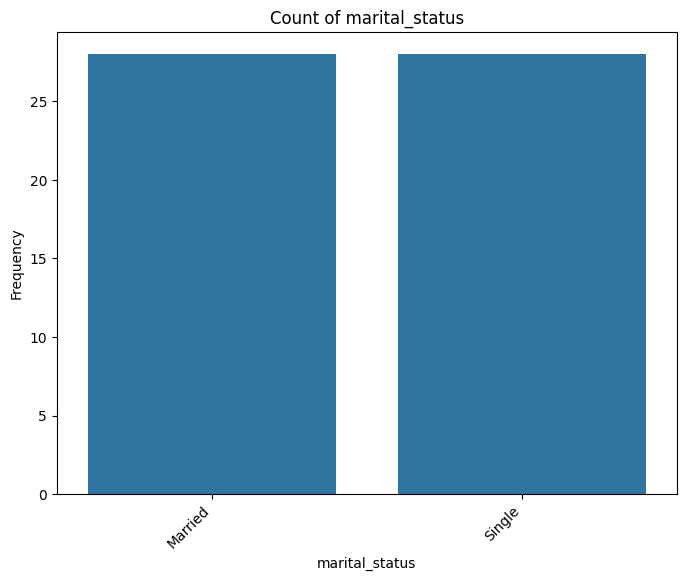

Value counts for marital_status:
marital_status
Married    28
Single     28
Name: count, dtype: int64



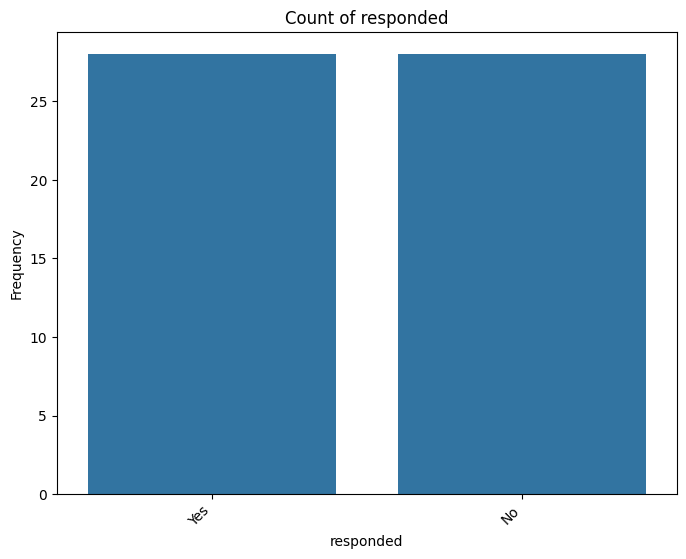

Value counts for responded:
responded
Yes    28
No     28
Name: count, dtype: int64



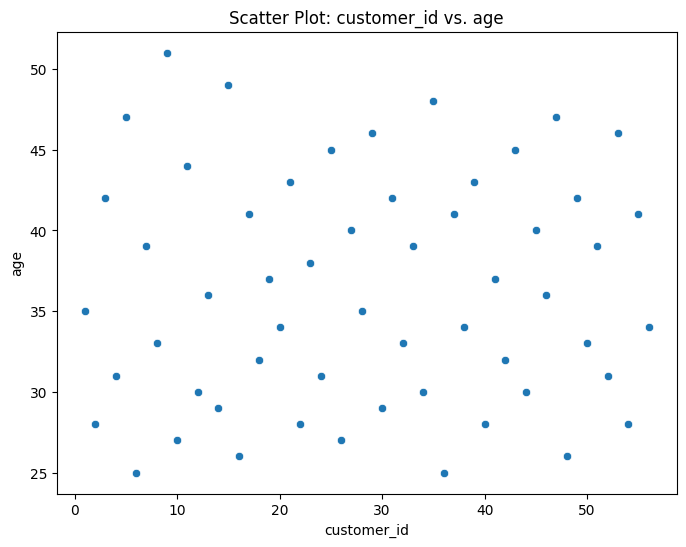

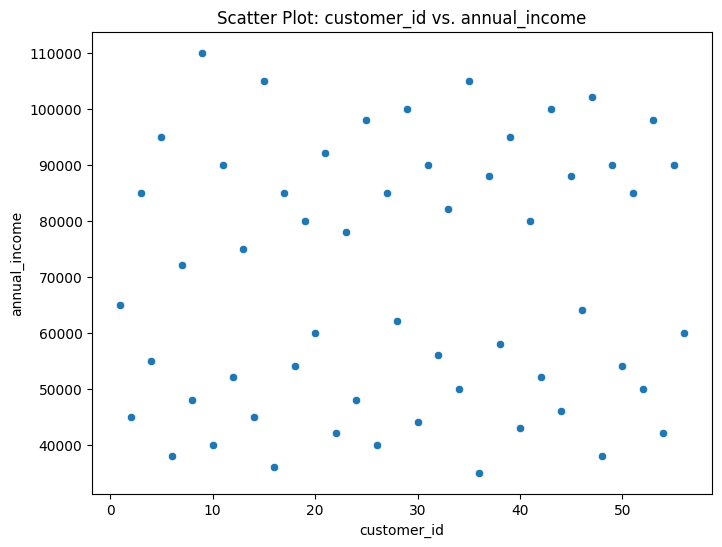

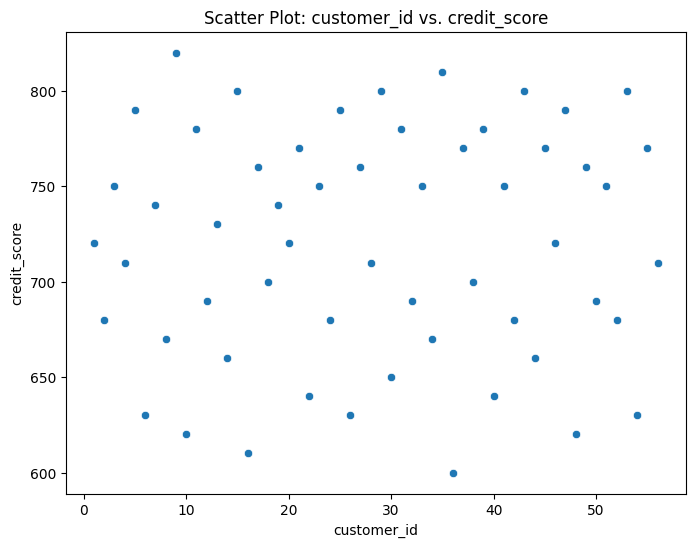

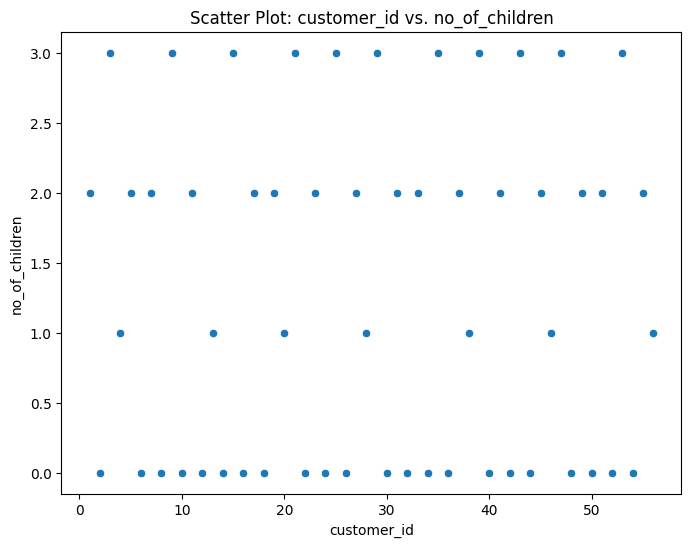

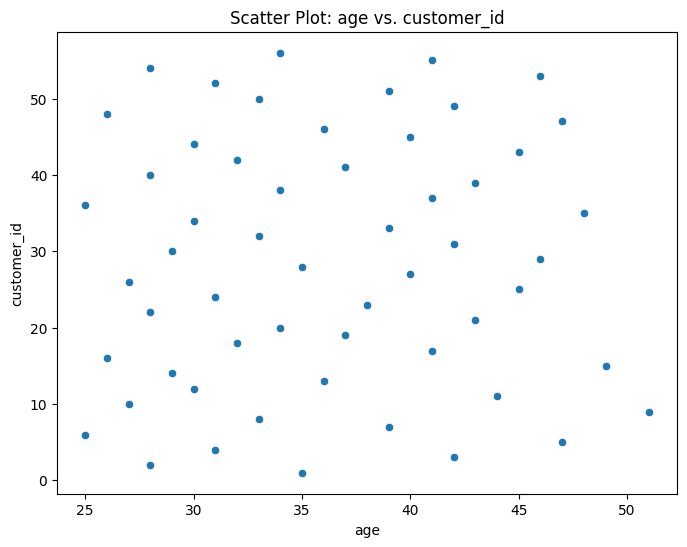

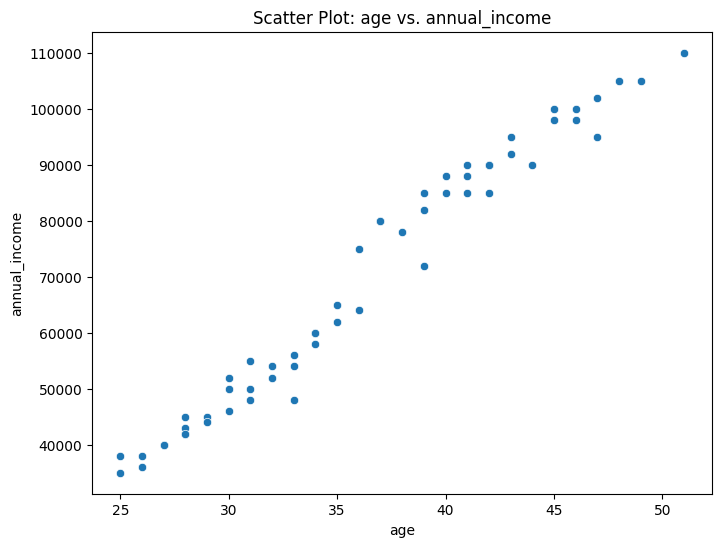

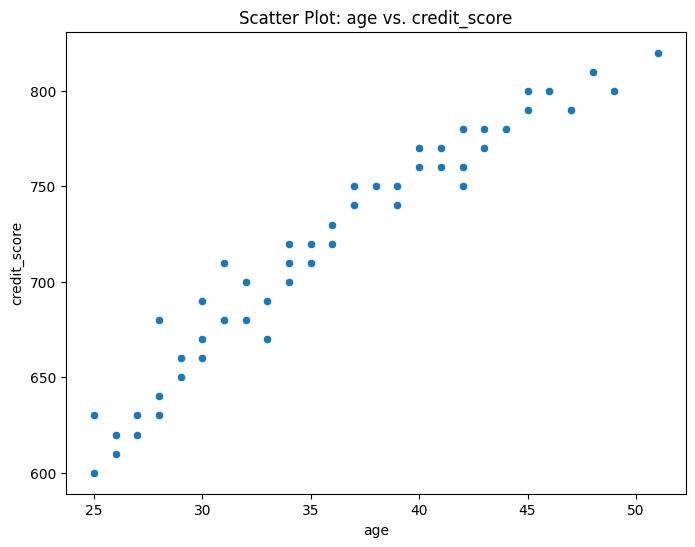

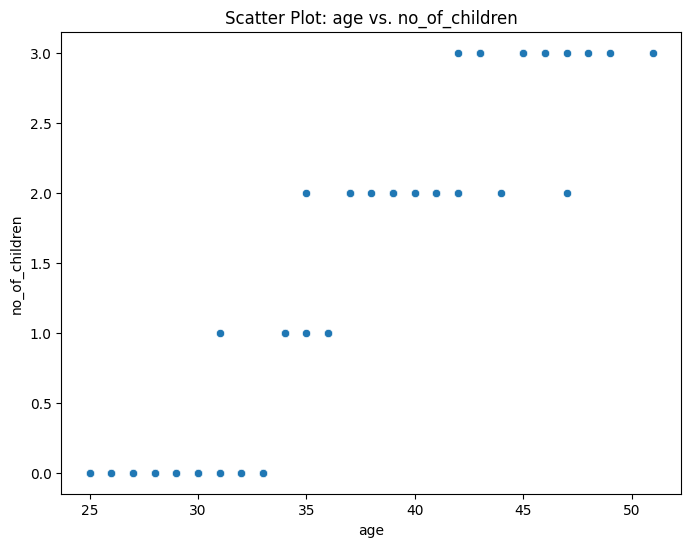

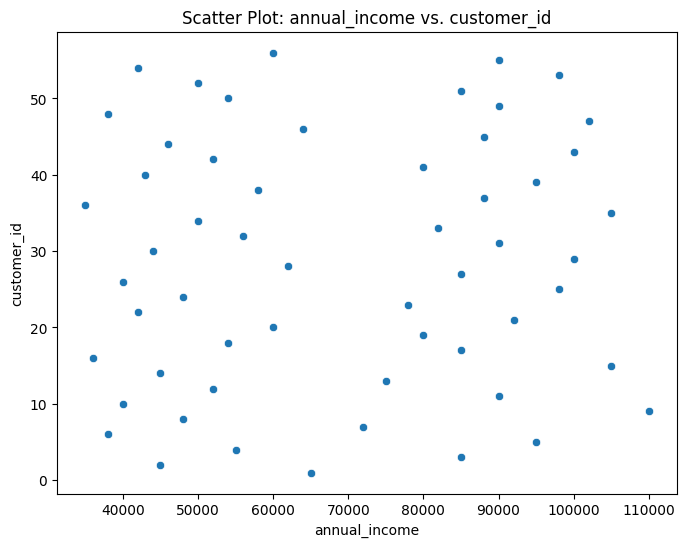

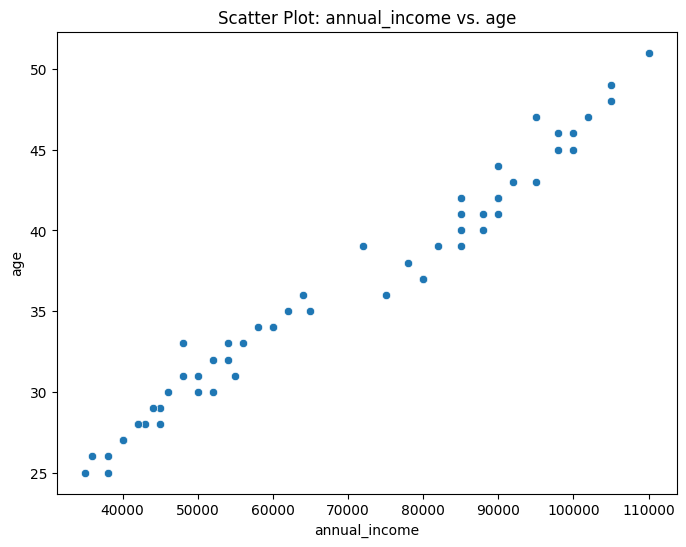

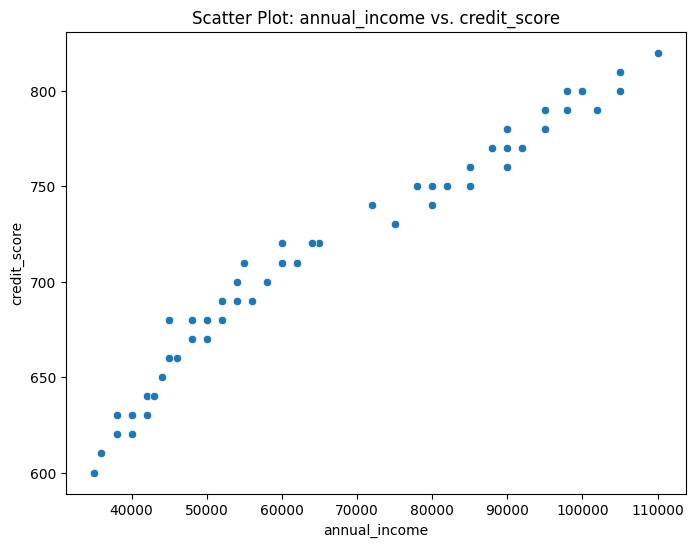

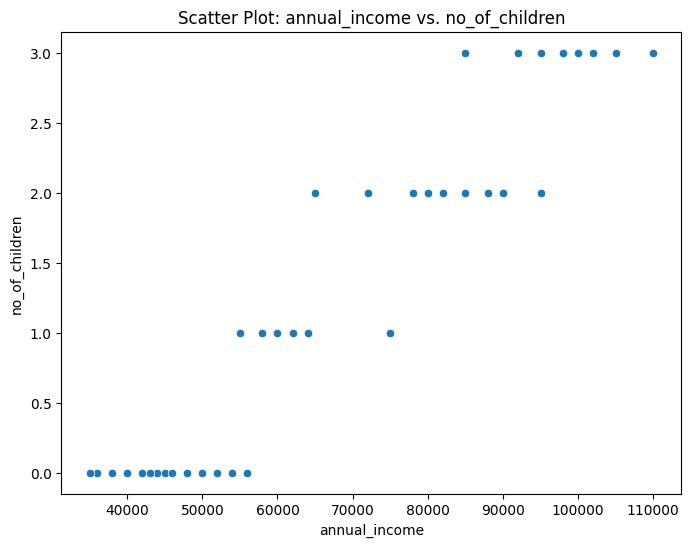

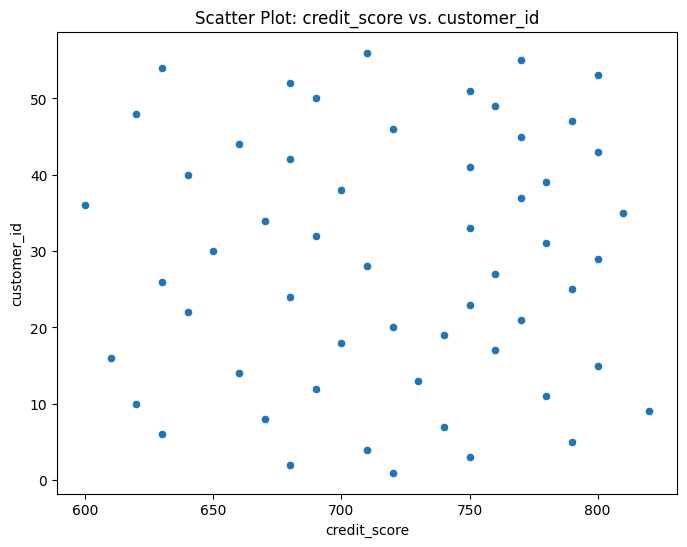

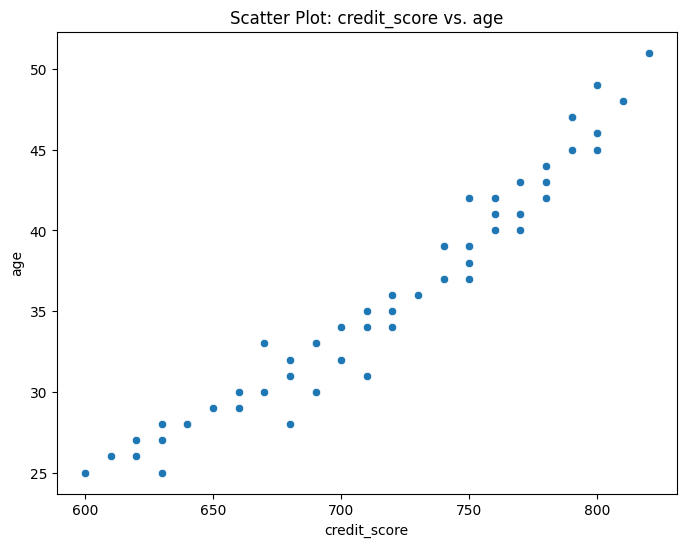

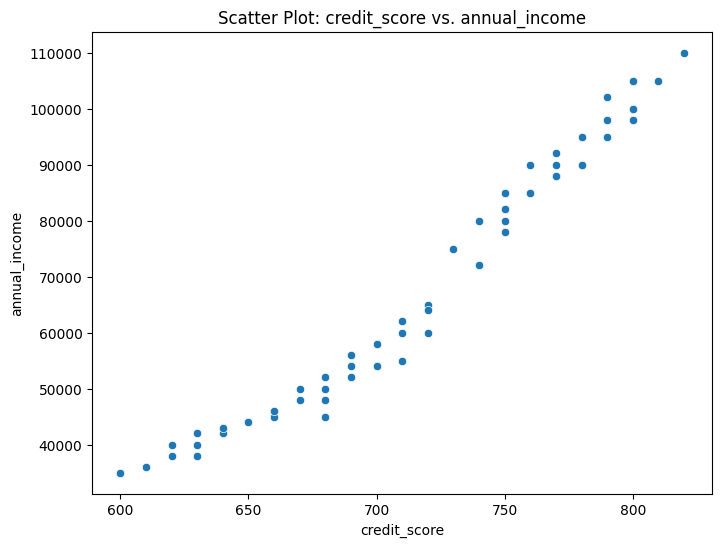

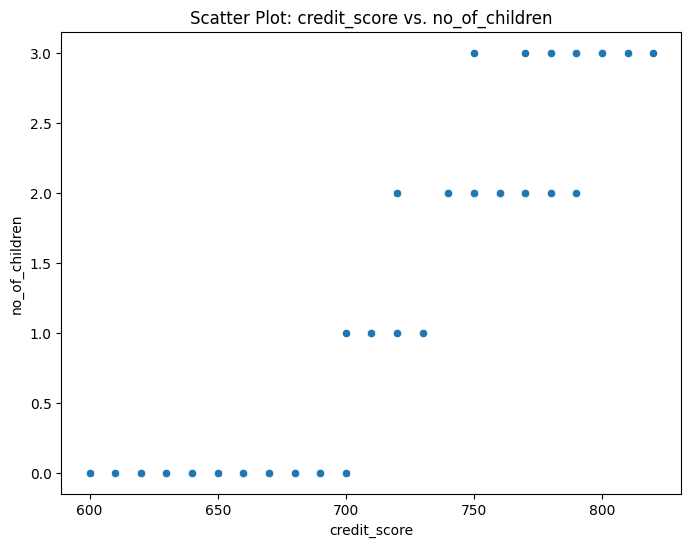

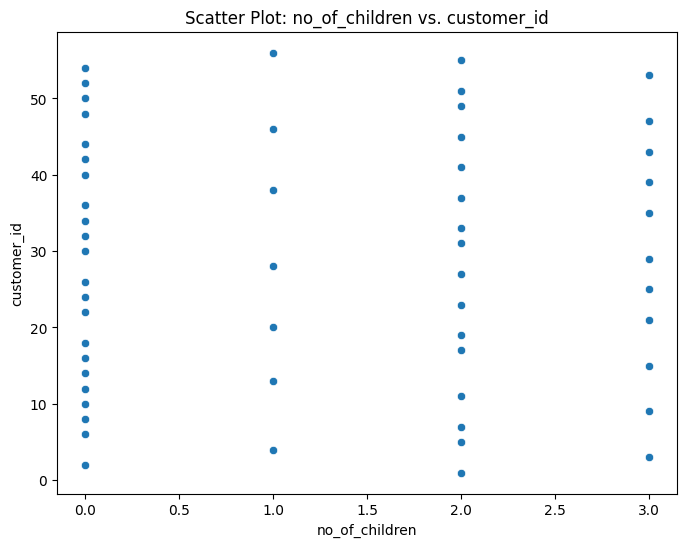

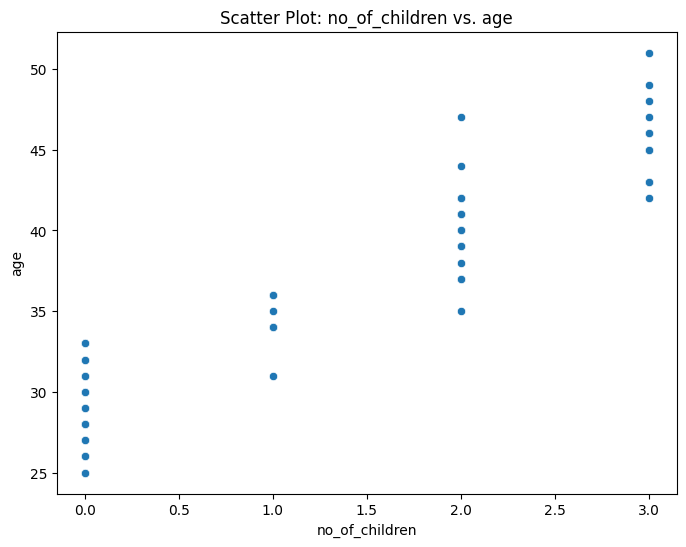

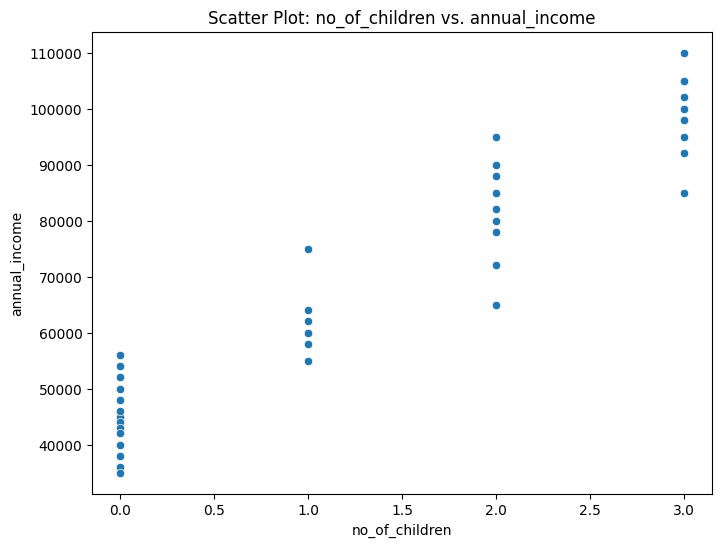

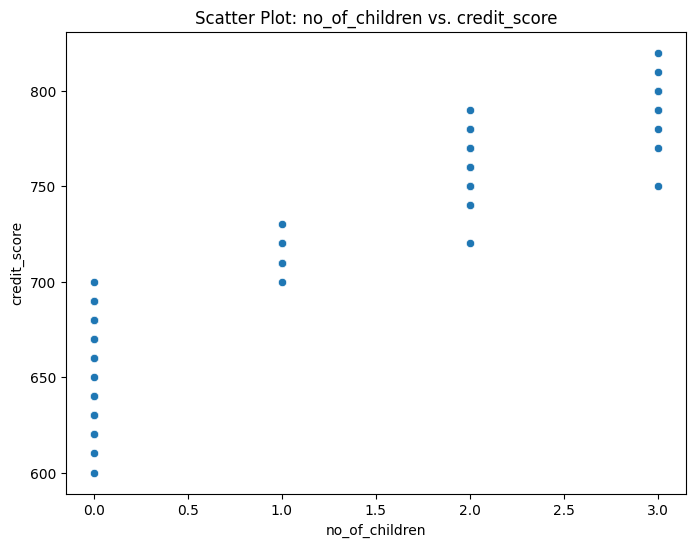

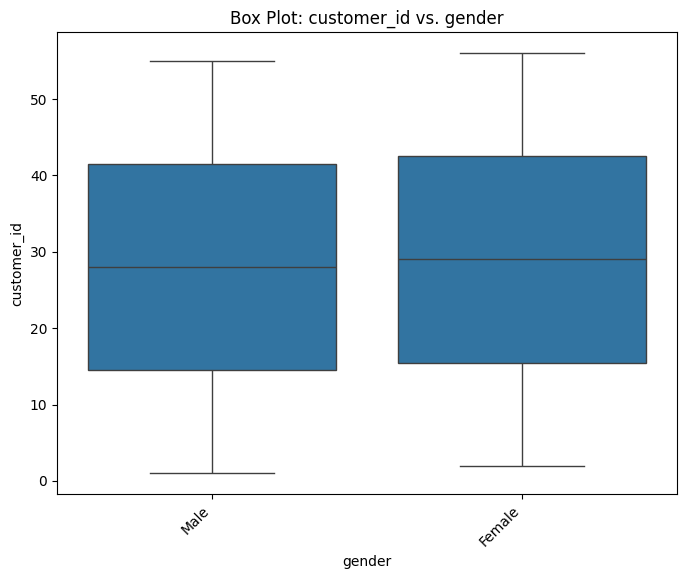

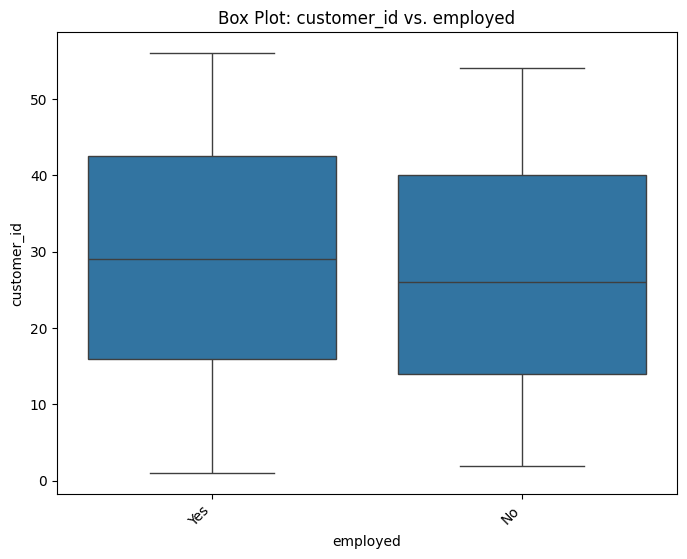

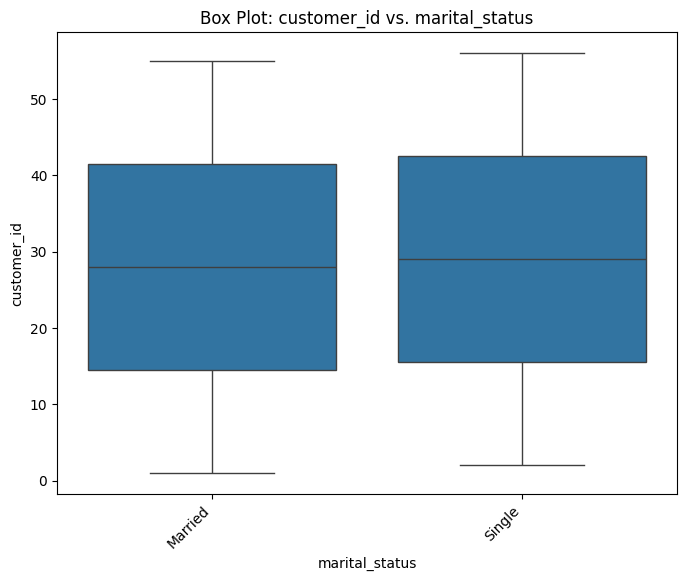

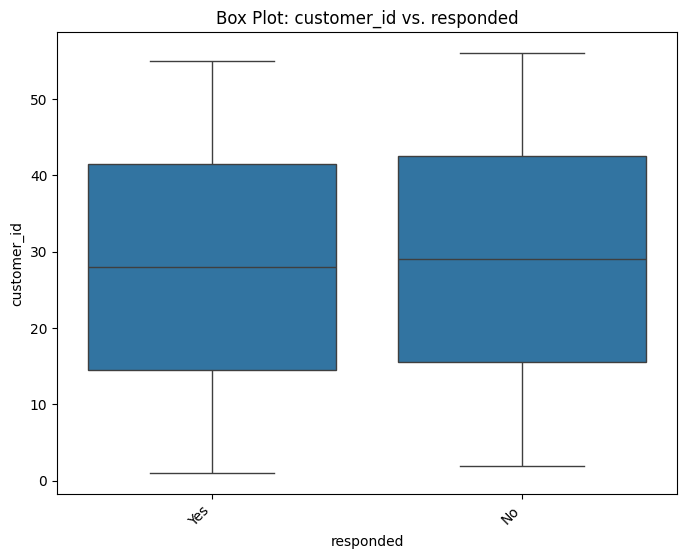

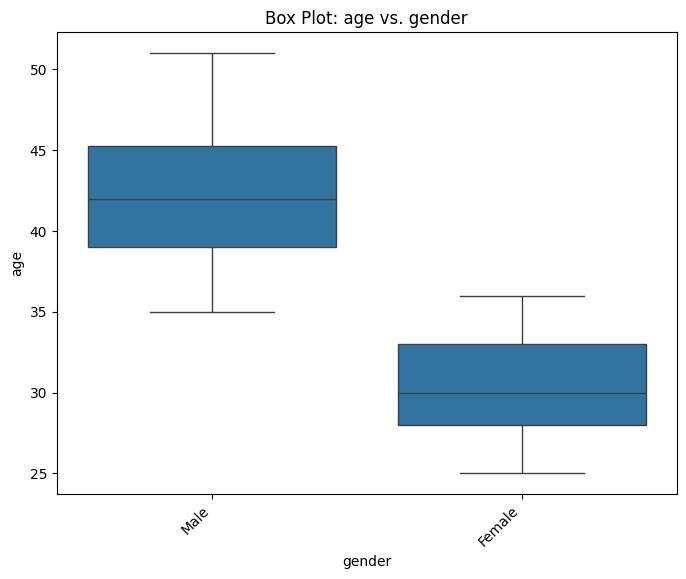

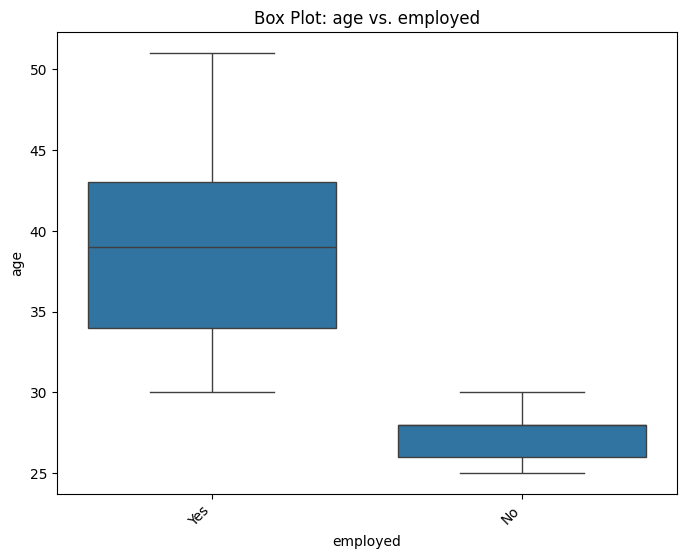

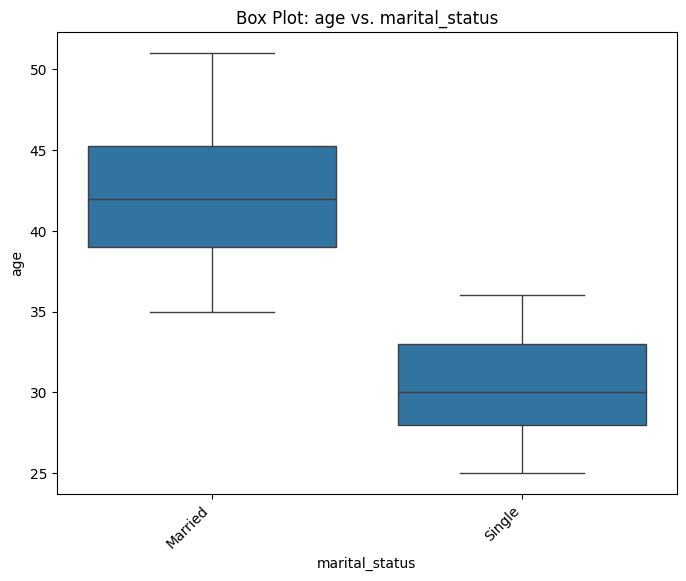

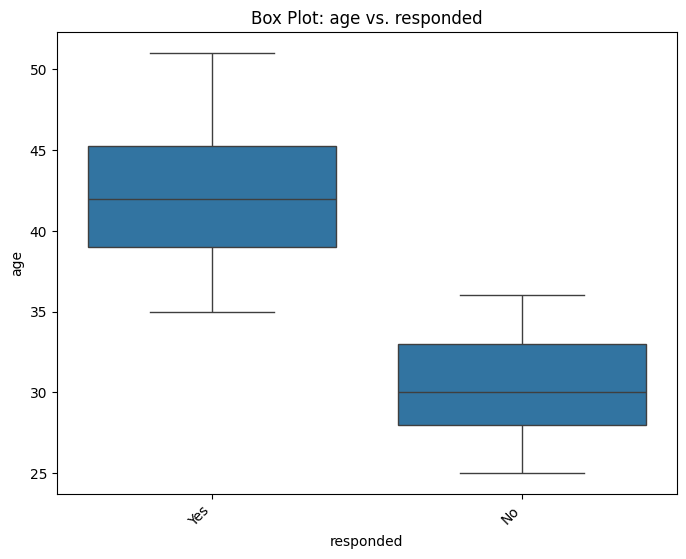

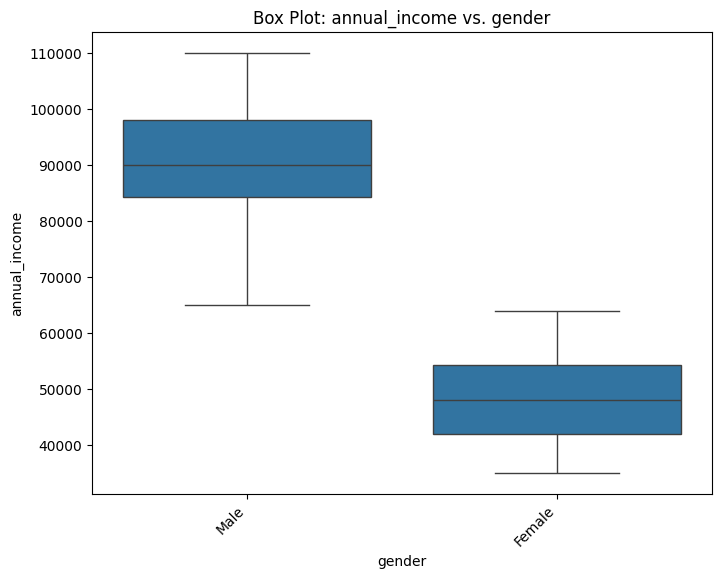

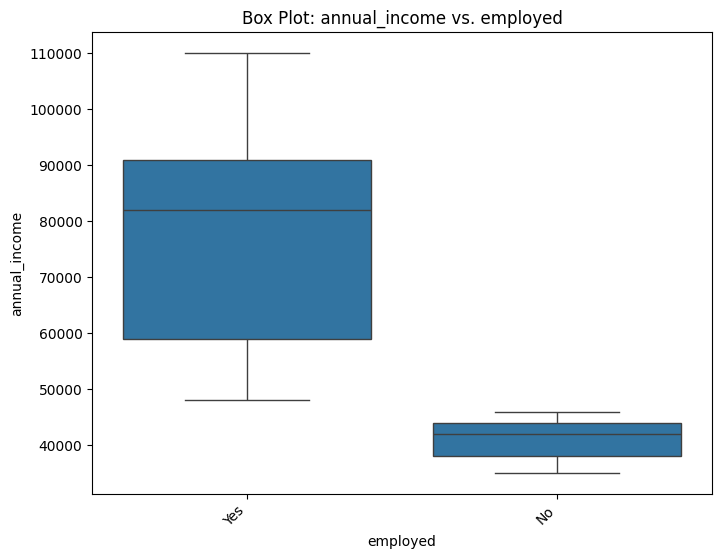

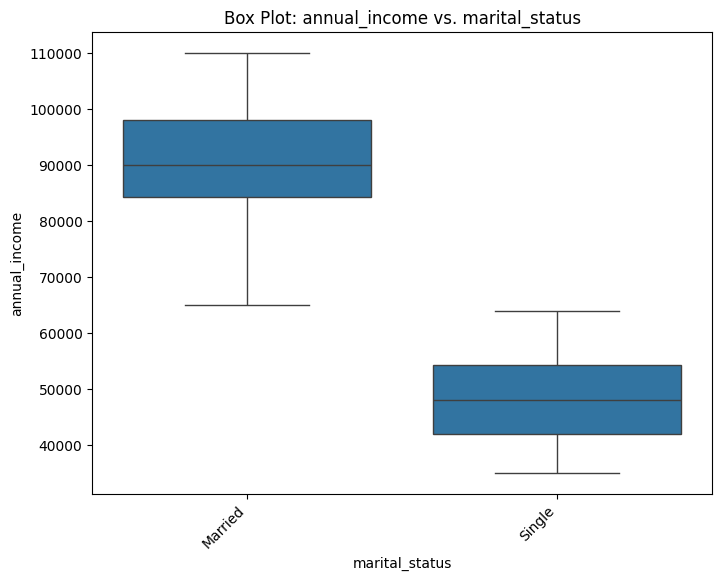

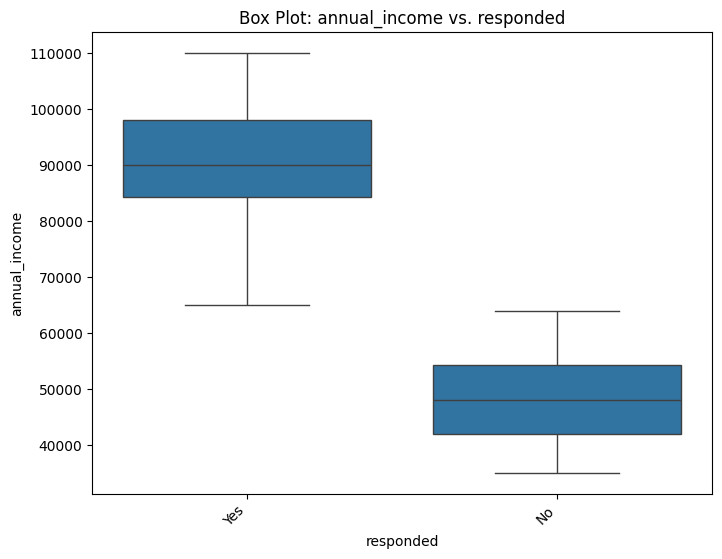

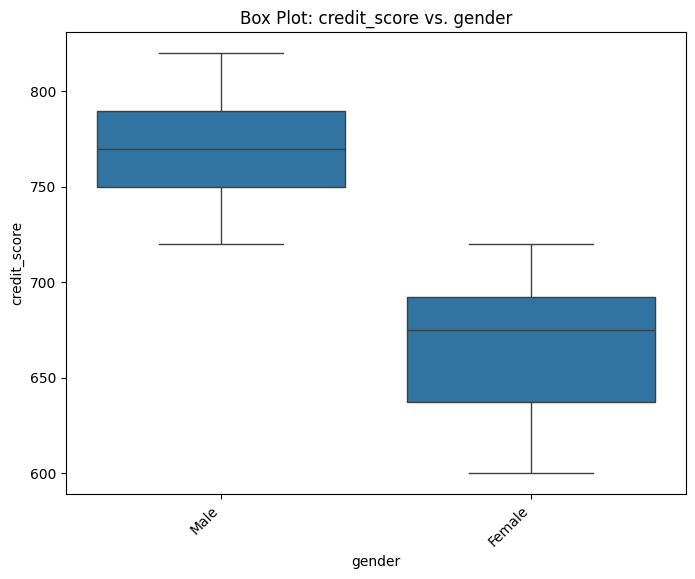

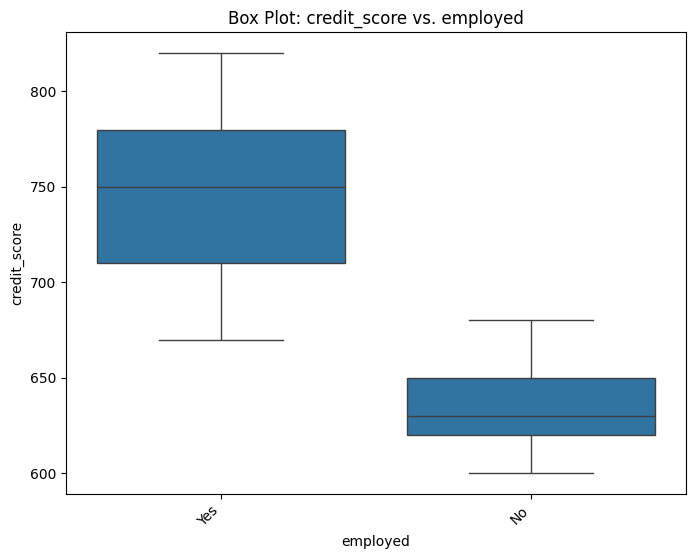

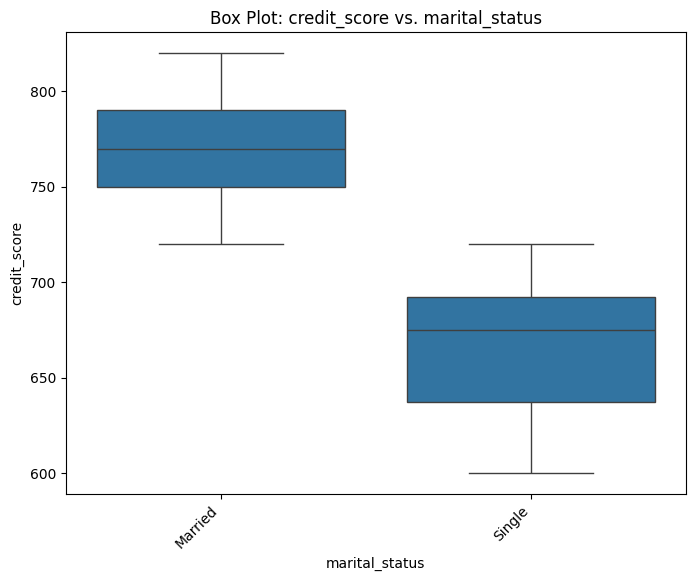

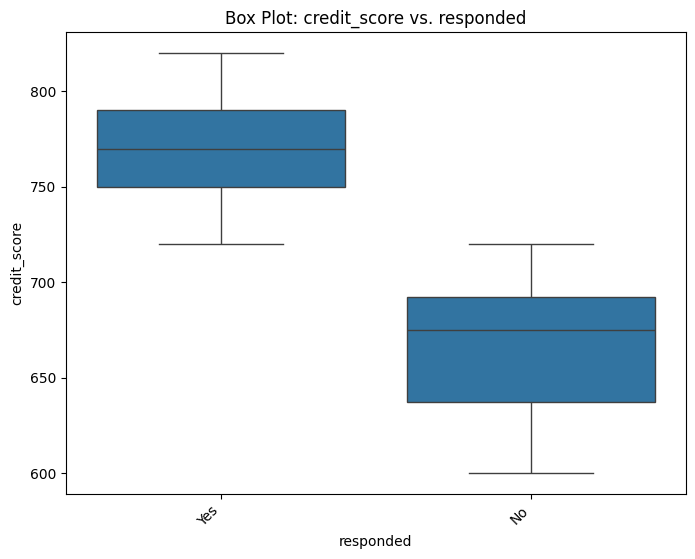

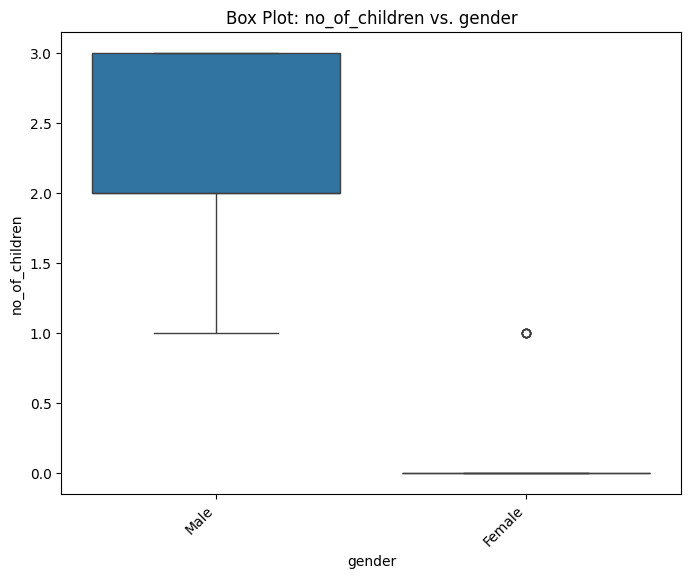

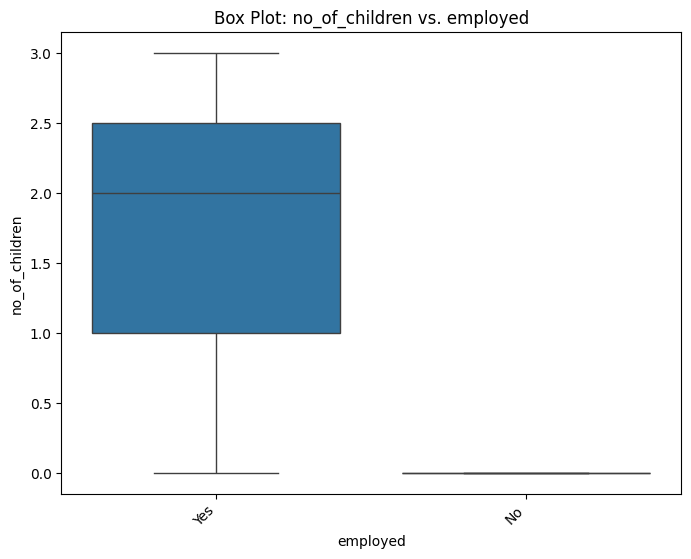

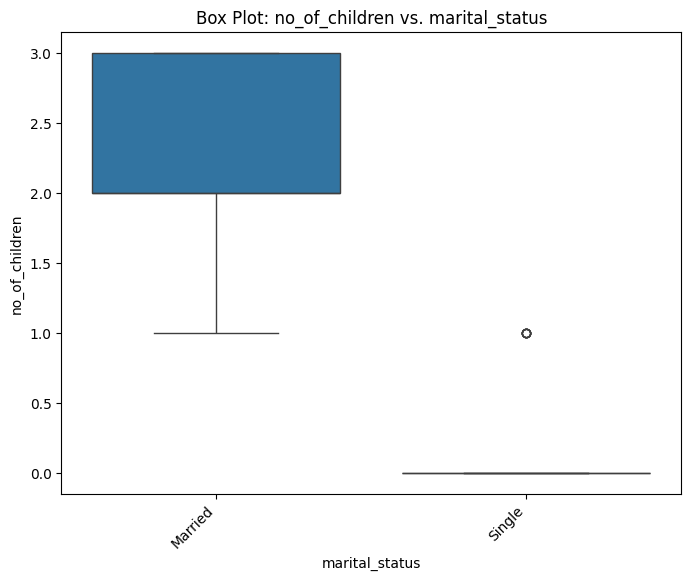

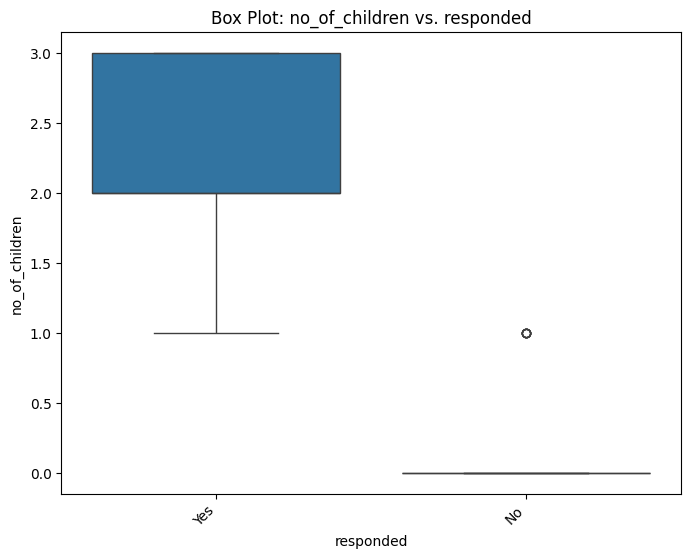

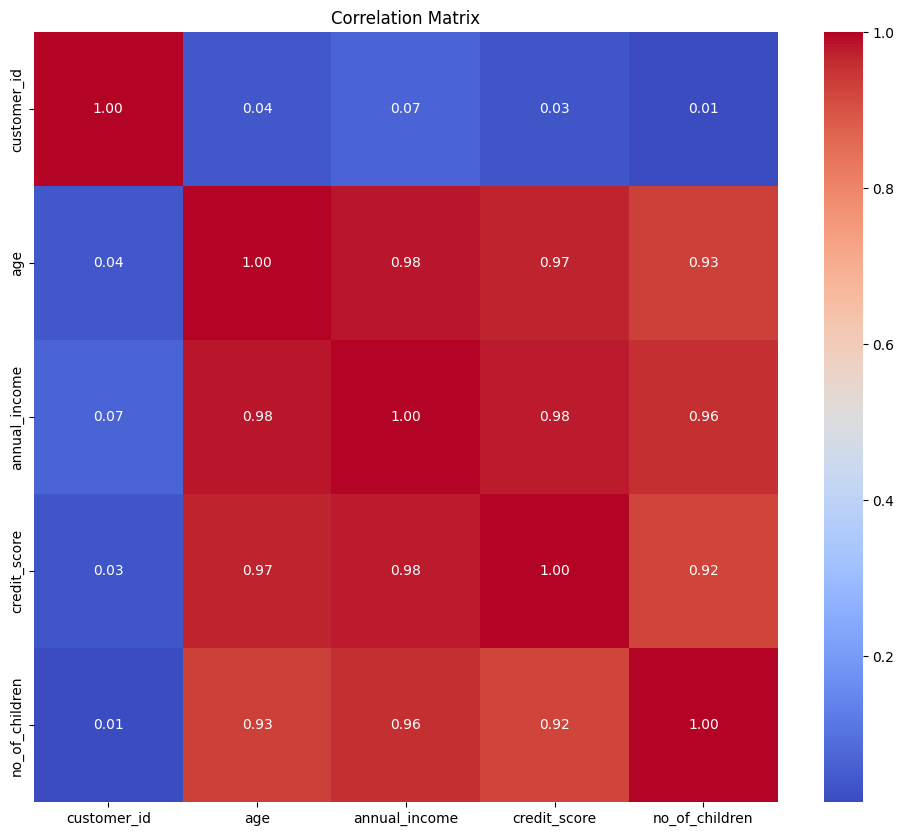

Chi-square test for gender vs. employed:
Chi-square statistic: 14.425760286225401
P-value: 0.00014579427353621712
--------------------
Chi-square test for gender vs. marital_status:
Chi-square statistic: 52.07142857142857
P-value: 5.351799658568329e-13
--------------------
Chi-square test for gender vs. responded:
Chi-square statistic: 52.07142857142857
P-value: 5.351799658568329e-13
--------------------
Chi-square test for employed vs. gender:
Chi-square statistic: 14.425760286225401
P-value: 0.00014579427353621712
--------------------
Chi-square test for employed vs. marital_status:
Chi-square statistic: 14.425760286225401
P-value: 0.00014579427353621712
--------------------
Chi-square test for employed vs. responded:
Chi-square statistic: 14.425760286225401
P-value: 0.00014579427353621712
--------------------
Chi-square test for marital_status vs. gender:
Chi-square statistic: 52.07142857142857
P-value: 5.351799658568329e-13
--------------------
Chi-square test for marital_status vs

In [ ]:

# Example of handling missing values (choose a suitable approach based on your data):
# df.fillna(df.mean(), inplace=True)  # Fill with mean
# df.fillna(0, inplace=True)  # Fill with 0

# 3. Outlier Detection
def detect_outliers_iqr(data):
  """Detects outliers using the Interquartile Range (IQR) method."""
  Q1 = np.percentile(data, 25)
  Q3 = np.percentile(data, 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = [x for x in data if x < lower_bound or x > upper_bound]
  return outliers

numerical_df = df.select_dtypes(include=['number'])
for column in numerical_df.columns:
  outliers = detect_outliers_iqr(numerical_df[column])
  if outliers:
    print(f"Outliers detected in {column}: {outliers}")

# 4. Univariate Analysis
# a) Numerical Features
for column in numerical_df.columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(df[column], kde=True)
  plt.title(f"Distribution of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()
  print(f"Descriptive statistics for {column}:\n{df[column].describe()}\n")

# b) Categorical Features
for column in df.select_dtypes(include=['object']).columns:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=df[column])
  plt.title(f"Count of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.xticks(rotation=45, ha='right')
  plt.show()
  print(f"Value counts for {column}:\n{df[column].value_counts()}\n")

# 5. Bivariate Analysis: Exploring Relationships

# a) Numerical vs. Numerical: Scatter plots
for column1 in numerical_df.columns:
  for column2 in numerical_df.columns:
    if column1 != column2:
      plt.figure(figsize=(8, 6))
      sns.scatterplot(x=df[column1], y=df[column2])
      plt.title(f"Scatter Plot: {column1} vs. {column2}")
      plt.xlabel(column1)
      plt.ylabel(column2)
      plt.show()

# b) Numerical vs. Categorical: Box plots
for numerical_column in numerical_df.columns:
  for categorical_column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[categorical_column], y=df[numerical_column])
    plt.title(f"Box Plot: {numerical_column} vs. {categorical_column}")
    plt.xlabel(categorical_column)
    plt.ylabel(numerical_column)
    plt.xticks(rotation=45, ha='right')
    plt.show()


# c) Correlation Matrix
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# d) Categorical vs. Categorical: Chi-square test
for column1 in df.select_dtypes(include=['object']).columns:
  for column2 in df.select_dtypes(include=['object']).columns:
    if column1 != column2:
      contingency_table = pd.crosstab(df[column1], df[column2])
      chi2, p, _, _ = chi2_contingency(contingency_table)
      print(f"Chi-square test for {column1} vs. {column2}:")
      print(f"Chi-square statistic: {chi2}")
      print(f"P-value: {p}")
      print("-" * 20)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     56 non-null     int64 
 1   age             56 non-null     int64 
 2   gender          56 non-null     object
 3   annual_income   56 non-null     int64 
 4   credit_score    56 non-null     int64 
 5   employed        56 non-null     object
 6   marital_status  56 non-null     object
 7   no_of_children  56 non-null     int64 
 8   responded       56 non-null     object
dtypes: int64(5), object(4)
memory usage: 4.1+ KB
None

Dataset Description:
       customer_id        age  annual_income  credit_score  no_of_children
count    56.000000  56.000000      56.000000     56.000000       56.000000
mean     28.500000  36.214286   69017.857143    719.107143        1.285714
std      16.309506   7.088311   22784.756524     60.340753        1.186504
min       1.000000  25.

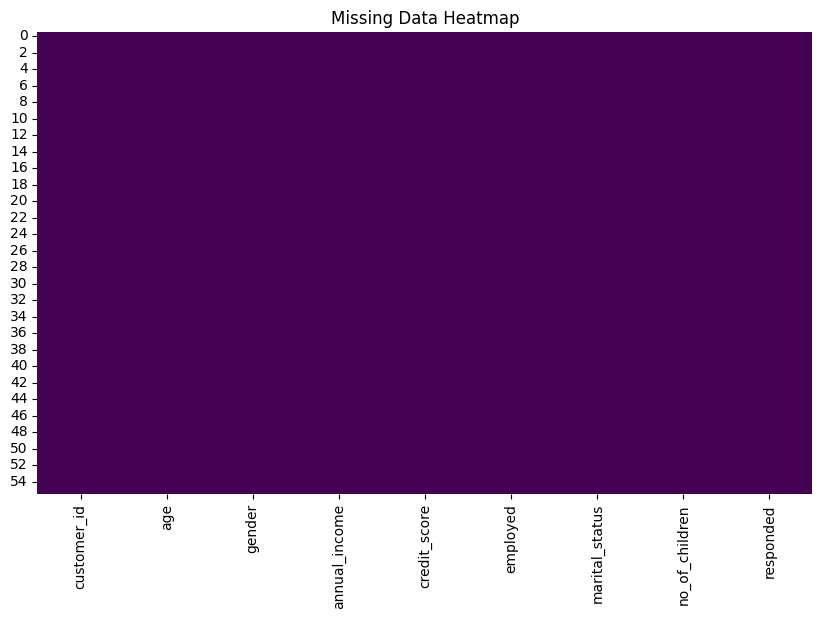


Outliers Detected (Z-score > 3):
customer_id: 0 outliers
age: 0 outliers
annual_income: 0 outliers
credit_score: 0 outliers
no_of_children: 0 outliers


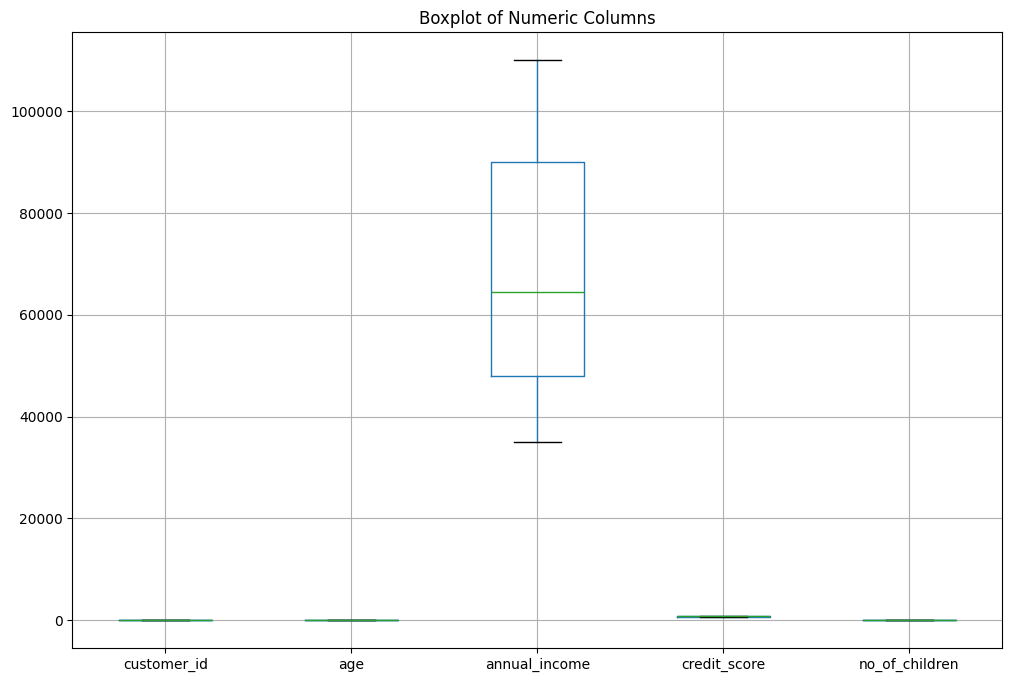

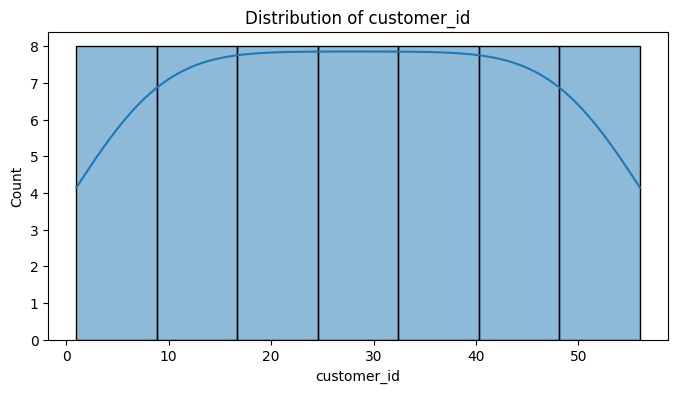

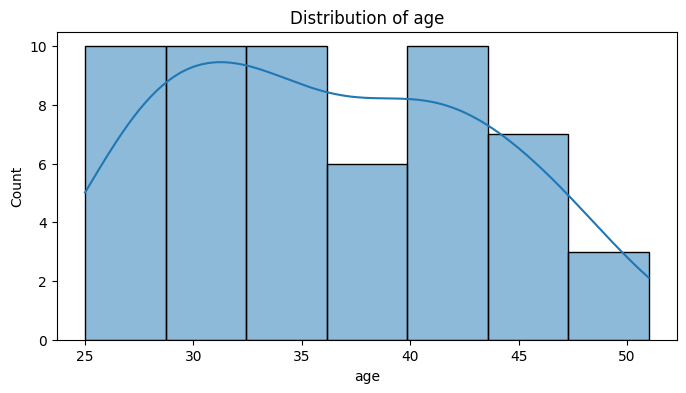

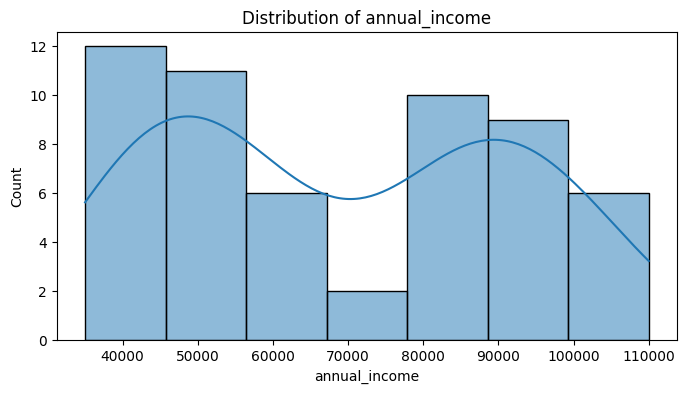

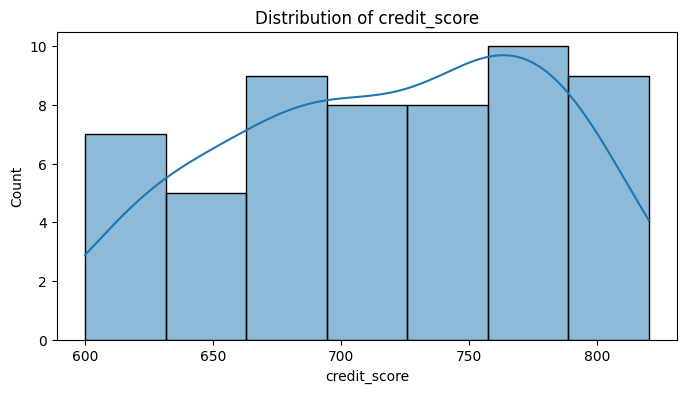

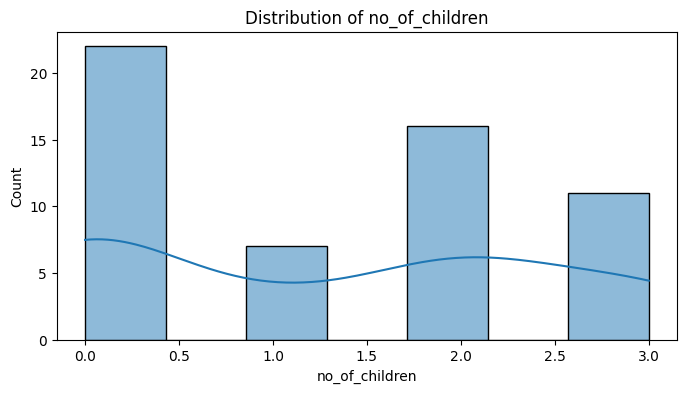

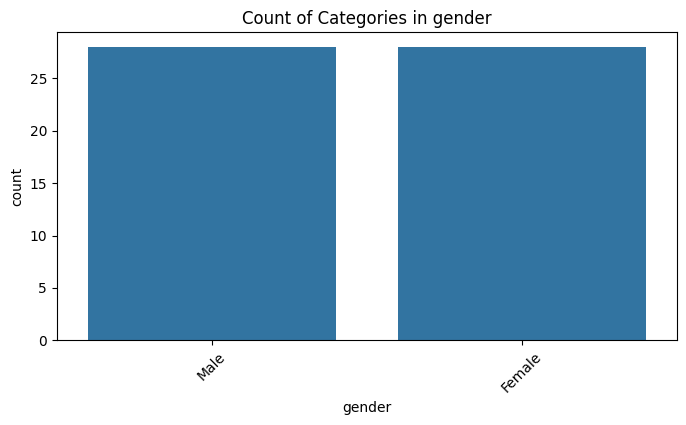

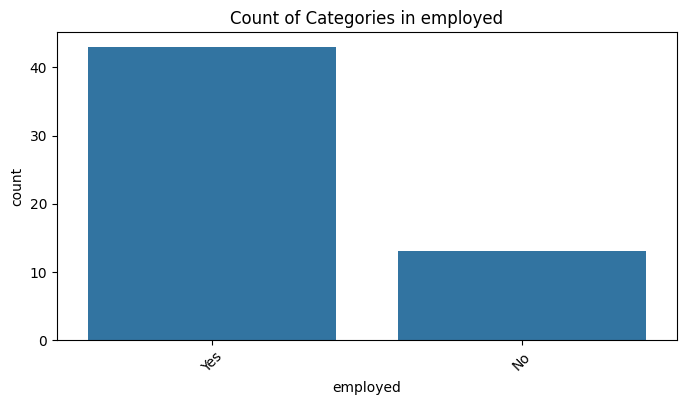

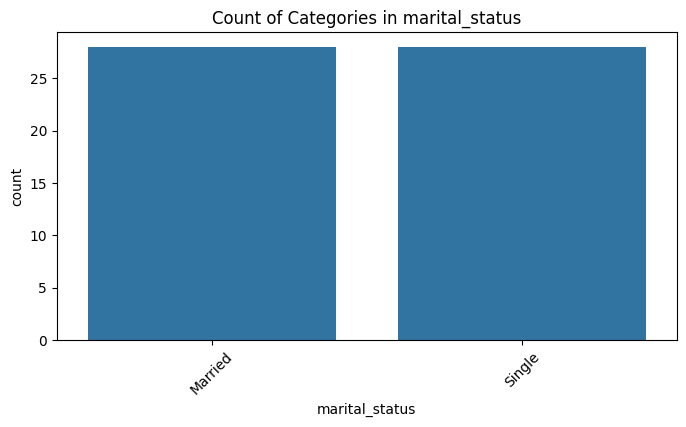

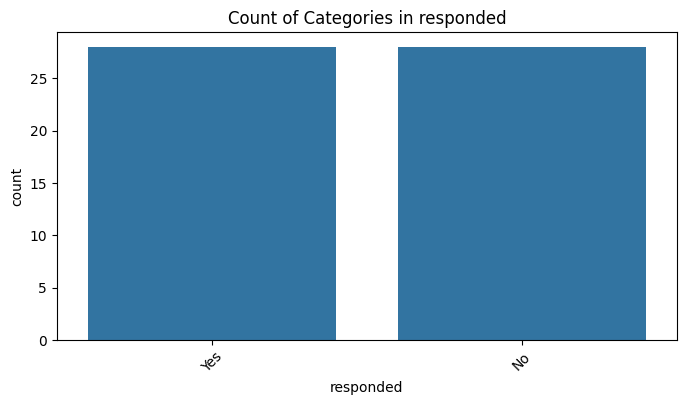

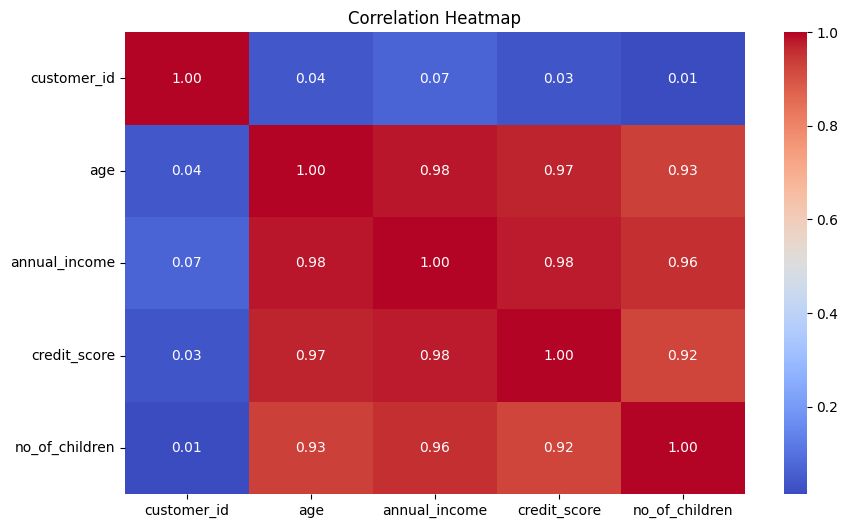

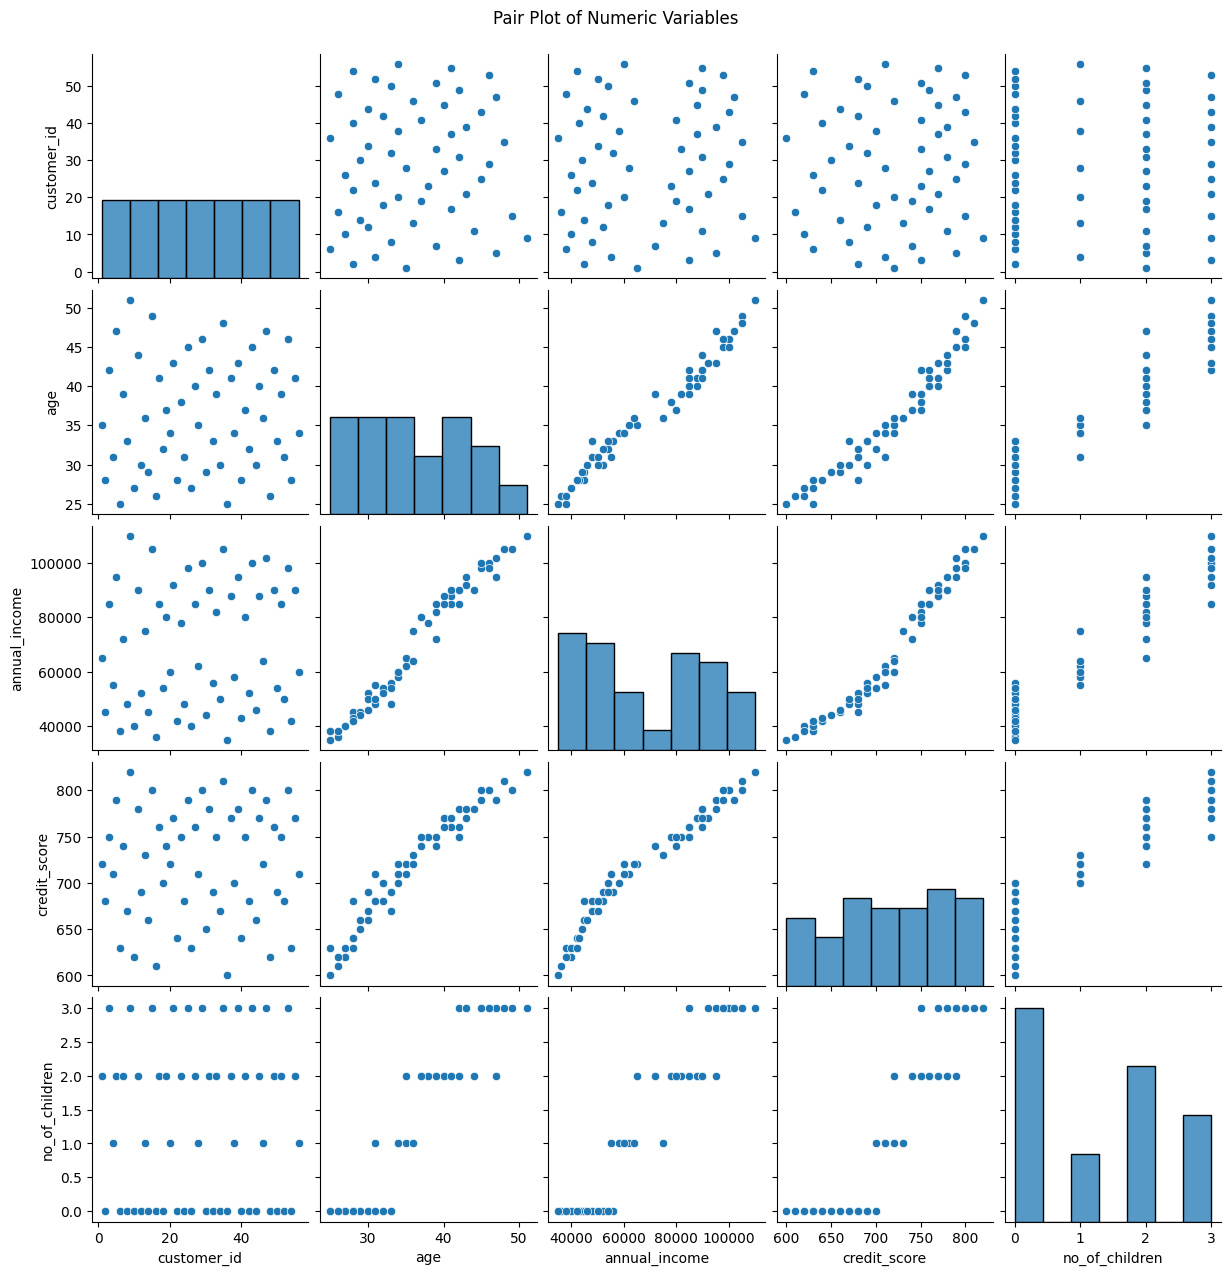

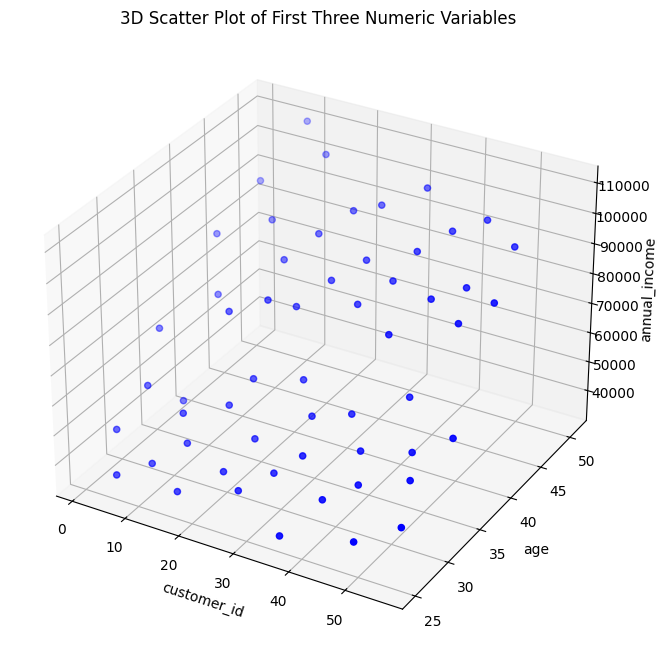

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Load dataset
df = pd.read_csv("campaign_responses.csv")

# 1. General EDA
print("Dataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())

# 2. Missing Data Analysis
print("\nMissing Data Analysis:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])  # Print columns with missing values

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

# 3. Outlier Detection
# Using Z-score method for numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
z_scores = np.abs(zscore(df[numeric_cols]))
outliers = (z_scores > 3)

# Count and display outliers
print("\nOutliers Detected (Z-score > 3):")
for col in numeric_cols:
    num_outliers = np.sum(outliers[col])
    print(f"{col}: {num_outliers} outliers")

# Visualize outliers with box plots
plt.figure(figsize=(12, 8))
df[numeric_cols].boxplot()
plt.title("Boxplot of Numeric Columns")
plt.show()

# 4. Univariate Analysis
# Distribution plots for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Bar plots for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count of Categories in {col}")
    plt.xticks(rotation=45)
    plt.show()

# 5. Bivariate Analysis
# Correlation heatmap for numeric variables
plt.figure(figsize=(10, 6))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots for selected pairs of variables
sns.pairplot(df[numeric_cols])
plt.suptitle("Pair Plot of Numeric Variables", y=1.02)
plt.show()

# Cross-tabulation for categorical variables with a target (if present)
# Example: replace 'response' with the actual target variable
# for col in categorical_cols:
#     if col != 'response':
#         cross_tab = pd.crosstab(df[col], df['response'])
#         cross_tab.plot(kind='bar', stacked=True)
#         plt.title(f"Cross-tabulation of {col} with Response")
#         plt.show()

# 6. Multivariate Analysis
# 3D scatter plot if there are at least 3 numeric columns
# Only run if 3+ numeric columns exist, or adapt this for other analyses
if len(numeric_cols) >= 3:
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[numeric_cols[0]], df[numeric_cols[1]], df[numeric_cols[2]], c='b', marker='o')
    ax.set_xlabel(numeric_cols[0])
    ax.set_ylabel(numeric_cols[1])
    ax.set_zlabel(numeric_cols[2])
    plt.title("3D Scatter Plot of First Three Numeric Variables")
    plt.show()
